# Entree Time Series Analysis

## Import necessary (and unnecessary) libraries

In [253]:
from fbprophet import Prophet as proph
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import re
import os
from time import time
import random
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.svm as SVC
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree
from xgboost.sklearn import XGBClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from statsmodels.formula.api import ols
from os import system
from math import floor
from copy import deepcopy
from bs4 import BeautifulSoup as BS
from sklearn.linear_model import LinearRegression
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
# from fbprophet import Prophet as proph
import xgboost as xgb
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 1000)

## Import the csv files of our entrees and set the date column types to datetime

In [2]:
ribeye = pd.read_csv('Ribeye.csv', index_col=0)
ribeye.Date = pd.to_datetime(ribeye.Date)
ribeye.head()

Date  Qty 1
1 2018-09-01      2
2 2018-09-02      3
3 2018-09-03      2
4 2018-09-04      2
5 2018-09-05      2

In [3]:
scallops_au_gratin = pd.read_csv('Scallops Au Gratin.csv', index_col=0)
scallops_au_gratin.Date = pd.to_datetime(scallops_au_gratin.Date)
scallops_au_gratin.head()

Date  Qty 2
1 2018-09-01    1.0
2 2018-09-02    0.0
3 2018-09-03    0.0
4 2018-09-04    0.0
5 2018-09-05    0.0

In [4]:
fajita = pd.read_csv('Fajita.csv', index_col=0)
fajita.Date = pd.to_datetime(fajita.Date)
fajita.head()

Date  Qty 3
1 2018-09-01      9
2 2018-09-02     10
3 2018-09-03      4
4 2018-09-04      3
5 2018-09-05     11

In [5]:
filet_mignon = pd.read_csv('Filet Mignon.csv', index_col=0)
filet_mignon.Date = pd.to_datetime(filet_mignon.Date)
filet_mignon.head()

Date  Qty 4
1 2018-09-01      6
2 2018-09-02      4
3 2018-09-03      3
4 2018-09-04      2
5 2018-09-05      8

In [6]:
filet_tips = pd.read_csv('Filet Tips.csv', index_col=0)
filet_tips.Date = pd.to_datetime(filet_tips.Date)
filet_tips.head()

Date  Qty 5
1 2018-09-01      7
2 2018-09-02      6
3 2018-09-03      3
4 2018-09-04      2
5 2018-09-05      4

In [7]:
glazed_salmon = pd.read_csv('Glazed Salmon.csv', index_col=0)
glazed_salmon.Date = pd.to_datetime(glazed_salmon.Date)
glazed_salmon.head()

Date  Qty 6
1 2018-09-01     17
2 2018-09-02     19
3 2018-09-03      7
4 2018-09-04      5
5 2018-09-05     20

In [8]:
pork_chop = pd.read_csv('Pork Chop.csv', index_col=0)
pork_chop.Date = pd.to_datetime(pork_chop.Date)
pork_chop.head()

Date  Qty 7
1 2018-09-01      4
2 2018-09-02      2
3 2018-09-03      2
4 2018-09-04      1
5 2018-09-05      3

In [9]:
seafood_risotto = pd.read_csv('Seafood Risotto.csv', index_col=0)
seafood_risotto.Date = pd.to_datetime(seafood_risotto.Date)
seafood_risotto.head()

Date  Qty 8
1 2018-09-01      0
2 2018-09-02      0
3 2018-09-03      0
4 2018-09-04      0
5 2018-09-05      0

In [10]:
thai_veg = pd.read_csv('Thai Veg.csv', index_col=0)
thai_veg.Date = pd.to_datetime(thai_veg.Date)
thai_veg.head()

Date  Qty 9
1 2018-09-01      9
2 2018-09-02      7
3 2018-09-03      4
4 2018-09-04      2
5 2018-09-05      2

In [11]:
crab_cakes = pd.read_csv('Crab Cakes.csv', index_col=0)
crab_cakes.Date = pd.to_datetime(crab_cakes.Date)
crab_cakes.head()

Date  Qty 10
1 2018-09-01       6
2 2018-09-02       7
3 2018-09-03       3
4 2018-09-04       5
5 2018-09-05       5

In [12]:
seared_scallops = pd.read_csv('Seared Scallops.csv', index_col=0)
seared_scallops.Date = pd.to_datetime(seared_scallops.Date)
seared_scallops.head()

Date  Qty 11
1 2018-09-01       2
2 2018-09-02       6
3 2018-09-03       2
4 2018-09-04       3
5 2018-09-05       4

## Let's plot these!

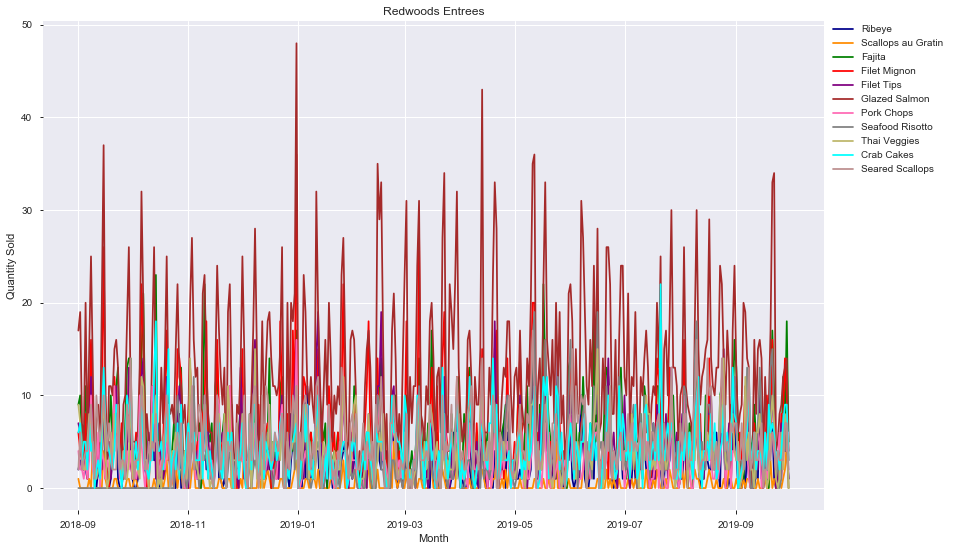

In [13]:
# Plot all dishes and set different colors for each
plt.figure(figsize=(14,9))
plt.plot(ribeye.Date, ribeye['Qty 1'], color='darkblue')
plt.plot(scallops_au_gratin.Date, scallops_au_gratin['Qty 2'], color='darkorange')
plt.plot(fajita.Date, fajita['Qty 3'], color='green')
plt.plot(filet_mignon.Date, filet_mignon['Qty 4'], color='red')
plt.plot(filet_tips.Date, filet_tips['Qty 5'], color='purple')
plt.plot(glazed_salmon.Date, glazed_salmon['Qty 6'], color='brown')
plt.plot(pork_chop.Date, pork_chop['Qty 7'], color='hotpink')
plt.plot(seafood_risotto.Date, seafood_risotto['Qty 8'], color='gray')
plt.plot(thai_veg.Date, thai_veg['Qty 9'], color='darkkhaki')
plt.plot(crab_cakes.Date, crab_cakes['Qty 10'], color='cyan')
plt.plot(seared_scallops.Date, seared_scallops['Qty 11'], color='rosybrown')
plt.title('Redwoods Entrees')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')

# Put the legend on the outside of the graph and reset the texts from Qty to appopriate entree name
L = plt.legend(bbox_to_anchor=[1, 1.01])
L.get_texts()[0].set_text('Ribeye')
L.get_texts()[1].set_text('Scallops au Gratin')
L.get_texts()[2].set_text('Fajita')
L.get_texts()[3].set_text('Filet Mignon')
L.get_texts()[4].set_text('Filet Tips')
L.get_texts()[5].set_text('Glazed Salmon')
L.get_texts()[6].set_text('Pork Chops')
L.get_texts()[7].set_text('Seafood Risotto')
L.get_texts()[8].set_text('Thai Veggies')
L.get_texts()[9].set_text('Crab Cakes')
L.get_texts()[10].set_text('Seared Scallops');

## Import the weather

In [14]:
weather = pd.read_csv('clean weather.csv', index_col=0)
weather.head()

Date  Rain  Snow
0  2017-01-04   0.0   0.0
1  2017-01-05   0.0   0.0
2  2017-01-06   0.0   0.5
3  2017-01-07   0.0   0.0
4  2017-01-09   0.0   0.0

### Set date column to datetime

In [15]:
weather.Date = pd.to_datetime(weather.Date)

In [16]:
# Grab only the time from September 1st 2018 through September 30th 2019, as that's all the entree data we have
entree_weather = weather[521:852]

In [17]:
entree_weather.head()

Date  Rain  Snow
521 2018-09-01  0.05   0.0
522 2018-09-03  0.00   0.0
523 2018-09-04  0.00   0.0
524 2018-09-05  0.00   0.0
525 2018-09-06  0.00   0.0

# Let's start our models!

## Entree 1 - Ribeye

### First, let's plot the entree

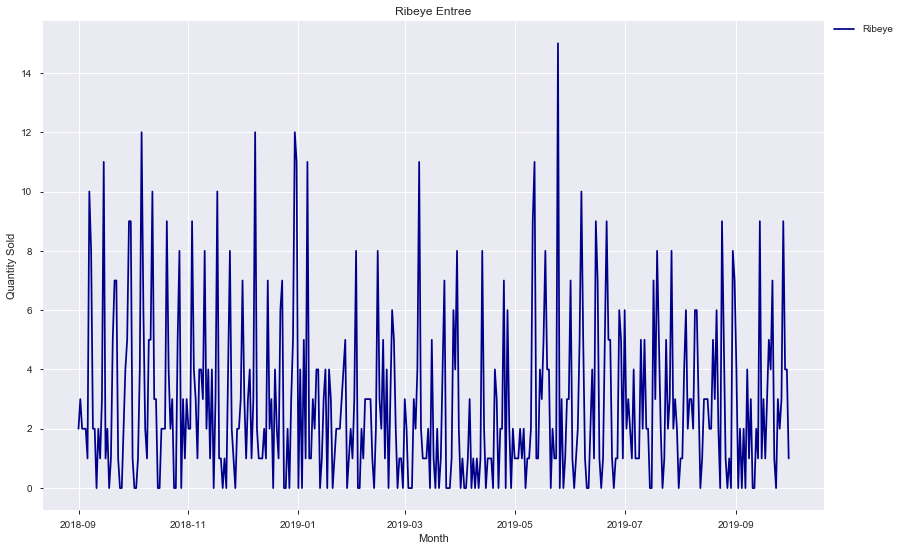

In [18]:
plt.figure(figsize=(14,9))
plt.plot(ribeye.Date, ribeye['Qty 1'], color='darkblue')
plt.title('Ribeye Entree')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.1, 1.01]) 
L.get_texts()[0].set_text('Ribeye') 

### Rename the columns

In [19]:
# Prophet needs the date column to be named 'ds' and the target column to be named 'y' for it to run
ribeye_forecast = ribeye.rename(columns={'Date': 'ds',
                                         'Qty 1': 'y'})
ribeye_forecast.tail()

ds  y
391 2019-09-26  3
392 2019-09-27  9
393 2019-09-28  4
394 2019-09-29  4
395 2019-09-30  1

In [238]:
# Set the parameters for the model. Make sure to include proper seasonality 
# Use a relatively high changepoint_prior_scale for a flexible trend, as our data varies wildly day-to-day
# Set a high forier_order to fit more quickly-changing and complex seasonality patterns.
# Make sure seasonality is set to monthly so we get a monthly breakdown in our plot_components
# Add holidays as they are either open and sell well or closed during some of them
Model_ribeye = proph(interval_width=.75, weekly_seasonality=True, changepoint_prior_scale=.5)
Model_ribeye.add_seasonality(name='monthly', period=30.5, fourier_order=25)
Model_ribeye.add_country_holidays(country_name='US')

In [21]:
# Fit the model to our forecast
Model_ribeye.fit(ribeye_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### Make future dates with a period of 31 so that we can predict to the end of October.

In [22]:
future_dates_ribeye = Model_ribeye.make_future_dataframe(periods=31, freq='D')

In [23]:
future_dates_ribeye.tail()

ds
421 2019-10-27
422 2019-10-28
423 2019-10-29
424 2019-10-30
425 2019-10-31

In [24]:
forecast_ribeye = Model_ribeye.predict(future_dates_ribeye)

In [25]:
# Just grab the target's prediction and ranges. We don't really care about the other stuff
forecast_ribeye[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
421 2019-10-27  3.042668    0.704177    5.266661
422 2019-10-28  1.887567   -0.312486    3.997364
423 2019-10-29 -0.307410   -2.552823    2.070088
424 2019-10-30  2.584412    0.178930    5.038991
425 2019-10-31  4.221298    1.856829    6.577605

### Plot the forecast.

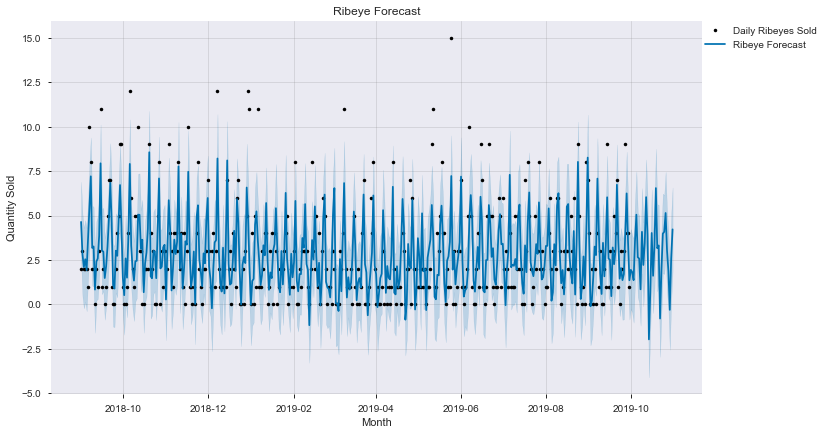

In [26]:
Model_ribeye.plot(forecast_ribeye, uncertainty=True)
plt.title('Ribeye Forecast')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.19, 1.01])
L.get_texts()[0].set_text('Daily Ribeyes Sold')
L.get_texts()[1].set_text('Ribeye Forecast');

### Plot the Ribeyes Sold and Ribeye Predictions

<Figure size 1440x1080 with 0 Axes>

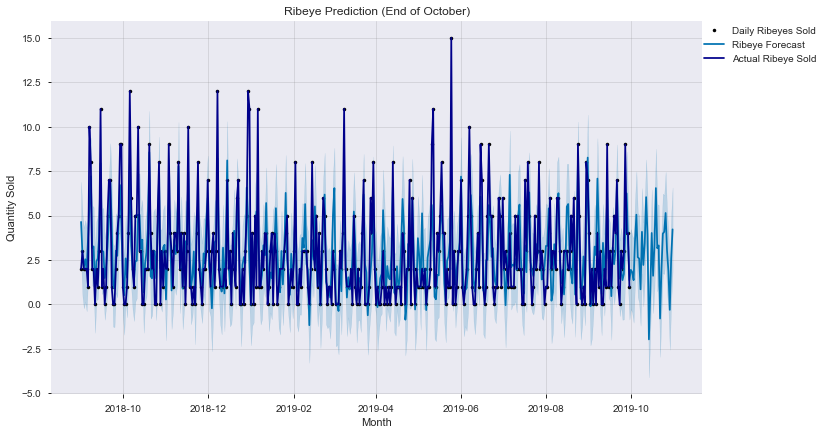

In [27]:
plt.figure(figsize=(20,15))
Model_ribeye.plot(forecast_ribeye, uncertainty=True)
plt.plot(ribeye.Date, ribeye['Qty 1'], color='darkblue')
plt.title('Ribeye Prediction (End of October)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.19, 1.01])
L.get_texts()[0].set_text('Daily Ribeyes Sold')
L.get_texts()[1].set_text('Ribeye Forecast')
L.get_texts()[2].set_text('Actual Ribeye Sold');

### Plot the trends

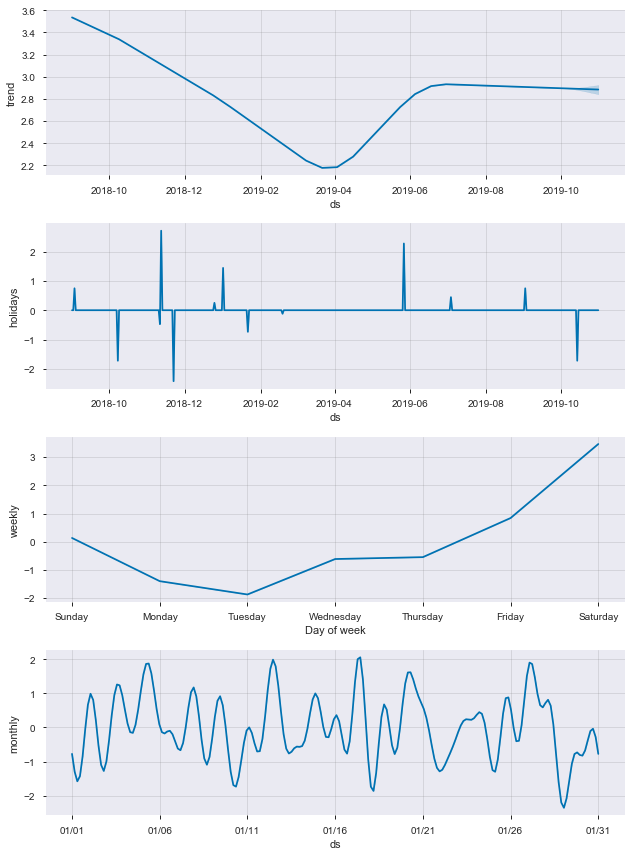

In [28]:
# Use plot_components to see the overall, holiday, weekly, and monthly trends
Model_ribeye.plot_components(forecast_ribeye);

### Let's include performance metrics

In [29]:
# Run cross_validation to make sure our model is not overfitting (compare y to yhat to test this)
ribeye_cv = cross_validation(Model_ribeye, horizon='31 Days')
ribeye_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2018-12-09 12:00:00 and 2019-08-30 00:00:00
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds       yhat  yhat_lower  yhat_upper   y              cutoff
0   2018-12-10   1.912767    0.601252    3.185888   1 2018-12-09 12:00:00
1   2018-12-11   1.106762   -0.204957    2.328152   1 2018-12-09 12:00:00
2   2018-12-12   6.375868    5.008129    7.721519   1 2018-12-09 12:00:00
3   2018-12-13  -3.083726   -4.472013   -1.832911   2 2018-12-09 12:00:00
4   2018-12-14   3.384161    1.958968    4.770928   1 2018-12-09 12:00:00
5   2018-12-15   7.917521    6.570140    9.237071   7 2018-12-09 12:00:00
6   2018-12-16   2.093532    0.801004    3.382731   2 2018-12-09 12:00:00
7   2018-12-17   1.185559   -0.143317    2.479410   3 2018-12-09 12:00:00
8   2018-12-18  -0.172758   -1.523746    1.249417   0 2018-12-09 12:00:00
9   2018-12-19  -0.853059   -2.269439    0.419892   4 2018-12-09 12:00:00
10  2018-12-20   2.621953    1.267120    3.970390   2 2018-12-09 12:00:00
11  2018-12-21   3.230062    1.969058    4.567124   1 2018-12-09 12:00:00
12  2018-12-22   8.350697    6.958058    9.624885   6 2018-12-09 12:00:00
13  2018-12-23   3.631221    2.341425    4.968215   7 2018-12-09 12:00:00
14  2018-12-24  -1.774206   -3.158935   -0.481711   0 2018-12-09 12:00:00
15  2018-12-25  -2.470083   -3.839474   -1.156806   0 2018-12-09 12:00:00
16  2018-12-26   2.437736    1.104088    3.684499   2 2018-12-09 12:00:00
17  2018-12-27   2.298225    0.920972    3.597033   0 2018-12-09 12:00:00
18  2018-12-28   0.090401   -1.276121    1.369845   3 2018-12-09 12:00:00
19  2018-12-29  10.265400    8.971212   11.635043   5 2018-12-09 12:00:00
20  2018-12-30   2.525139    1.141138    3.928395  12 2018-12-09 12:00:00
21  2018-12-31   2.004079    0.579478    3.334295  11 2018-12-09 12:00:00
22  2019-01-01  -2.413564   -3.699711   -0.958817   0 2018-12-09 12:00:00
23  2019-01-02   0.279845   -1.078352    1.767143   4 2018-12-09 12:00:00
24  2019-01-03   2.716221    1.352370    4.119842   0 2018-12-09 12:00:00
25  2019-01-04   3.464083    2.125997    4.801765   5 2018-12-09 12:00:00
26  2019-01-05   8.921593    7.527691   10.260611   1 2018-12-09 12:00:00
27  2019-01-06   1.433737    0.038753    2.845679  11 2018-12-09 12:00:00
28  2019-01-07   5.000004    3.733113    6.401332   1 2018-12-09 12:00:00
29  2019-01-08   1.632808    0.231645    2.956571   1 2018-12-09 12:00:00
30  2019-01-09   0.711769   -0.721162    2.067599   3 2018-12-09 12:00:00
31  2018-12-26   2.102685    0.605443    3.574354   2 2018-12-25 00:00:00
32  2018-12-27   3.066532    1.484595    4.508280   0 2018-12-25 00:00:00
33  2018-12-28  -0.027058   -1.493832    1.422915   3 2018-12-25 00:00:00
34  2018-12-29  10.175474    8.792500   11.666093   5 2018-12-25 00:00:00
35  2018-12-30   3.151499    1.715832    4.566162  12 2018-12-25 00:00:00
36  2018-12-31   2.195767    0.736834    3.651509  11 2018-12-25 00:00:00
37  2019-01-01  -2.347921   -3.843769   -0.785799   0 2018-12-25 00:00:00
38  2019-01-02  -0.131673   -1.595858    1.337825   4 2018-12-25 00:00:00
39  2019-01-03   3.627399    2.185431    5.288827   0 2018-12-25 00:00:00
40  2019-01-04   3.359994    1.930247    4.834415   5 2018-12-25 00:00:00
41  2019-01-05   8.667611    7.163621   10.034421   1 2018-12-25 00:00:00
42  2019-01-06   1.812826    0.399733    3.335087  11 2018-12-25 00:00:00
43  2019-01-07   5.120188    3.627304    6.628075   1 2018-12-25 00:00:00
44  2019-01-08   1.831852    0.201686    3.300919   1 2018-12-25 00:00:00
45  2019-01-09   0.381662   -1.099675    1.857382   3 2018-12-25 00:00:00
46  2019-01-10   3.872208    2.413083    5.379143   2 2018-12-25 00:00:00
47  2019-01-11   2.376553    1.007745    3.874570   4 2018-12-25 00:00:00
48  2019-01-12   7.873519    6.451483    9.372477   4 2018-12-25 00:00:00
49  2019-01-13   1.274347   -0.124954    2.716863   0 2018-12-25 00:00:00
50  2019-01-14   0.711054   -0.692593    2.166911   1 2018-12-25 00:00:00
51  2019-01-15   0.262482   -1.266921    1.773249   3 2018-12-25 00:00:00
52  2019-01-16  -1.109211   -2.563824    0.443154   4 2018-12-25 00:00:00
53  2019-01-17  

In [30]:
# Look at the performance_metrics. Focus on RMSE for a more accurate prediction 
# Note, MAPE is not included because there are numerous days where this entree did not sell at all
ribeye_p = performance_metrics(ribeye_cv)
ribeye_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon        mse      rmse       mae  coverage
0   3 days 12:00:00   5.236036  2.288239  1.863682  0.654545
1   4 days 00:00:00   6.269900  2.503977  2.094463  0.595960
2   4 days 12:00:00   7.510717  2.740569  2.244011  0.555556
3   5 days 00:00:00   9.706076  3.115458  2.450691  0.555556
4   5 days 12:00:00   8.495389  2.914685  2.200491  0.610101
5   6 days 00:00:00   9.603910  3.099018  2.266123  0.612121
6   6 days 12:00:00  10.055465  3.171035  2.385312  0.559596
7   7 days 00:00:00   9.493509  3.081154  2.261894  0.589899
8   7 days 12:00:00   8.270381  2.875827  2.117405  0.624242
9   8 days 00:00:00   6.499117  2.549337  1.973603  0.628283
10  8 days 12:00:00   6.422562  2.534277  1.951875  0.634343
11  9 days 00:00:00   6.330332  2.516015  2.056079  0.593939
12  9 days 12:00:00   6.213124  2.492614  2.060745  0.608081
13 10 days 00:00:00   6.250169  2.500034  2.091673  0.575758
14 10 days 12:00:00   6.444761  2.538653  2.100574  0.591919
15 11 days 00:00:00   7.338454  2.708958  2.152126  0.591919
16 11 days 12:00:00   9.328533  3.054265  2.377440  0.543434
17 12 days 00:00:00  10.430116  3.229569  2.448001  0.553535
18 12 days 12:00:00  10.793868  3.285402  2.411331  0.537374
19 13 days 00:00:00  10.898014  3.301214  2.414879  0.553535
20 13 days 12:00:00  10.657729  3.264618  2.391855  0.557576
21 14 days 00:00:00  10.782746  3.283709  2.372649  0.573737
22 14 days 12:00:00   8.504278  2.916209  2.097289  0.628283
23 15 days 00:00:00   6.695878  2.587639  1.920376  0.628283
24 15 days 12:00:00   6.295240  2.509032  1.855491  0.662626
25 16 days 00:00:00   5.598525  2.366120  1.763152  0.719192
26 16 days 12:00:00   5.321322  2.306799  1.714275  0.739394
27 17 days 00:00:00   4.514860  2.124820  1.696047  0.703030
28 17 days 12:00:00   4.850748  2.202441  1.794270  0.652525
29 18 days 00:00:00   5.441269  2.332653  1.902043  0.628283
30 18 days 12:00:00   4.717625  2.172009  1.847122  0.630303
31 19 days 00:00:00   4.399419  2.097479  1.739388  0.634343
32 19 days 12:00:00   5.071298  2.251954  1.863329  0.614141
33 20 days 00:00:00   6.012857  2.452113  1.975014  0.589899
34 20 days 12:00:00   8.210857  2.865459  2.193570  0.591919
35 21 days 00:00:00   7.406195  2.721433  2.038544  0.662626
36 21 days 12:00:00   8.684849  2.947007  2.170378  0.684848
37 22 days 00:00:00  10.148826  3.185722  2.452212  0.616162
38 22 days 12:00:00   9.949376  3.154263  2.407716  0.612121
39 23 days 00:00:00   9.185783  3.030806  2.326735  0.624242
40 23 days 12:00:00   7.489473  2.736690  2.203452  0.628283
41 24 days 00:00:00   7.669580  2.769401  2.258324  0.616162
42 24 days 12:00:00   7.846886  2.801229  2.352430  0.577778
43 25 days 00:00:00   6.910241  2.628734  2.198559  0.608081
44 25 days 12:00:00   6.948276  2.635958  2.204076  0.593939
45 26 days 00:00:00   6.535945  2.556549  2.121458  0.608081
46 26 days 12:00:00   7.084669  2.661704  2.097612  0.628283
47 27 days 00:00:00   8.798792  2.966276  2.219386  0.614141
48 27 days 12:00:00   9.699071  3.114333  2.227916  0.591919
49 28 days 00:00:00  10.668562  3.266276  2.325229  0.593939
50 28 days 12:00:00  10.730063  3.275678  2.307775  0.610101
51 29 days 00:00:00  11.027459  3.320762  2.379968  0.591919
52 29 days 12:00:00  11.575478  3.402275  2.426788  0.593939
53 30 days 00:00:00   9.181828  3.030153  2.097069  0.648485
54 30 days 12:00:00   7.374807  2.715660  1.993835  0.644444
55 31 days 00:00:00   6.704546  2.589314  1.914226  0.648485

### Plot RMSE for future prediction

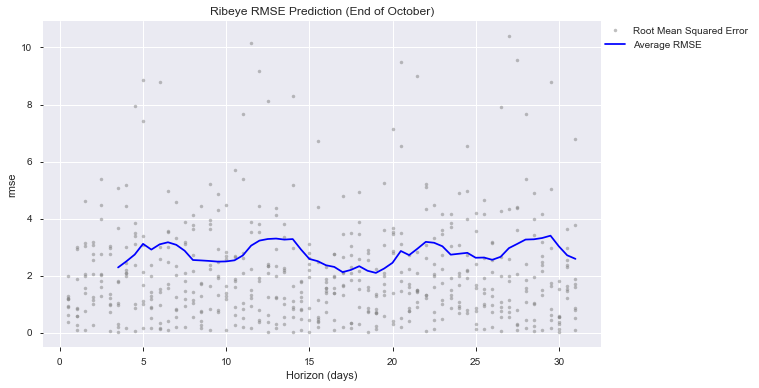

In [31]:
# Just use the RMSE metric for this plot as that will be the best predictor
fig = plot_cross_validation_metric(ribeye_cv, metric='rmse')
L = plt.legend(bbox_to_anchor=[1.28, 1.01])
plt.title('Ribeye RMSE Prediction (End of October)')
L.get_texts()[0].set_text('Root Mean Squared Error')
L.get_texts()[1].set_text('Average RMSE');

### Let's add weather to the mix and see if there are any correlations!

In [32]:
# Merge our ribeye data with the entree weather data
ribeye_weather = pd.merge(ribeye, entree_weather, how='left')

In [33]:
# Because there are many days with missing values in our weather data, we need to fill the null values
# Safe to assume that if no data was recorded, it's likely because there was no rain or snow on those days
# Set null values to 0
ribeye_weather.fillna(value=0, inplace=True)

In [34]:
# Make sure the length of our new dataset is correct
len(ribeye_weather)

395

In [35]:
# Rename the column to the entree for the next graph
ribeye_weather.rename(columns={'Qty 1': 'Ribeye'}, inplace=True)

In [36]:
# Check correlation
ribeye_weather.corr()

Ribeye      Rain      Snow
Ribeye  1.000000 -0.016076 -0.043199
Rain   -0.016076  1.000000  0.249830
Snow   -0.043199  0.249830  1.000000

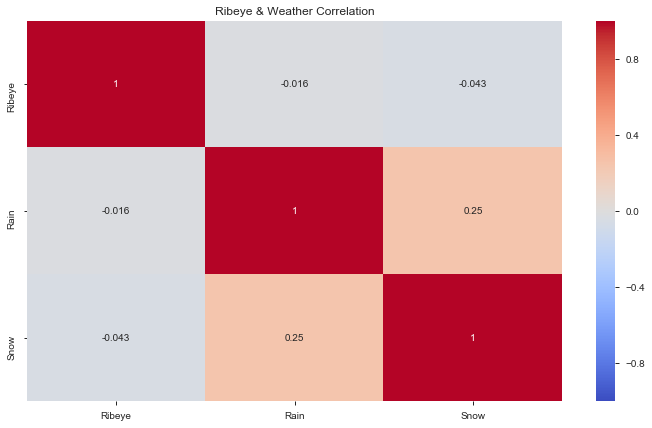

In [37]:
# Plot the correlation
plt.figure(figsize=(12,7))
sns.heatmap(ribeye_weather.corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True
           )
plt.title('Ribeye & Weather Correlation');

### Repeat this process for the rest of the entrees. Some of the parameters will need to be changed (changepoint_prior_scale and fourier_order in particular) to account for the differences in popularity and seasonality of the dishes.

## Entree 2 - Scallops au Gratin

### First, let's plot the entree

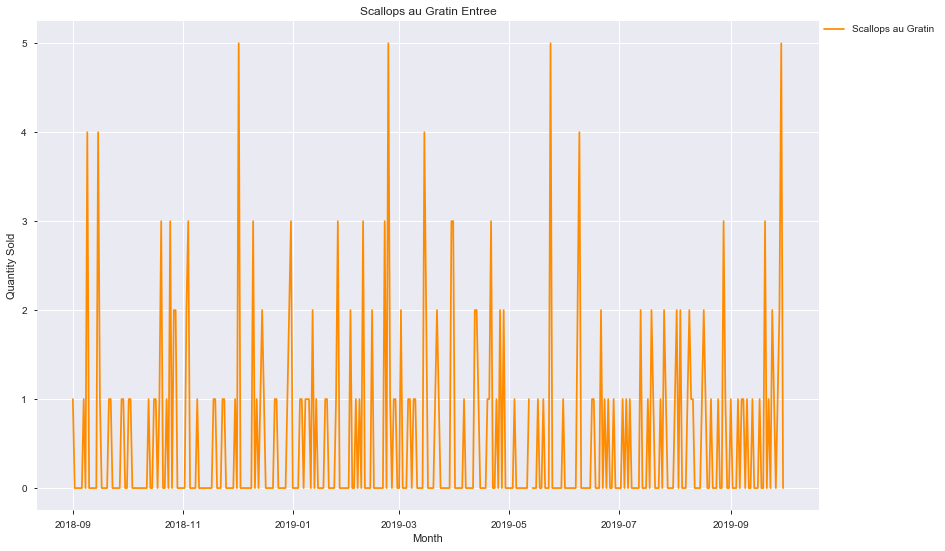

In [38]:
plt.figure(figsize=(14,9))
plt.plot(scallops_au_gratin.Date, scallops_au_gratin['Qty 2'], color='darkorange')
plt.title('Scallops au Gratin Entree')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.16, 1.01]) # Note that these numbers will vary. They are to fit the legend perfectly
L.get_texts()[0].set_text('Scallops au Gratin')

This dish is criminally underrated :(

### Rename the columns

In [39]:
scallops_au_gratin_forecast = scallops_au_gratin.rename(columns={'Date': 'ds',
                                                                 'Qty 2': 'y'})
scallops_au_gratin_forecast.tail()

ds    y
391 2019-09-26  0.0
392 2019-09-27  1.0
393 2019-09-28  2.0
394 2019-09-29  5.0
395 2019-09-30  0.0

In [40]:
# Note a very high changepoint_prior_scale and fourier_order, as this dish has many days where it sells none 
# It also has a range of 0-5 so any day-to-day change is pretty substantial
Model_scallops_au_gratin = proph(interval_width=.75, weekly_seasonality=True, changepoint_prior_scale=2)
Model_scallops_au_gratin.add_seasonality(name='monthly', period=30.5, fourier_order=50)
Model_scallops_au_gratin.add_country_holidays(country_name='US')

In [41]:
Model_scallops_au_gratin.fit(scallops_au_gratin_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### Make future dates with a period of 31 so that we can predict to the end of October.

In [42]:
future_dates_scallops_au_gratin = Model_scallops_au_gratin.make_future_dataframe(periods=31, freq='D')

In [43]:
future_dates_scallops_au_gratin.tail()

ds
421 2019-10-27
422 2019-10-28
423 2019-10-29
424 2019-10-30
425 2019-10-31

In [44]:
forecast_scallops_au_gratin = Model_scallops_au_gratin.predict(future_dates_scallops_au_gratin)

In [45]:
forecast_scallops_au_gratin[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
421 2019-10-27  0.860319   -0.000196    1.748926
422 2019-10-28  1.512380    0.651571    2.411969
423 2019-10-29  0.655994   -0.207425    1.572645
424 2019-10-30  0.268178   -0.679211    1.139700
425 2019-10-31  0.452704   -0.427037    1.332608

### Plot the forecast.

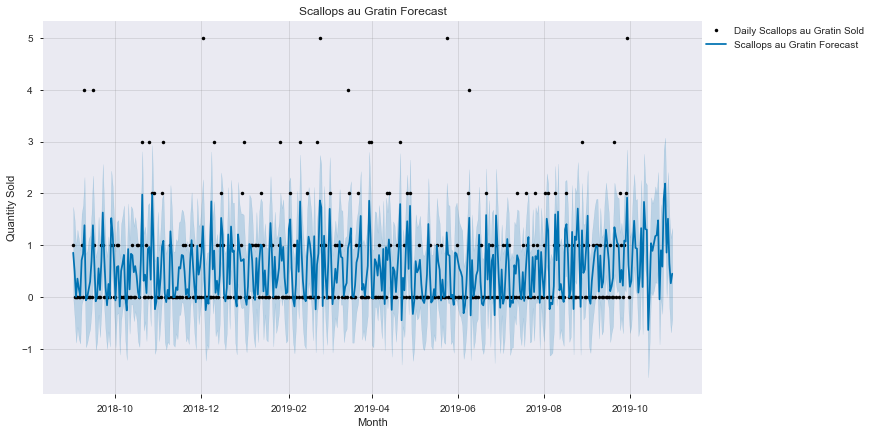

In [46]:
Model_scallops_au_gratin.plot(forecast_scallops_au_gratin, uncertainty=True)
L = plt.legend(bbox_to_anchor=[1.26, 1.01])
plt.title('Scallops au Gratin Forecast')
L.get_texts()[0].set_text('Daily Scallops au Gratin Sold')
L.get_texts()[1].set_text('Scallops au Gratin Forecast')
plt.xlabel('Month')
plt.ylabel('Quantity Sold');

### Plot the Scallops au Gratin Sold and Scallops au Gratin Predictions

<Figure size 1440x1080 with 0 Axes>

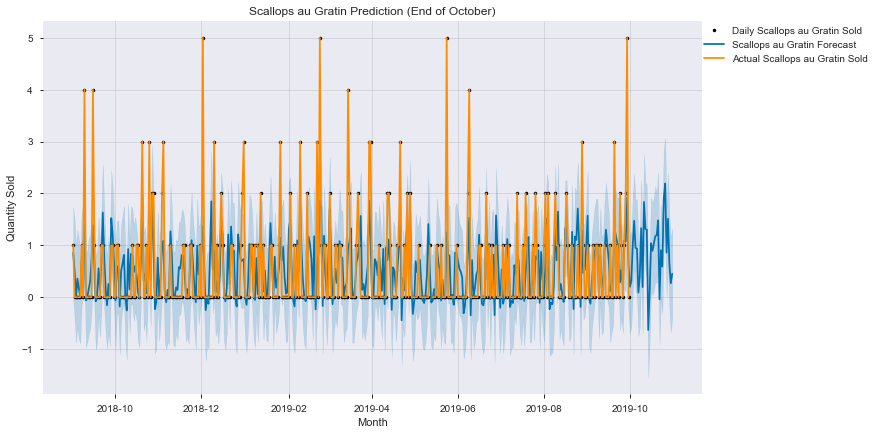

In [47]:
plt.figure(figsize=(20,15))
Model_scallops_au_gratin.plot(forecast_scallops_au_gratin, uncertainty=True)
plt.plot(scallops_au_gratin.Date, scallops_au_gratin['Qty 2'], color='darkorange')
plt.title('Scallops au Gratin Prediction (End of October)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.265, 1.01])
L.get_texts()[0].set_text('Daily Scallops au Gratin Sold')
L.get_texts()[1].set_text('Scallops au Gratin Forecast')
L.get_texts()[2].set_text('Actual Scallops au Gratin Sold');

### Plot the trends

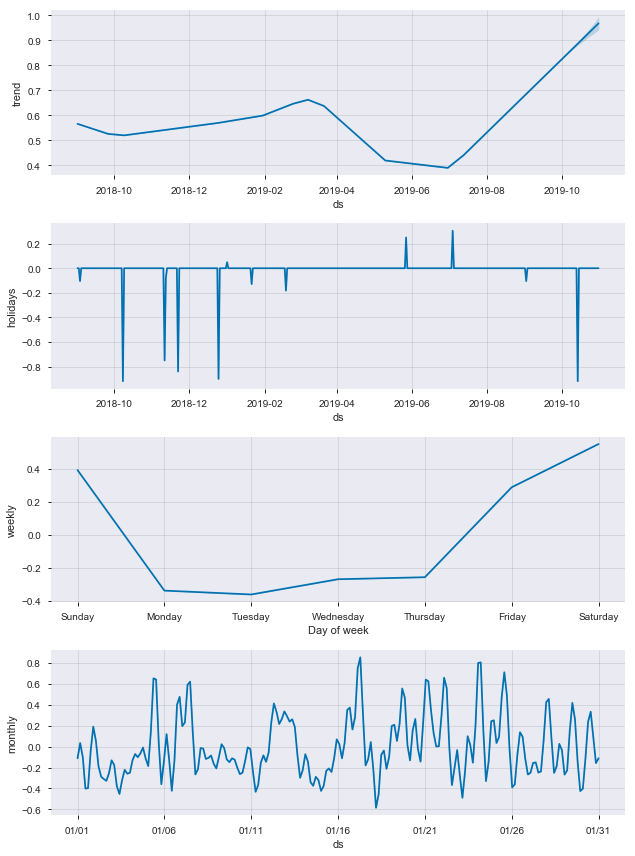

In [48]:
Model_scallops_au_gratin.plot_components(forecast_scallops_au_gratin);

### Let's include performance metrics

In [49]:
scallops_au_gratin_cv = cross_validation(Model_scallops_au_gratin, horizon='31 Days')
scallops_au_gratin_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2018-12-09 12:00:00 and 2019-08-30 00:00:00
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds      yhat  yhat_lower  yhat_upper    y              cutoff
0   2018-12-10  0.123707   -0.356646    0.593605  3.0 2018-12-09 12:00:00
1   2018-12-11  0.212610   -0.253804    0.729669  0.0 2018-12-09 12:00:00
2   2018-12-12 -0.391207   -0.861479    0.088205  1.0 2018-12-09 12:00:00
3   2018-12-13 -0.116483   -0.619864    0.364163  0.0 2018-12-09 12:00:00
4   2018-12-14 -0.221769   -0.715002    0.266081  1.0 2018-12-09 12:00:00
5   2018-12-15  0.481257    0.006718    0.958279  2.0 2018-12-09 12:00:00
6   2018-12-16  2.628080    2.099783    3.087252  1.0 2018-12-09 12:00:00
7   2018-12-17  1.042254    0.563196    1.502601  0.0 2018-12-09 12:00:00
8   2018-12-18  0.131039   -0.313904    0.616209  0.0 2018-12-09 12:00:00
9   2018-12-19  0.527331    0.009927    1.037017  0.0 2018-12-09 12:00:00
10  2018-12-20  1.802082    1.301941    2.292075  0.0 2018-12-09 12:00:00
11  2018-12-21 -0.303224   -0.798589    0.180079  0.0 2018-12-09 12:00:00
12  2018-12-22  0.399887   -0.099229    0.942692  1.0 2018-12-09 12:00:00
13  2018-12-23  2.546805    2.023458    3.087302  1.0 2018-12-09 12:00:00
14  2018-12-24 -0.038962   -0.549762    0.515439  0.0 2018-12-09 12:00:00
15  2018-12-25  3.049962    2.519419    3.618255  0.0 2018-12-09 12:00:00
16  2018-12-26 -0.553669   -1.100846    0.045752  0.0 2018-12-09 12:00:00
17  2018-12-27  0.721131    0.125337    1.290808  0.0 2018-12-09 12:00:00
18  2018-12-28  1.615951    1.036587    2.200230  0.0 2018-12-09 12:00:00
19  2018-12-29  0.319168   -0.277670    0.904397  1.0 2018-12-09 12:00:00
20  2018-12-30  1.466095    0.894027    2.140666  2.0 2018-12-09 12:00:00
21  2018-12-31 -0.119527   -0.759333    0.519810  3.0 2018-12-09 12:00:00
22  2019-01-01  0.063680   -0.485784    0.756399  0.0 2018-12-09 12:00:00
23  2019-01-02 -0.627093   -1.260273    0.027402  0.0 2018-12-09 12:00:00
24  2019-01-03  0.643136    0.006985    1.319940  0.0 2018-12-09 12:00:00
25  2019-01-04  1.903383    1.244306    2.625034  0.0 2018-12-09 12:00:00
26  2019-01-05  0.284221   -0.430364    1.018583  1.0 2018-12-09 12:00:00
27  2019-01-06  1.445834    0.734957    2.218117  1.0 2018-12-09 12:00:00
28  2019-01-07  0.028729   -0.683086    0.804194  0.0 2018-12-09 12:00:00
29  2019-01-08 -0.774538   -1.599107    0.058311  1.0 2018-12-09 12:00:00
30  2019-01-09  1.539584    0.765224    2.402239  1.0 2018-12-09 12:00:00
31  2018-12-26 -1.155388   -1.644659   -0.621331  0.0 2018-12-25 00:00:00
32  2018-12-27 -0.275222   -0.817938    0.287620  0.0 2018-12-25 00:00:00
33  2018-12-28  1.009674    0.475589    1.574640  0.0 2018-12-25 00:00:00
34  2018-12-29 -0.135510   -0.665127    0.382768  1.0 2018-12-25 00:00:00
35  2018-12-30  0.149214   -0.403859    0.718315  2.0 2018-12-25 00:00:00
36  2018-12-31 -0.745097   -1.300272   -0.147205  3.0 2018-12-25 00:00:00
37  2019-01-01 -1.176873   -1.707883   -0.627068  0.0 2018-12-25 00:00:00
38  2019-01-02 -1.493781   -2.066018   -0.923027  0.0 2018-12-25 00:00:00
39  2019-01-03 -0.649188   -1.209243   -0.093629  0.0 2018-12-25 00:00:00
40  2019-01-04  0.791095    0.202800    1.348395  0.0 2018-12-25 00:00:00
41  2019-01-05 -0.280193   -0.849381    0.328369  1.0 2018-12-25 00:00:00
42  2019-01-06 -0.164443   -0.754537    0.397802  1.0 2018-12-25 00:00:00
43  2019-01-07 -0.786044   -1.369398   -0.172802  0.0 2018-12-25 00:00:00
44  2019-01-08 -2.181034   -2.792690   -1.580147  1.0 2018-12-25 00:00:00
45  2019-01-09  0.509761   -0.114055    1.134820  1.0 2018-12-25 00:00:00
46  2019-01-10 -2.653607   -3.352209   -2.012917  1.0 2018-12-25 00:00:00
47  2019-01-11 -0.829411   -1.522521   -0.150967  0.0 2018-12-25 00:00:00
48  2019-01-12 -0.858688   -1.567169   -0.179667  2.0 2018-12-25 00:00:00
49  2019-01-13 -0.632292   -1.339616    0.066274  0.0 2018-12-25 00:00:00
50  2019-01-14 -1.725491   -2.444182   -0.948200  1.0 2018-12-25 00:00:00
51  2019-01-15 -0.592071   -1.343888    0.110284  0.0 2018-12-25 00:00:00
52  2019-01-16 -1.872929   -2.672712   -1.132511  0.0 2018-12-25 00:00:00
53  2019-01-17 -

In [50]:
scallops_au_gratin_p = performance_metrics(scallops_au_gratin_cv)
scallops_au_gratin_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon       mse      rmse       mae  coverage
0   3 days 12:00:00  1.082063  1.040223  0.732359  0.684848
1   4 days 00:00:00  1.134353  1.065060  0.753346  0.648485
2   4 days 12:00:00  1.260503  1.122721  0.819554  0.595960
3   5 days 00:00:00  1.299006  1.139739  0.842875  0.575758
4   5 days 12:00:00  0.964750  0.982217  0.759205  0.575758
5   6 days 00:00:00  1.022161  1.011020  0.738544  0.610101
6   6 days 12:00:00  1.157299  1.075778  0.797374  0.559596
7   7 days 00:00:00  1.310628  1.144827  0.841894  0.553535
8   7 days 12:00:00  1.229878  1.108999  0.805201  0.589899
9   8 days 00:00:00  1.151073  1.072881  0.757374  0.646465
10  8 days 12:00:00  1.180511  1.086513  0.776614  0.648485
11  9 days 00:00:00  0.956323  0.977918  0.723865  0.632323
12  9 days 12:00:00  0.902821  0.950169  0.694510  0.644444
13 10 days 00:00:00  0.669602  0.818292  0.607916  0.680808
14 10 days 12:00:00  1.194600  1.092978  0.700126  0.684848
15 11 days 00:00:00  1.414224  1.189212  0.759309  0.652525
16 11 days 12:00:00  1.525494  1.235109  0.804349  0.648485
17 12 days 00:00:00  1.506672  1.227466  0.797201  0.666667
18 12 days 12:00:00  1.478350  1.215874  0.797929  0.646465
19 13 days 00:00:00  1.587686  1.260034  0.837451  0.648485
20 13 days 12:00:00  1.344794  1.159652  0.821894  0.630303
21 14 days 00:00:00  1.411520  1.188074  0.860376  0.612121
22 14 days 12:00:00  1.442396  1.200998  0.856049  0.612121
23 15 days 00:00:00  1.498212  1.224015  0.878176  0.610101
24 15 days 12:00:00  1.706646  1.306387  0.956798  0.579798
25 16 days 00:00:00  1.836531  1.355187  0.973155  0.587879
26 16 days 12:00:00  1.728924  1.314886  0.932696  0.620202
27 17 days 00:00:00  1.461858  1.209073  0.869850  0.638384
28 17 days 12:00:00  1.277707  1.130357  0.824677  0.642424
29 18 days 00:00:00  1.633582  1.278116  0.909752  0.631818
30 18 days 12:00:00  1.604597  1.266727  0.888555  0.678788
31 19 days 00:00:00  1.345758  1.160068  0.816977  0.703030
32 19 days 12:00:00  1.317021  1.147615  0.832890  0.632323
33 20 days 00:00:00  1.506038  1.227207  0.888925  0.593939
34 20 days 12:00:00  1.499854  1.224685  0.894863  0.593939
35 21 days 00:00:00  1.166778  1.080175  0.816765  0.612121
36 21 days 12:00:00  1.194288  1.092835  0.825948  0.593939
37 22 days 00:00:00  1.360610  1.166452  0.893617  0.559596
38 22 days 12:00:00  1.364161  1.167973  0.906236  0.551515
39 23 days 00:00:00  1.300142  1.140237  0.866265  0.608081
40 23 days 12:00:00  1.284750  1.133468  0.860649  0.612121
41 24 days 00:00:00  1.323139  1.150278  0.893030  0.559596
42 24 days 12:00:00  1.057674  1.028433  0.786958  0.591919
43 25 days 00:00:00  1.073348  1.036025  0.800067  0.573737
44 25 days 12:00:00  1.047205  1.023330  0.767179  0.606061
45 26 days 00:00:00  1.384784  1.176768  0.837357  0.577778
46 26 days 12:00:00  1.717750  1.310629  0.904447  0.593939
47 27 days 00:00:00  1.825427  1.351084  0.945007  0.589899
48 27 days 12:00:00  1.895748  1.376862  0.991585  0.577778
49 28 days 00:00:00  1.922327  1.386480  1.004094  0.589899
50 28 days 12:00:00  2.193584  1.481075  1.040978  0.628283
51 29 days 00:00:00  2.035006  1.426536  1.030822  0.628283
52 29 days 12:00:00  1.886330  1.373437  1.029110  0.577778
53 30 days 00:00:00  2.260073  1.503354  1.085383  0.589899
54 30 days 12:00:00  2.385990  1.544665  1.130304  0.587879
55 31 days 00:00:00  2.375542  1.541279  1.128334  0.583838

### Plot RMSE for future prediction

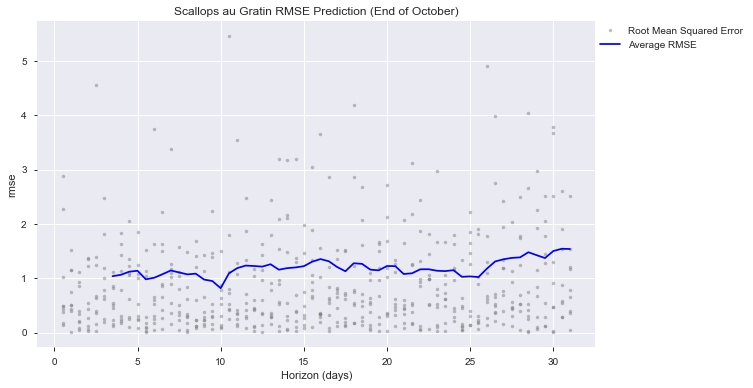

In [51]:
fig = plot_cross_validation_metric(scallops_au_gratin_cv, metric='rmse')
L = plt.legend(bbox_to_anchor=[1.28, 1.01])
plt.title('Scallops au Gratin RMSE Prediction (End of October)')
L.get_texts()[0].set_text('Root Mean Squared Error')
L.get_texts()[1].set_text('Average RMSE');

### Let's add weather to the mix and see if there are any correlations!

In [52]:
scallops_au_gratin_weather = pd.merge(scallops_au_gratin, entree_weather, how='left')

In [53]:
scallops_au_gratin_weather.fillna(value=0, inplace=True)

In [54]:
len(scallops_au_gratin_weather)

395

In [55]:
scallops_au_gratin_weather.rename(columns={'Qty 2': 'Scallops au Gratin'}, inplace=True)

In [56]:
scallops_au_gratin_weather.corr()

Scallops au Gratin     Rain      Snow
Scallops au Gratin            1.000000  0.03516 -0.046289
Rain                          0.035160  1.00000  0.249830
Snow                         -0.046289  0.24983  1.000000

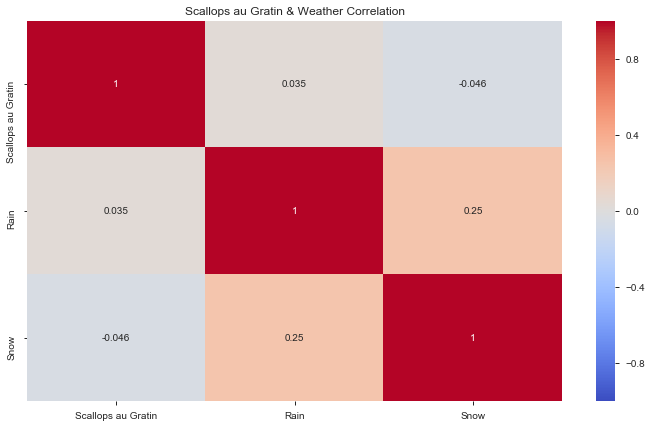

In [57]:
plt.figure(figsize=(12,7))
sns.heatmap(scallops_au_gratin_weather.corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True
           )
plt.title('Scallops au Gratin & Weather Correlation');

## Entree 3 - Fajita

### First, let's plot the entree

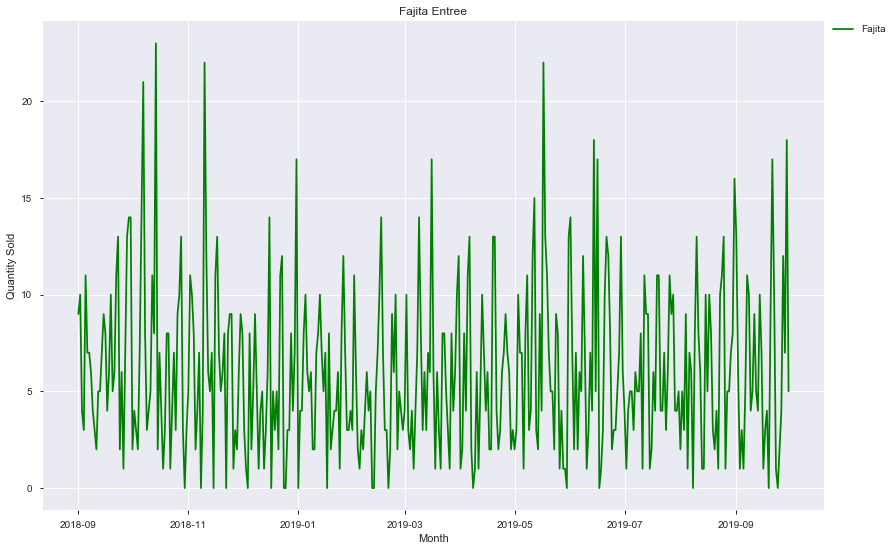

In [58]:
plt.figure(figsize=(14,9))
plt.plot(fajita.Date, fajita['Qty 3'], color='green')
plt.title('Fajita Entree')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.09, 1.01])
L.get_texts()[0].set_text('Fajita')

### Rename the columns

In [59]:
fajita_forecast = fajita.rename(columns={'Date': 'ds',
                                         'Qty 3': 'y'})
fajita_forecast.tail()

ds   y
391 2019-09-26   4
392 2019-09-27  12
393 2019-09-28   7
394 2019-09-29  18
395 2019-09-30   5

In [60]:
Model_fajita = proph(interval_width=.75, weekly_seasonality=True, changepoint_prior_scale=.5)
Model_fajita.add_seasonality(name='monthly', period=30.5, fourier_order=30)
Model_fajita.add_country_holidays(country_name='US')

In [61]:
Model_fajita.fit(fajita_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### Make future dates with a period of 31 so that we can predict to the end of October.

In [62]:
future_dates_fajita = Model_fajita.make_future_dataframe(periods=31, freq='D')

In [63]:
future_dates_fajita.tail()

ds
421 2019-10-27
422 2019-10-28
423 2019-10-29
424 2019-10-30
425 2019-10-31

In [64]:
forecast_fajita = Model_fajita.predict(future_dates_fajita)

In [65]:
forecast_fajita[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
421 2019-10-27  8.589505    5.305072   11.888508
422 2019-10-28  2.366951   -0.816875    5.581186
423 2019-10-29  5.374193    2.145904    9.024953
424 2019-10-30  3.248413   -0.047534    6.529213
425 2019-10-31  2.884057   -0.237474    6.358807

### Plot the forecast.

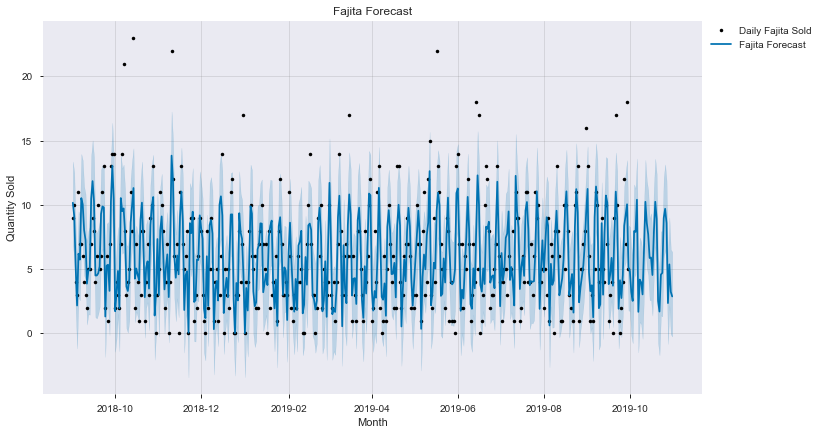

In [66]:
Model_fajita.plot(forecast_fajita, uncertainty=True)
L = plt.legend(bbox_to_anchor=[1.18, 1.01])
plt.title('Fajita Forecast')
L.get_texts()[0].set_text('Daily Fajita Sold')
L.get_texts()[1].set_text('Fajita Forecast')
plt.xlabel('Month')
plt.ylabel('Quantity Sold');

### Plot the Fajitas Sold and Fajita Predictions

<Figure size 1440x1080 with 0 Axes>

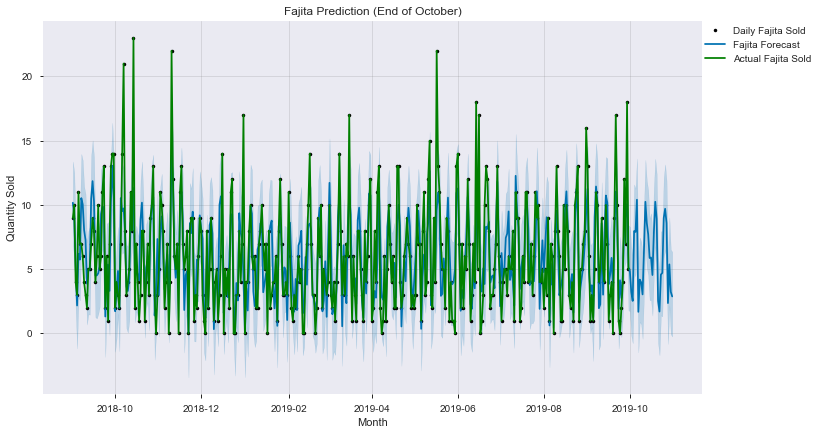

In [67]:
plt.figure(figsize=(20,15))
Model_fajita.plot(forecast_fajita, uncertainty=True)
plt.plot(fajita.Date, fajita['Qty 3'], color='green')
plt.title('Fajita Prediction (End of October)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.18, 1.01])
L.get_texts()[0].set_text('Daily Fajita Sold')
L.get_texts()[1].set_text('Fajita Forecast')
L.get_texts()[2].set_text('Actual Fajita Sold');

### Plot the trends

In [68]:
Model_fajita.plot_components(forecast_fajita);

### Let's include performance metrics

In [69]:
fajita_cv = cross_validation(Model_fajita, horizon='31 Days')
fajita_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2018-12-09 12:00:00 and 2019-08-30 00:00:00
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds       yhat  yhat_lower  yhat_upper   y              cutoff
0   2018-12-10  -3.648493   -5.307944   -1.968409   1 2018-12-09 12:00:00
1   2018-12-11  -0.682883   -2.384591    1.019098   4 2018-12-09 12:00:00
2   2018-12-12   5.256092    3.494723    6.932520   5 2018-12-09 12:00:00
3   2018-12-13  -4.428448   -6.084138   -2.547414   1 2018-12-09 12:00:00
4   2018-12-14  14.681090   12.994822   16.386569   3 2018-12-09 12:00:00
5   2018-12-15   7.253103    5.435183    8.827211   6 2018-12-09 12:00:00
6   2018-12-16   4.670752    2.990463    6.458603  14 2018-12-09 12:00:00
7   2018-12-17  -5.100241   -6.808561   -3.423860   0 2018-12-09 12:00:00
8   2018-12-18  -6.134608   -7.778302   -4.479646   5 2018-12-09 12:00:00
9   2018-12-19  -4.195604   -5.879340   -2.452610   3 2018-12-09 12:00:00
10  2018-12-20  -5.880096   -7.587309   -4.170799   5 2018-12-09 12:00:00
11  2018-12-21  -1.770476   -3.458140   -0.105051   2 2018-12-09 12:00:00
12  2018-12-22   4.801577    3.050609    6.434169  11 2018-12-09 12:00:00
13  2018-12-23   0.219241   -1.538374    1.940878  12 2018-12-09 12:00:00
14  2018-12-24  -3.551747   -5.351135   -1.816309   0 2018-12-09 12:00:00
15  2018-12-25  -5.586100   -7.347703   -3.829120   0 2018-12-09 12:00:00
16  2018-12-26   0.355241   -1.426268    2.037755   3 2018-12-09 12:00:00
17  2018-12-27  -5.326903   -7.010265   -3.411819   3 2018-12-09 12:00:00
18  2018-12-28   1.785055    0.008902    3.399766   8 2018-12-09 12:00:00
19  2018-12-29   5.364333    3.764885    7.086419   4 2018-12-09 12:00:00
20  2018-12-30  -5.210780   -6.961908   -3.463305   7 2018-12-09 12:00:00
21  2018-12-31  -8.974555  -10.641574   -7.068434  17 2018-12-09 12:00:00
22  2019-01-01  -5.927256   -7.652793   -4.175839   0 2018-12-09 12:00:00
23  2019-01-02  -0.318956   -2.148719    1.515312   4 2018-12-09 12:00:00
24  2019-01-03  -6.691713   -8.462702   -5.076385   4 2018-12-09 12:00:00
25  2019-01-04  -4.676286   -6.529152   -2.821232   8 2018-12-09 12:00:00
26  2019-01-05   6.622329    4.890308    8.340913  10 2018-12-09 12:00:00
27  2019-01-06  -0.865612   -2.647277    0.914863   6 2018-12-09 12:00:00
28  2019-01-07  -6.056685   -7.873495   -4.353571   5 2018-12-09 12:00:00
29  2019-01-08 -11.324297  -13.086639   -9.530655   6 2018-12-09 12:00:00
30  2019-01-09  -8.216041   -9.980325   -6.162076   2 2018-12-09 12:00:00
31  2018-12-26   7.524787    5.433245    9.701347   3 2018-12-25 00:00:00
32  2018-12-27   3.222975    1.101515    5.392387   3 2018-12-25 00:00:00
33  2018-12-28   7.460353    5.309222    9.580813   8 2018-12-25 00:00:00
34  2018-12-29  12.981682   10.904050   15.040624   4 2018-12-25 00:00:00
35  2018-12-30   4.580142    2.286249    6.619551   7 2018-12-25 00:00:00
36  2018-12-31  -0.135105   -2.356938    1.994927  17 2018-12-25 00:00:00
37  2019-01-01   5.351653    3.252001    7.437622   0 2018-12-25 00:00:00
38  2019-01-02   8.213480    5.863891   10.244888   4 2018-12-25 00:00:00
39  2019-01-03   3.989592    1.864282    6.190877   4 2018-12-25 00:00:00
40  2019-01-04   3.940739    1.877554    6.182975   8 2018-12-25 00:00:00
41  2019-01-05  16.470471   14.318384   18.829481  10 2018-12-25 00:00:00
42  2019-01-06  11.723756    9.406797   13.997295   6 2018-12-25 00:00:00
43  2019-01-07   4.812620    2.751848    7.051544   5 2018-12-25 00:00:00
44  2019-01-08   1.604362   -0.539811    3.834063   6 2018-12-25 00:00:00
45  2019-01-09   1.966195   -0.005909    4.052264   2 2018-12-25 00:00:00
46  2019-01-10  12.790048   10.679155   15.000623   2 2018-12-25 00:00:00
47  2019-01-11   3.355188    1.137625    5.636281   7 2018-12-25 00:00:00
48  2019-01-12  13.893616   11.601576   15.995156   8 2018-12-25 00:00:00
49  2019-01-13  11.474709    9.297989   13.564939  10 2018-12-25 00:00:00
50  2019-01-14   5.062217    2.874233    7.341101   7 2018-12-25 00:00:00
51  2019-01-15   3.352573    1.226712    5.371853   5 2018-12-25 00:00:00
52  2019-01-16   7.712954    5.444984    9.999095   7 2018-12-25 00:00:00
53  2019-01-17  

In [70]:
fajita_p = performance_metrics(fajita_cv)
fajita_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon        mse      rmse       mae  coverage
0   3 days 12:00:00  18.527294  4.304334  3.280338  0.553535
1   4 days 00:00:00  18.597222  4.312450  3.267515  0.537374
2   4 days 12:00:00  19.438947  4.408962  3.162788  0.602020
3   5 days 00:00:00  19.611934  4.428536  3.177055  0.577778
4   5 days 12:00:00  18.500896  4.301267  3.088297  0.612121
5   6 days 00:00:00  24.267824  4.926238  3.474794  0.523232
6   6 days 12:00:00  23.666672  4.864840  3.555475  0.498990
7   7 days 00:00:00  23.386502  4.835959  3.552227  0.517172
8   7 days 12:00:00  21.933141  4.683283  3.458821  0.519192
9   8 days 00:00:00  22.757506  4.770483  3.488062  0.537374
10  8 days 12:00:00  25.676199  5.067169  3.804017  0.470707
11  9 days 00:00:00  20.062601  4.479129  3.391686  0.549495
12  9 days 12:00:00  19.844055  4.454667  3.220502  0.587879
13 10 days 00:00:00  18.199738  4.266115  3.031875  0.591919
14 10 days 12:00:00  19.536741  4.420039  3.101512  0.610101
15 11 days 00:00:00  19.302955  4.393513  3.214421  0.575758
16 11 days 12:00:00  17.391178  4.170273  3.062724  0.571717
17 12 days 00:00:00  18.140598  4.259178  3.190054  0.541414
18 12 days 12:00:00  15.768069  3.970903  3.185090  0.519192
19 13 days 00:00:00  14.430686  3.798774  3.100260  0.537374
20 13 days 12:00:00  13.145009  3.625605  2.946268  0.575758
21 14 days 00:00:00  12.544874  3.541874  2.896339  0.571717
22 14 days 12:00:00  12.710477  3.565176  2.971561  0.553535
23 15 days 00:00:00  11.198541  3.346422  2.700941  0.610101
24 15 days 12:00:00   9.906059  3.147389  2.461950  0.662626
25 16 days 00:00:00  14.439990  3.799999  2.812895  0.593939
26 16 days 12:00:00  14.171167  3.764461  2.884674  0.561616
27 17 days 00:00:00  16.317273  4.039464  3.156036  0.498990
28 17 days 12:00:00  16.963908  4.118727  3.146677  0.551515
29 18 days 00:00:00  18.474726  4.298224  3.374013  0.525253
30 18 days 12:00:00  20.262033  4.501337  3.656819  0.468687
31 19 days 00:00:00  21.341559  4.619692  3.664206  0.513131
32 19 days 12:00:00  21.330224  4.618466  3.687034  0.521212
33 20 days 00:00:00  19.663856  4.434395  3.410908  0.583838
34 20 days 12:00:00  21.123612  4.596043  3.430826  0.575758
35 21 days 00:00:00  19.597176  4.426870  3.271912  0.612121
36 21 days 12:00:00  30.985346  5.566448  3.621237  0.571717
37 22 days 00:00:00  29.988552  5.476180  3.708855  0.537374
38 22 days 12:00:00  29.926783  5.470538  3.748217  0.503030
39 23 days 00:00:00  30.375849  5.511429  3.741422  0.519192
40 23 days 12:00:00  29.720977  5.451695  3.733897  0.519192
41 24 days 00:00:00  29.733169  5.452813  3.776275  0.488889
42 24 days 12:00:00  20.835162  4.564555  3.502593  0.531313
43 25 days 00:00:00  20.413429  4.518122  3.289783  0.569697
44 25 days 12:00:00  22.424795  4.735483  3.334989  0.589899
45 26 days 00:00:00  21.816647  4.670829  3.271610  0.612121
46 26 days 12:00:00  20.850008  4.566181  3.314119  0.555556
47 27 days 00:00:00  20.552807  4.533520  3.247901  0.557576
48 27 days 12:00:00  20.316958  4.507434  3.239557  0.573737
49 28 days 00:00:00  16.988805  4.121748  3.171878  0.537374
50 28 days 12:00:00  15.355694  3.918634  3.145140  0.519192
51 29 days 00:00:00  13.212367  3.634882  2.940485  0.541414
52 29 days 12:00:00  17.732483  4.210996  3.087862  0.585859
53 30 days 00:00:00  19.605699  4.427832  3.305682  0.575758
54 30 days 12:00:00  20.320071  4.507779  3.258653  0.575758
55 31 days 00:00:00  18.651787  4.318771  2.985581  0.660606

### Plot RMSE for future prediction

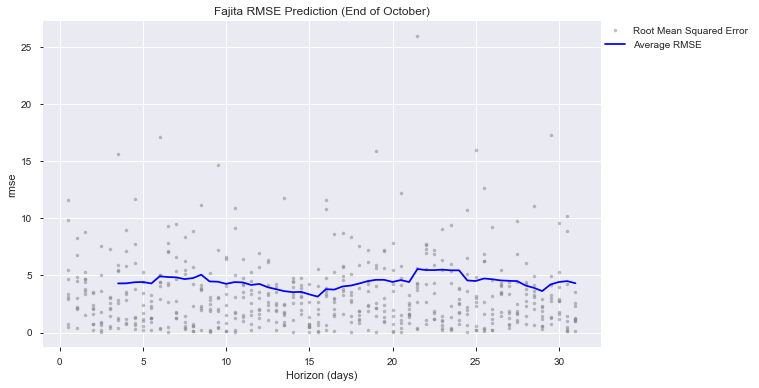

In [71]:
fig = plot_cross_validation_metric(fajita_cv, metric='rmse')
L = plt.legend(bbox_to_anchor=[1.28, 1.01])
plt.title('Fajita RMSE Prediction (End of October)')
L.get_texts()[0].set_text('Root Mean Squared Error')
L.get_texts()[1].set_text('Average RMSE');

### Let's add weather to the mix and see if there are any correlations!

In [72]:
fajita_weather = pd.merge(fajita, entree_weather, how='left')

In [73]:
fajita_weather.fillna(value=0, inplace=True)

In [74]:
len(fajita_weather)

395

In [75]:
fajita_weather.rename(columns={'Qty 3': 'Fajita'}, inplace=True)

In [76]:
fajita_weather.corr()

Fajita      Rain      Snow
Fajita  1.000000  0.012116 -0.008701
Rain    0.012116  1.000000  0.249830
Snow   -0.008701  0.249830  1.000000

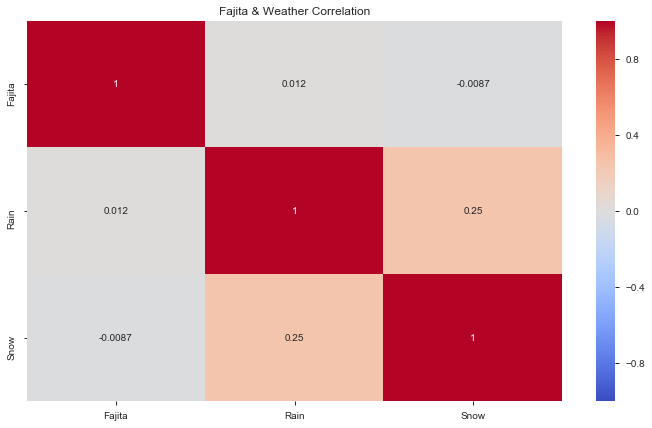

In [77]:
plt.figure(figsize=(12,7))
sns.heatmap(fajita_weather.corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True
           )
plt.title('Fajita & Weather Correlation');

## Entree 4 - Filet Mignon

### First, let's plot the entree

In [78]:
plt.figure(figsize=(14,9))
plt.plot(filet_mignon.Date, filet_mignon['Qty 4'], color='red')
plt.title('Filet Mignon Entree')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.12, 1.01])
L.get_texts()[0].set_text('Filet Mignon')

### Rename the columns

In [79]:
filet_mignon_forecast = filet_mignon.rename(columns={'Date': 'ds',
                                                      'Qty 4': 'y'})
filet_mignon_forecast.tail()

ds   y
391 2019-09-26   8
392 2019-09-27   8
393 2019-09-28  14
394 2019-09-29  10
395 2019-09-30   3

In [80]:
Model_filet_mignon = proph(interval_width=.75, weekly_seasonality=True, changepoint_prior_scale=.5)
Model_filet_mignon.add_seasonality(name='monthly', period=30.5, fourier_order=30)
Model_filet_mignon.add_country_holidays(country_name='US')

In [81]:
Model_filet_mignon.fit(filet_mignon_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### Make future dates with a period of 31 so that we can predict to the end of October.

In [82]:
future_dates_filet_mignon = Model_filet_mignon.make_future_dataframe(periods=31, freq='D')

In [83]:
future_dates_filet_mignon.tail()

ds
421 2019-10-27
422 2019-10-28
423 2019-10-29
424 2019-10-30
425 2019-10-31

In [84]:
forecast_filet_mignon = Model_filet_mignon.predict(future_dates_filet_mignon)

In [85]:
forecast_filet_mignon[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
421 2019-10-27  9.943231    5.964310   13.613493
422 2019-10-28  2.997557   -0.586475    6.775057
423 2019-10-29  2.623259   -1.297078    6.423335
424 2019-10-30  3.511758   -0.473068    7.284638
425 2019-10-31  2.504117   -1.172515    6.382298

### Plot the forecast.

In [86]:
Model_filet_mignon.plot(forecast_filet_mignon, uncertainty=True)
L = plt.legend(bbox_to_anchor=[1.215, 1.01])
plt.title('Filet Mignon Forecast')
L.get_texts()[0].set_text('Daily Filet Mignon Sold')
L.get_texts()[1].set_text('Filet Mignon Forecast')
plt.xlabel('Month')
plt.ylabel('Quantity Sold');

### Plot the Filet Mignon Sold and Filet Mignon Predictions

In [87]:
plt.figure(figsize=(20,15))
Model_filet_mignon.plot(forecast_filet_mignon, uncertainty=True)
plt.plot(filet_mignon.Date, filet_mignon['Qty 4'], color='red')
plt.title('Filet Mignon Prediction (End of October)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.23, 1.01])
L.get_texts()[0].set_text('Daily Filet Mignon Sold')
L.get_texts()[1].set_text('Filet Mignon Forecast')
L.get_texts()[2].set_text('Actual Filet Mignon Sold');

<Figure size 1440x1080 with 0 Axes>

### Plot the trends

In [88]:
Model_filet_mignon.plot_components(forecast_filet_mignon);

### Let's include performance metrics

In [89]:
filet_mignon_cv = cross_validation(Model_filet_mignon, horizon='31 Days')
filet_mignon_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2018-12-09 12:00:00 and 2019-08-30 00:00:00
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds       yhat  yhat_lower  yhat_upper   y              cutoff
0   2018-12-10  -3.684925   -5.993628   -1.620854   9 2018-12-09 12:00:00
1   2018-12-11   4.325212    2.201687    6.367078   3 2018-12-09 12:00:00
2   2018-12-12   1.523917   -0.542283    3.703609   9 2018-12-09 12:00:00
3   2018-12-13  -3.814890   -5.924157   -1.701669   2 2018-12-09 12:00:00
4   2018-12-14   4.883638    2.644416    6.795465   6 2018-12-09 12:00:00
5   2018-12-15  11.917350    9.766655   13.984841   7 2018-12-09 12:00:00
6   2018-12-16   6.130051    3.880248    8.659610   6 2018-12-09 12:00:00
7   2018-12-17  -0.683605   -2.813024    1.639645   0 2018-12-09 12:00:00
8   2018-12-18   4.326654    2.245750    6.516658   2 2018-12-09 12:00:00
9   2018-12-19   4.525593    2.204337    6.713548   3 2018-12-09 12:00:00
10  2018-12-20   2.186970   -0.070862    4.358837   1 2018-12-09 12:00:00
11  2018-12-21   2.885703    0.589347    5.285428   2 2018-12-09 12:00:00
12  2018-12-22  13.919596   11.598813   16.387338  18 2018-12-09 12:00:00
13  2018-12-23   6.132487    3.822928    8.419981  10 2018-12-09 12:00:00
14  2018-12-24   0.319014   -2.160737    2.723639   1 2018-12-09 12:00:00
15  2018-12-25   2.329465    0.146982    4.571548   0 2018-12-09 12:00:00
16  2018-12-26   8.528571    6.264593   10.961553   8 2018-12-09 12:00:00
17  2018-12-27  -0.809862   -3.208627    1.376951   2 2018-12-09 12:00:00
18  2018-12-28  11.889028    9.609053   14.113916   4 2018-12-09 12:00:00
19  2018-12-29  12.923200   10.476557   15.385269  17 2018-12-09 12:00:00
20  2018-12-30   3.136292    0.679678    5.629688   8 2018-12-09 12:00:00
21  2018-12-31   1.323011   -1.202798    3.870227  36 2018-12-09 12:00:00
22  2019-01-01   2.596129    0.165366    5.097728   0 2018-12-09 12:00:00
23  2019-01-02   5.312697    2.727342    7.838745   2 2018-12-09 12:00:00
24  2019-01-03  -5.809149   -8.263004   -3.247179   5 2018-12-09 12:00:00
25  2019-01-04  10.629377    7.802292   13.383859  12 2018-12-09 12:00:00
26  2019-01-05  16.924693   13.950247   19.546574  11 2018-12-09 12:00:00
27  2019-01-06   7.807658    5.058940   10.453013   4 2018-12-09 12:00:00
28  2019-01-07   0.261457   -2.526637    2.976257   5 2018-12-09 12:00:00
29  2019-01-08   2.266670   -0.497060    5.226169   6 2018-12-09 12:00:00
30  2019-01-09   2.483098   -0.496102    5.306929   4 2018-12-09 12:00:00
31  2018-12-26   9.619886    7.258996   11.863763   8 2018-12-25 00:00:00
32  2018-12-27   0.499776   -1.793013    3.052516   2 2018-12-25 00:00:00
33  2018-12-28  12.461650   10.041247   14.831054   4 2018-12-25 00:00:00
34  2018-12-29  12.930585   10.357230   15.232351  17 2018-12-25 00:00:00
35  2018-12-30   4.157275    1.649163    6.497011   8 2018-12-25 00:00:00
36  2018-12-31   3.789691    1.250247    6.217015  36 2018-12-25 00:00:00
37  2019-01-01   1.478677   -1.010273    3.840424   0 2018-12-25 00:00:00
38  2019-01-02   5.304740    2.793004    7.743957   2 2018-12-25 00:00:00
39  2019-01-03  -4.424778   -6.775342   -1.789744   5 2018-12-25 00:00:00
40  2019-01-04  10.666652    8.298293   13.063551  12 2018-12-25 00:00:00
41  2019-01-05  17.289059   14.834493   19.944479  11 2018-12-25 00:00:00
42  2019-01-06   8.049394    5.518031   10.545968   4 2018-12-25 00:00:00
43  2019-01-07   2.772863    0.491490    5.074212   5 2018-12-25 00:00:00
44  2019-01-08   2.443008   -0.034825    5.064839   6 2018-12-25 00:00:00
45  2019-01-09   3.791557    1.319756    6.249607   4 2018-12-25 00:00:00
46  2019-01-10  -2.235384   -4.681815    0.380953   2 2018-12-25 00:00:00
47  2019-01-11   6.786959    4.184342    9.206317   8 2018-12-25 00:00:00
48  2019-01-12  15.613982   13.072849   18.274905  15 2018-12-25 00:00:00
49  2019-01-13   6.658443    4.016587    9.301430   4 2018-12-25 00:00:00
50  2019-01-14  -0.064593   -2.643293    2.614764   7 2018-12-25 00:00:00
51  2019-01-15   5.659039    3.174869    8.188014   4 2018-12-25 00:00:00
52  2019-01-16   3.538592    0.859005    5.909591   4 2018-12-25 00:00:00
53  2019-01-17  

In [90]:
filet_mignon_p = performance_metrics(filet_mignon_cv)
filet_mignon_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon        mse      rmse       mae  coverage
0   3 days 12:00:00  13.409533  3.661903  2.774519  0.686869
1   4 days 00:00:00  15.432262  3.928392  2.955070  0.666667
2   4 days 12:00:00  18.999558  4.358848  3.186870  0.664646
3   5 days 00:00:00  21.474478  4.634056  3.308573  0.632323
4   5 days 12:00:00  21.229623  4.607562  3.336633  0.614141
5   6 days 00:00:00  37.263764  6.104405  3.558783  0.646465
6   6 days 12:00:00  38.113857  6.173642  3.618999  0.668687
7   7 days 00:00:00  35.441275  5.953258  3.445452  0.682828
8   7 days 12:00:00  31.340296  5.598240  3.124116  0.737374
9   8 days 00:00:00  30.205144  5.495921  3.174374  0.755556
10  8 days 12:00:00  32.679673  5.716614  3.355374  0.757576
11  9 days 00:00:00  18.829576  4.339306  3.226611  0.741414
12  9 days 12:00:00  18.731261  4.327963  3.383922  0.688889
13 10 days 00:00:00  19.191769  4.380841  3.446388  0.666667
14 10 days 12:00:00  19.788000  4.448370  3.525210  0.634343
15 11 days 00:00:00  20.006089  4.472817  3.540157  0.612121
16 11 days 12:00:00  19.499774  4.415855  3.563898  0.612121
17 12 days 00:00:00  20.831205  4.564122  3.589460  0.593939
18 12 days 12:00:00  17.882937  4.228822  3.292846  0.628283
19 13 days 00:00:00  17.503480  4.183716  3.280507  0.646465
20 13 days 12:00:00  16.909916  4.112167  3.280761  0.666667
21 14 days 00:00:00  19.797825  4.449475  3.415334  0.664646
22 14 days 12:00:00  18.649612  4.318520  3.217331  0.703030
23 15 days 00:00:00  15.222396  3.901589  2.889443  0.737374
24 15 days 12:00:00  17.791012  4.217939  3.157289  0.705051
25 16 days 00:00:00  16.913081  4.112552  2.987478  0.703030
26 16 days 12:00:00  17.374217  4.168239  2.980863  0.668687
27 17 days 00:00:00  14.131718  3.759218  2.767317  0.664646
28 17 days 12:00:00  13.259081  3.641302  2.793248  0.634343
29 18 days 00:00:00  12.082382  3.475972  2.622190  0.650505
30 18 days 12:00:00  11.945687  3.456253  2.660143  0.628283
31 19 days 00:00:00  10.735830  3.276558  2.493818  0.666667
32 19 days 12:00:00  14.230009  3.772268  2.829078  0.646465
33 20 days 00:00:00  18.422167  4.292105  3.125307  0.628283
34 20 days 12:00:00  21.329860  4.618426  3.171145  0.630303
35 21 days 00:00:00  21.508533  4.637729  3.253242  0.634343
36 21 days 12:00:00  41.021510  6.404804  3.616980  0.680808
37 22 days 00:00:00  42.664111  6.531777  3.774988  0.688889
38 22 days 12:00:00  41.368298  6.431819  3.737772  0.662626
39 23 days 00:00:00  36.883870  6.073209  3.349550  0.735354
40 23 days 12:00:00  35.912594  5.992712  3.437905  0.721212
41 24 days 00:00:00  38.852909  6.233210  3.690193  0.688889
42 24 days 12:00:00  23.386954  4.836006  3.558938  0.650505
43 25 days 00:00:00  21.647692  4.652708  3.594310  0.616162
44 25 days 12:00:00  21.168596  4.600934  3.501322  0.642424
45 26 days 00:00:00  21.073980  4.590640  3.510543  0.597980
46 26 days 12:00:00  20.227537  4.497503  3.443163  0.610101
47 27 days 00:00:00  19.444415  4.409582  3.497841  0.593939
48 27 days 12:00:00  18.789343  4.334668  3.429735  0.591919
49 28 days 00:00:00  17.787354  4.217506  3.265935  0.612121
50 28 days 12:00:00  18.584786  4.311008  3.430340  0.591919
51 29 days 00:00:00  18.588640  4.311455  3.533555  0.591919
52 29 days 12:00:00  22.309195  4.723261  3.725779  0.575758
53 30 days 00:00:00  21.895566  4.679270  3.591548  0.591919
54 30 days 12:00:00  18.861167  4.342945  3.265163  0.628283
55 31 days 00:00:00  20.626722  4.541665  3.461817  0.632323

### Plot RMSE for future prediction

In [91]:
fig = plot_cross_validation_metric(filet_mignon_cv, metric='rmse')
L = plt.legend(bbox_to_anchor=[1.28, 1.01])
plt.title('Filet Mignon RMSE Prediction (End of October)')
L.get_texts()[0].set_text('Root Mean Squared Error')
L.get_texts()[1].set_text('Average RMSE');

### Let's add weather to the mix and see if there are any correlations!

In [92]:
filet_mignon_weather = pd.merge(filet_mignon, entree_weather, how='left')

In [93]:
filet_mignon_weather.fillna(value=0, inplace=True)

In [94]:
len(filet_mignon_weather)

395

In [95]:
filet_mignon_weather.rename(columns={'Qty 4': 'Filet Mignon'}, inplace=True)

In [96]:
filet_mignon_weather.corr()

Filet Mignon      Rain      Snow
Filet Mignon      1.000000 -0.040667 -0.037974
Rain             -0.040667  1.000000  0.249830
Snow             -0.037974  0.249830  1.000000

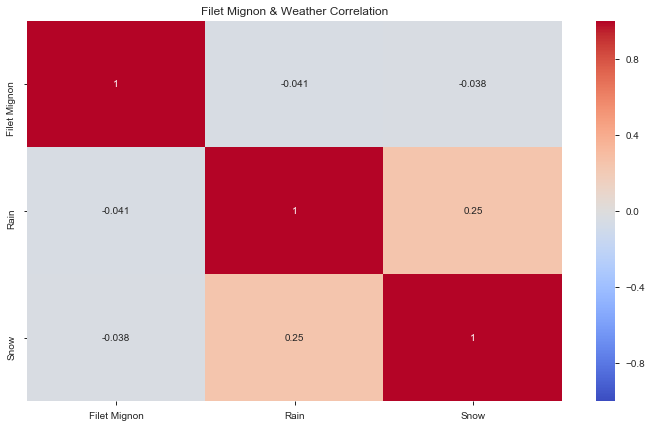

In [97]:
plt.figure(figsize=(12,7))
sns.heatmap(filet_mignon_weather.corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True
           )
plt.title('Filet Mignon & Weather Correlation');

## Entree 5 - Filet Tips

### First, let's plot the entree

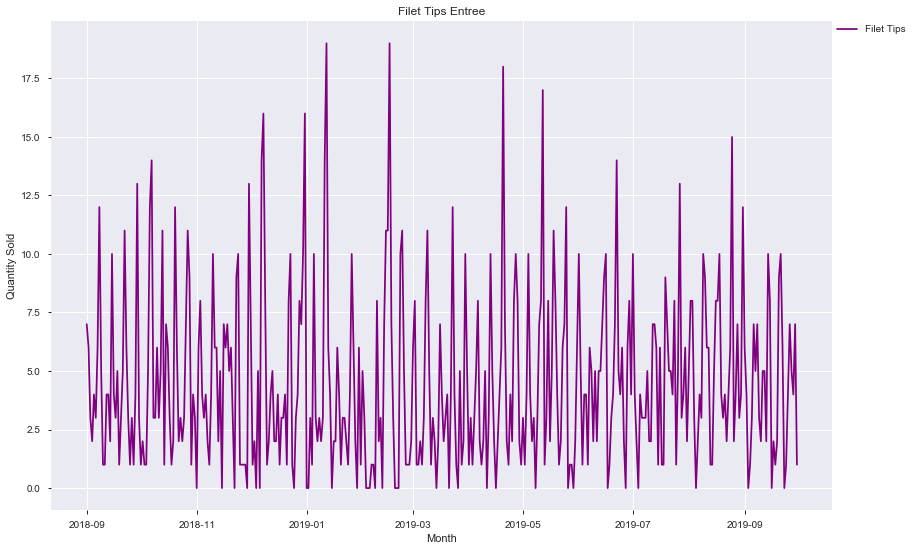

In [98]:
plt.figure(figsize=(14,9))
plt.plot(filet_tips.Date, filet_tips['Qty 5'], color='purple')
plt.title('Filet Tips Entree')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.105, 1.01])
L.get_texts()[0].set_text('Filet Tips')

### Rename the columns

In [99]:
filet_tips_forecast = filet_tips.rename(columns={'Date': 'ds',
                                                 'Qty 5': 'y'})
filet_tips_forecast.tail()

ds  y
391 2019-09-26  7
392 2019-09-27  5
393 2019-09-28  4
394 2019-09-29  7
395 2019-09-30  1

In [100]:
Model_filet_tips = proph(interval_width=.75, weekly_seasonality=True, changepoint_prior_scale=.5)
Model_filet_tips.add_seasonality(name='monthly', period=30.5, fourier_order=30)
Model_filet_tips.add_country_holidays(country_name='US')

In [101]:
Model_filet_tips.fit(filet_tips_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### Make future dates with a period of 31 so that we can predict to the end of October.

In [102]:
future_dates_filet_tips = Model_filet_tips.make_future_dataframe(periods=31, freq='D')

In [103]:
future_dates_filet_tips.tail()

ds
421 2019-10-27
422 2019-10-28
423 2019-10-29
424 2019-10-30
425 2019-10-31

In [104]:
forecast_filet_tips = Model_filet_tips.predict(future_dates_filet_tips)

In [105]:
forecast_filet_tips[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
421 2019-10-27  5.754841    2.754906    8.511520
422 2019-10-28  4.341805    1.629986    7.003935
423 2019-10-29  3.031923    0.229676    5.647213
424 2019-10-30  1.737938   -1.066816    4.642757
425 2019-10-31  5.538915    2.889295    8.166703

### Plot the forecast.

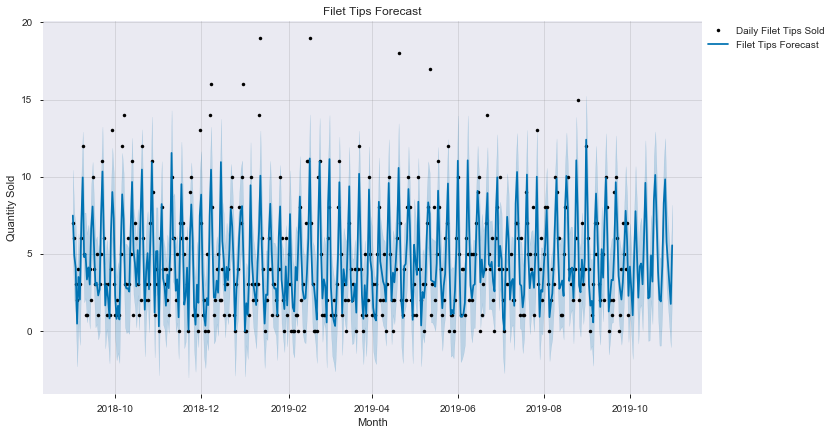

In [106]:
Model_filet_tips.plot(forecast_filet_tips, uncertainty=True)
L = plt.legend(bbox_to_anchor=[1.20, 1.01])
plt.title('Filet Tips Forecast')
L.get_texts()[0].set_text('Daily Filet Tips Sold')
L.get_texts()[1].set_text('Filet Tips Forecast')
plt.xlabel('Month')
plt.ylabel('Quantity Sold');

### Plot the Filet Tips Sold and Filet Tips Predictions

<Figure size 1440x1080 with 0 Axes>

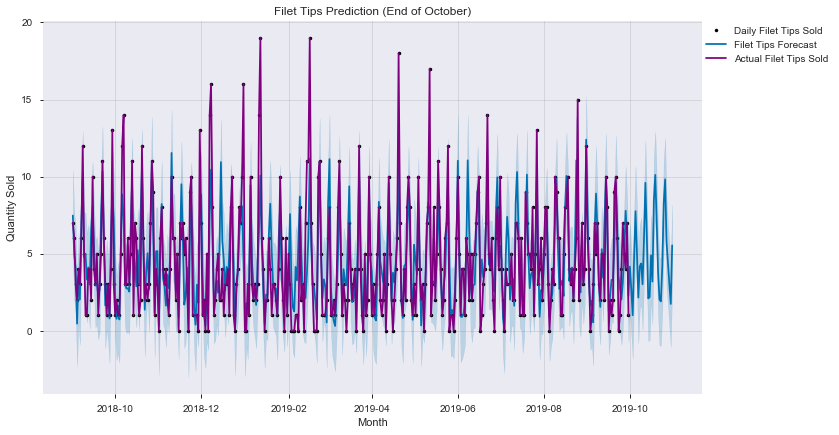

In [107]:
plt.figure(figsize=(20,15))
Model_filet_tips.plot(forecast_filet_tips, uncertainty=True)
plt.plot(filet_tips.Date, filet_tips['Qty 5'], color='purple')
plt.title('Filet Tips Prediction (End of October)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.205, 1.01])
L.get_texts()[0].set_text('Daily Filet Tips Sold')
L.get_texts()[1].set_text('Filet Tips Forecast')
L.get_texts()[2].set_text('Actual Filet Tips Sold');

### Plot the trends

In [108]:
Model_filet_tips.plot_components(forecast_filet_tips);

### Let's include performance metrics

In [109]:
filet_tips_cv = cross_validation(Model_filet_tips, horizon='31 Days')
filet_tips_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2018-12-09 12:00:00 and 2019-08-30 00:00:00
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds       yhat  yhat_lower  yhat_upper   y              cutoff
0   2018-12-10   6.499520    5.295751    7.671801   1 2018-12-09 12:00:00
1   2018-12-11   3.198171    2.100967    4.362666   2 2018-12-09 12:00:00
2   2018-12-12   3.797416    2.655647    4.972946   4 2018-12-09 12:00:00
3   2018-12-13   0.399988   -0.836529    1.574748   5 2018-12-09 12:00:00
4   2018-12-14   3.500691    2.320472    4.563594   2 2018-12-09 12:00:00
5   2018-12-15  13.240615   12.093676   14.413365   2 2018-12-09 12:00:00
6   2018-12-16   7.602153    6.330237    8.802041   4 2018-12-09 12:00:00
7   2018-12-17   3.499369    2.260860    4.747513   1 2018-12-09 12:00:00
8   2018-12-18   1.197986    0.016131    2.480474   3 2018-12-09 12:00:00
9   2018-12-19   0.797182   -0.356527    1.961415   3 2018-12-09 12:00:00
10  2018-12-20   1.399690    0.229807    2.567749   4 2018-12-09 12:00:00
11  2018-12-21   8.500330    7.323950    9.647559   1 2018-12-09 12:00:00
12  2018-12-22   8.240240    7.011170    9.398171   8 2018-12-09 12:00:00
13  2018-12-23   4.601755    3.419989    5.751465  10 2018-12-09 12:00:00
14  2018-12-24   2.498948    1.280794    3.646968   1 2018-12-09 12:00:00
15  2018-12-25   3.197538    2.032284    4.341601   0 2018-12-09 12:00:00
16  2018-12-26   5.796731    4.755227    7.061166   3 2018-12-09 12:00:00
17  2018-12-27   0.399267   -0.807244    1.572921   4 2018-12-09 12:00:00
18  2018-12-28  11.499900   10.241553   12.714784   8 2018-12-09 12:00:00
19  2018-12-29   7.239805    6.025071    8.405129   7 2018-12-09 12:00:00
20  2018-12-30   5.601287    4.386043    6.739702  10 2018-12-09 12:00:00
21  2018-12-31   3.498455    2.258294    4.640076  16 2018-12-09 12:00:00
22  2019-01-01  -1.606461   -2.749451   -0.485169   0 2018-12-09 12:00:00
23  2019-01-02   6.043499    4.949646    7.239716   0 2018-12-09 12:00:00
24  2019-01-03  -2.579128   -3.719419   -1.403068   3 2018-12-09 12:00:00
25  2019-01-04   6.297177    5.123035    7.534207   1 2018-12-09 12:00:00
26  2019-01-05   9.986080    8.826668   11.133385  10 2018-12-09 12:00:00
27  2019-01-06   5.197014    4.041130    6.411028   3 2018-12-09 12:00:00
28  2019-01-07   3.894712    2.736976    5.037201   2 2018-12-09 12:00:00
29  2019-01-08   1.394744    0.201252    2.512342   3 2018-12-09 12:00:00
30  2019-01-09   4.544677    3.352071    5.675800   2 2018-12-09 12:00:00
31  2018-12-26   5.710489    4.162303    7.380932   3 2018-12-25 00:00:00
32  2018-12-27   0.981758   -0.639099    2.570644   4 2018-12-25 00:00:00
33  2018-12-28   9.920525    8.287423   11.467214   8 2018-12-25 00:00:00
34  2018-12-29   4.894115    3.443737    6.540959   7 2018-12-25 00:00:00
35  2018-12-30   5.447383    3.811159    7.141896  10 2018-12-25 00:00:00
36  2018-12-31   1.727221    0.245174    3.343826  16 2018-12-25 00:00:00
37  2019-01-01  -1.339203   -3.037584    0.143292   0 2018-12-25 00:00:00
38  2019-01-02   5.492377    3.825255    7.147804   0 2018-12-25 00:00:00
39  2019-01-03  -2.085018   -3.678105   -0.593687   3 2018-12-25 00:00:00
40  2019-01-04   4.965538    3.462427    6.500147   1 2018-12-25 00:00:00
41  2019-01-05   7.080712    5.448002    8.615532  10 2018-12-25 00:00:00
42  2019-01-06   5.166199    3.521189    6.728775   3 2018-12-25 00:00:00
43  2019-01-07   2.379431    0.810438    4.115538   2 2018-12-25 00:00:00
44  2019-01-08   1.573718    0.041978    3.063044   3 2018-12-25 00:00:00
45  2019-01-09   3.905414    2.309564    5.476366   2 2018-12-25 00:00:00
46  2019-01-10  -2.337462   -3.889919   -0.652640   3 2018-12-25 00:00:00
47  2019-01-11   3.961266    2.335870    5.493490  14 2018-12-25 00:00:00
48  2019-01-12   7.223562    5.651516    8.725504  19 2018-12-25 00:00:00
49  2019-01-13   4.579131    3.091153    6.106315   6 2018-12-25 00:00:00
50  2019-01-14   1.792370    0.120970    3.313741   4 2018-12-25 00:00:00
51  2019-01-15  -0.013306   -1.724450    1.396392   0 2018-12-25 00:00:00
52  2019-01-16   4.818319    3.308247    6.479716   2 2018-12-25 00:00:00
53  2019-01-17  

In [110]:
filet_tips_p = performance_metrics(filet_tips_cv)
filet_tips_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon        mse      rmse       mae  coverage
0   3 days 12:00:00  13.150929  3.626421  2.604267  0.646465
1   4 days 00:00:00  13.883948  3.726117  2.742462  0.597980
2   4 days 12:00:00  14.799900  3.847064  2.731167  0.608081
3   5 days 00:00:00  15.219762  3.901251  2.750915  0.628283
4   5 days 12:00:00  16.844080  4.104154  2.879084  0.628283
5   6 days 00:00:00  20.251151  4.500128  3.057146  0.597980
6   6 days 12:00:00  21.078144  4.591094  2.989379  0.610101
7   7 days 00:00:00  20.811072  4.561915  2.917896  0.628283
8   7 days 12:00:00  19.855130  4.455910  2.890538  0.610101
9   8 days 00:00:00  19.280970  4.391010  2.923292  0.575758
10  8 days 12:00:00  16.715655  4.088478  2.718241  0.591919
11  9 days 00:00:00  13.153254  3.626741  2.436674  0.612121
12  9 days 12:00:00  10.923774  3.305113  2.415396  0.575758
13 10 days 00:00:00  12.065028  3.473475  2.580705  0.539394
14 10 days 12:00:00  11.436159  3.381739  2.623712  0.535354
15 11 days 00:00:00  11.083092  3.329128  2.546880  0.571717
16 11 days 12:00:00  11.557665  3.399657  2.601927  0.575758
17 12 days 00:00:00  13.164058  3.628231  2.743556  0.577778
18 12 days 12:00:00  13.084689  3.617276  2.739808  0.589899
19 13 days 00:00:00  11.885770  3.447574  2.583126  0.626263
20 13 days 12:00:00  11.538802  3.396881  2.555238  0.626263
21 14 days 00:00:00  15.004378  3.873548  2.859563  0.593939
22 14 days 12:00:00  14.386384  3.792939  2.788009  0.575758
23 15 days 00:00:00  12.940921  3.597349  2.730620  0.559596
24 15 days 12:00:00  12.357761  3.515361  2.690565  0.555556
25 16 days 00:00:00  12.157432  3.486751  2.716842  0.539394
26 16 days 12:00:00  10.549670  3.248026  2.482703  0.589899
27 17 days 00:00:00   9.423740  3.069811  2.356420  0.608081
28 17 days 12:00:00   8.961108  2.993511  2.329551  0.628283
29 18 days 00:00:00  11.586551  3.403902  2.529478  0.593939
30 18 days 12:00:00  12.210324  3.494327  2.582372  0.610101
31 19 days 00:00:00  13.199457  3.633106  2.703699  0.610101
32 19 days 12:00:00  13.619386  3.690445  2.761761  0.595960
33 20 days 00:00:00  13.503232  3.674674  2.728217  0.610101
34 20 days 12:00:00  13.204094  3.633744  2.698725  0.593939
35 21 days 00:00:00  11.393179  3.375378  2.565665  0.608081
36 21 days 12:00:00  13.205580  3.633948  2.686373  0.593939
37 22 days 00:00:00  13.623846  3.691049  2.563642  0.610101
38 22 days 12:00:00  13.898200  3.728029  2.612196  0.557576
39 23 days 00:00:00  13.824610  3.718146  2.577649  0.557576
40 23 days 12:00:00  15.117065  3.888067  2.812727  0.519192
41 24 days 00:00:00  14.846921  3.853170  2.746434  0.537374
42 24 days 12:00:00  12.660719  3.558190  2.550670  0.555556
43 25 days 00:00:00  11.779712  3.432159  2.625395  0.521212
44 25 days 12:00:00  13.750690  3.708192  2.876101  0.533333
45 26 days 00:00:00  13.176124  3.629893  2.907484  0.557576
46 26 days 12:00:00  13.152256  3.626604  2.804536  0.606061
47 27 days 00:00:00  12.576989  3.546405  2.726382  0.630303
48 27 days 12:00:00  14.827992  3.850713  2.907591  0.630303
49 28 days 00:00:00  14.040876  3.747116  2.817129  0.644444
50 28 days 12:00:00  12.654085  3.557258  2.652034  0.644444
51 29 days 00:00:00  11.946485  3.456369  2.618227  0.595960
52 29 days 12:00:00  15.205284  3.899395  2.927522  0.521212
53 30 days 00:00:00  15.073029  3.882400  2.913804  0.523232
54 30 days 12:00:00  13.321222  3.649825  2.811643  0.539394
55 31 days 00:00:00  13.312017  3.648564  2.829524  0.537374

### Plot RMSE for future prediction

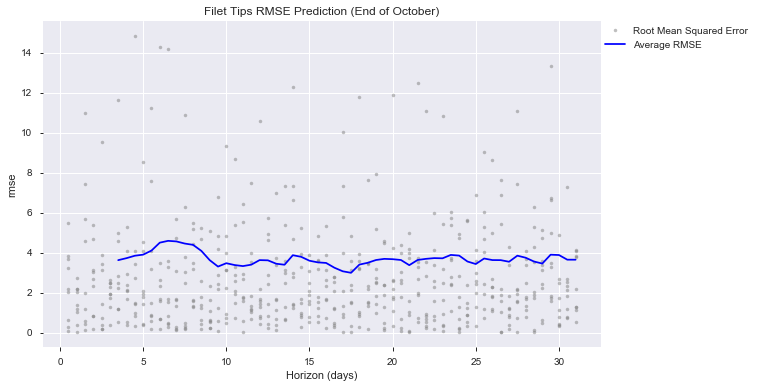

In [111]:
fig = plot_cross_validation_metric(filet_tips_cv, metric='rmse')
L = plt.legend(bbox_to_anchor=[1.28, 1.01])
plt.title('Filet Tips RMSE Prediction (End of October)')
L.get_texts()[0].set_text('Root Mean Squared Error')
L.get_texts()[1].set_text('Average RMSE');

### Let's add weather to the mix and see if there are any correlations!

In [112]:
filet_tips_weather = pd.merge(filet_tips, entree_weather, how='left')

In [113]:
filet_tips_weather.fillna(value=0, inplace=True)

In [114]:
len(filet_tips_weather)

395

In [115]:
filet_tips_weather.rename(columns={'Qty 5': 'Filet Tips'}, inplace=True)

In [116]:
filet_tips_weather.corr()

Filet Tips      Rain      Snow
Filet Tips    1.000000 -0.035995 -0.011467
Rain         -0.035995  1.000000  0.249830
Snow         -0.011467  0.249830  1.000000

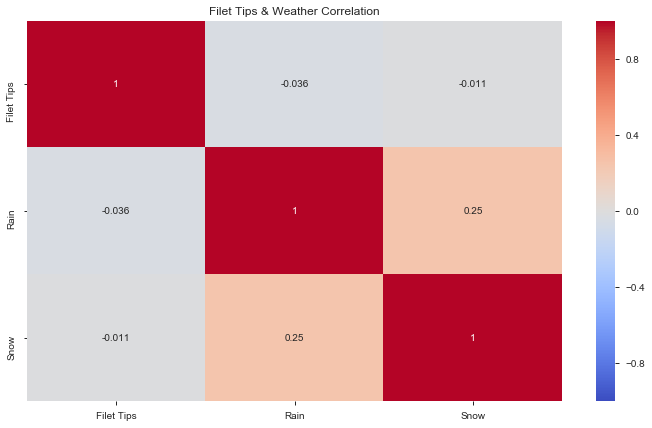

In [117]:
plt.figure(figsize=(12,7))
sns.heatmap(filet_tips_weather.corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True
           )
plt.title('Filet Tips & Weather Correlation');

## Entree 6 - Glazed Salmon

### First, let's plot the entree

In [118]:
plt.figure(figsize=(14,9))
plt.plot(glazed_salmon.Date, glazed_salmon['Qty 6'], color='brown')
plt.title('Glazed Salmon Entree')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.14, 1.01])
L.get_texts()[0].set_text('Glazed Salmon')

### Rename the columns

In [119]:
glazed_salmon_forecast = glazed_salmon.rename(columns={'Date': 'ds',
                                                       'Qty 6': 'y'})
glazed_salmon_forecast.tail()

ds   y
391 2019-09-26   9
392 2019-09-27  12
393 2019-09-28  13
394 2019-09-29  14
395 2019-09-30   4

In [120]:
Model_glazed_salmon = proph(interval_width=.75, weekly_seasonality=True, changepoint_prior_scale=.5)
Model_glazed_salmon.add_seasonality(name='monthly', period=30.5, fourier_order=30)
Model_glazed_salmon.add_country_holidays(country_name='US')

In [121]:
Model_glazed_salmon.fit(glazed_salmon_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### Make future dates with a period of 31 so that we can predict to the end of October.

In [122]:
future_dates_glazed_salmon = Model_glazed_salmon.make_future_dataframe(periods=31, freq='D')

In [123]:
future_dates_glazed_salmon.tail()

ds
421 2019-10-27
422 2019-10-28
423 2019-10-29
424 2019-10-30
425 2019-10-31

In [124]:
forecast_glazed_salmon = Model_glazed_salmon.predict(future_dates_glazed_salmon)

In [125]:
forecast_glazed_salmon[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
421 2019-10-27  14.837979    8.811302   20.856585
422 2019-10-28   3.741723   -2.607536    9.411103
423 2019-10-29   4.033720   -1.856142   10.247670
424 2019-10-30   9.778133    3.975334   15.880106
425 2019-10-31  10.593083    4.403915   17.068872

### Plot the forecast.

In [126]:
Model_glazed_salmon.plot(forecast_glazed_salmon, uncertainty=True)
L = plt.legend(bbox_to_anchor=[1.24, 1.01])
plt.title('Glazed Salmon Forecast')
L.get_texts()[0].set_text('Daily Glazed Salmon Sold')
L.get_texts()[1].set_text('Glazed Salmon Forecast')
plt.xlabel('Month')
plt.ylabel('Quantity Sold');

### Plot the Glazed Salmon Sold and Glazed Salmon Predictions

<Figure size 1440x1080 with 0 Axes>

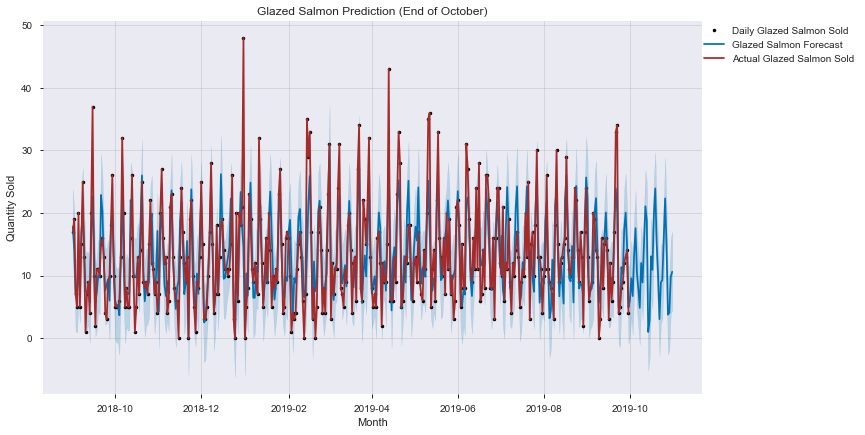

In [127]:
plt.figure(figsize=(20,15))
Model_glazed_salmon.plot(forecast_glazed_salmon, uncertainty=True)
plt.plot(glazed_salmon.Date, glazed_salmon['Qty 6'], color='brown')
plt.title('Glazed Salmon Prediction (End of October)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.245, 1.01])
L.get_texts()[0].set_text('Daily Glazed Salmon Sold')
L.get_texts()[1].set_text('Glazed Salmon Forecast')
L.get_texts()[2].set_text('Actual Glazed Salmon Sold');

### Plot the trends

In [128]:
Model_glazed_salmon.plot_components(forecast_glazed_salmon);

### Let's include performance metrics

In [129]:
glazed_salmon_cv = cross_validation(Model_glazed_salmon, horizon='31 Days')
glazed_salmon_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2018-12-09 12:00:00 and 2019-08-30 00:00:00
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds       yhat  yhat_lower  yhat_upper   y              cutoff
0   2018-12-10   0.972651   -1.171782    3.169576   4 2018-12-09 12:00:00
1   2018-12-11   3.790161    1.540493    5.889551   7 2018-12-09 12:00:00
2   2018-12-12   6.718829    4.552297    8.714683  18 2018-12-09 12:00:00
3   2018-12-13   3.497724    1.264220    5.618284   7 2018-12-09 12:00:00
4   2018-12-14  12.020811   10.035359   14.109719  13 2018-12-09 12:00:00
5   2018-12-15  21.143465   18.924303   23.212917  18 2018-12-09 12:00:00
6   2018-12-16  12.504308   10.323980   14.622532  19 2018-12-09 12:00:00
7   2018-12-17   8.972527    6.828828   11.103654  14 2018-12-09 12:00:00
8   2018-12-18   5.790040    3.574635    7.951341  11 2018-12-09 12:00:00
9   2018-12-19   4.718706    2.599900    6.727198  11 2018-12-09 12:00:00
10  2018-12-20   2.497595    0.273435    4.666912  10 2018-12-09 12:00:00
11  2018-12-21  11.020677    8.769193   13.181419  11 2018-12-09 12:00:00
12  2018-12-22  28.143320   25.990544   30.300292  15 2018-12-09 12:00:00
13  2018-12-23  16.504098   14.462525   18.828971  26 2018-12-09 12:00:00
14  2018-12-24   2.972257    0.881631    5.229561   3 2018-12-09 12:00:00
15  2018-12-25  13.789690   11.619319   15.942082   0 2018-12-09 12:00:00
16  2018-12-26  12.718292   10.531195   14.812255  20 2018-12-09 12:00:00
17  2018-12-27 -10.502866  -12.562616   -8.277459   6 2018-12-09 12:00:00
18  2018-12-28  13.020141   10.939663   15.209312  20 2018-12-09 12:00:00
19  2018-12-29  27.142716   24.810446   29.383554  18 2018-12-09 12:00:00
20  2018-12-30  16.503487   14.234307   18.669352  21 2018-12-09 12:00:00
21  2018-12-31  -0.028356   -2.188640    2.184709  48 2018-12-09 12:00:00
22  2019-01-01   1.788328   -0.556609    4.222644   0 2018-12-09 12:00:00
23  2019-01-02  13.306355   10.870044   15.395526   5 2018-12-09 12:00:00
24  2019-01-03   4.508088    2.210683    6.751473   8 2018-12-09 12:00:00
25  2019-01-04  18.004521   15.747435   20.253402  23 2018-12-09 12:00:00
26  2019-01-05  35.687658   33.391860   37.997048  19 2018-12-09 12:00:00
27  2019-01-06  17.284462   14.826942   19.672277  11 2018-12-09 12:00:00
28  2019-01-07   2.043200   -0.317869    4.287562   9 2018-12-09 12:00:00
29  2019-01-08   4.076260    1.455205    6.402849  12 2018-12-09 12:00:00
30  2019-01-09   9.594316    7.221910   11.835884   9 2018-12-09 12:00:00
31  2018-12-26  17.435601   14.934988   20.053242  20 2018-12-25 00:00:00
32  2018-12-27  -6.384710   -8.833352   -3.796032   6 2018-12-25 00:00:00
33  2018-12-28  15.753833   13.300683   18.239902  20 2018-12-25 00:00:00
34  2018-12-29  26.820232   24.300300   29.415570  18 2018-12-25 00:00:00
35  2018-12-30  21.337619   18.642876   23.886831  21 2018-12-25 00:00:00
36  2018-12-31   3.712147    1.019719    6.187786  48 2018-12-25 00:00:00
37  2019-01-01   5.512710    2.968439    8.017101   0 2018-12-25 00:00:00
38  2019-01-02  17.701907   15.118090   20.257161   5 2018-12-25 00:00:00
39  2019-01-03   9.279210    6.736694   11.690209   8 2018-12-25 00:00:00
40  2019-01-04  21.562360   18.851159   23.995960  23 2018-12-25 00:00:00
41  2019-01-05  35.691760   32.909822   38.132460  19 2018-12-25 00:00:00
42  2019-01-06  22.682941   19.952674   25.237904  11 2018-12-25 00:00:00
43  2019-01-07   7.055434    4.520349    9.678603   9 2018-12-25 00:00:00
44  2019-01-08   9.217975    6.471416   11.789852  12 2018-12-25 00:00:00
45  2019-01-09  15.407177   12.853558   17.988547   9 2018-12-25 00:00:00
46  2019-01-10   3.995228    1.418830    6.466811   7 2018-12-25 00:00:00
47  2019-01-11  23.317461   20.757504   25.884615  32 2018-12-25 00:00:00
48  2019-01-12  27.546176   24.951992   29.871732  19 2018-12-25 00:00:00
49  2019-01-13  18.890830   16.371771   21.307242  12 2018-12-25 00:00:00
50  2019-01-14  10.764763    8.166028   13.142423   5 2018-12-25 00:00:00
51  2019-01-15  12.428749    9.946072   14.919471  10 2018-12-25 00:00:00
52  2019-01-16  10.119402    7.627552   12.454925  16 2018-12-25 00:00:00
53  2019-01-17  

In [130]:
glazed_salmon_p = performance_metrics(glazed_salmon_cv)
glazed_salmon_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon         mse       rmse       mae  coverage
0   3 days 12:00:00   38.277317   6.186866  5.125924  0.535354
1   4 days 00:00:00   42.294080   6.503390  5.170296  0.553535
2   4 days 12:00:00   62.169289   7.884750  5.378956  0.571717
3   5 days 00:00:00   59.069693   7.685681  5.229551  0.575758
4   5 days 12:00:00   61.133146   7.818769  5.233629  0.573737
5   6 days 00:00:00  102.351269  10.116880  6.409634  0.517172
6   6 days 12:00:00  106.082875  10.299654  6.732564  0.484848
7   7 days 00:00:00  103.932477  10.194728  6.692736  0.501010
8   7 days 12:00:00   83.136010   9.117895  6.278637  0.482828
9   8 days 00:00:00   84.251196   9.178845  6.435235  0.466667
10  8 days 12:00:00   82.943162   9.107314  6.534008  0.464646
11  9 days 00:00:00   46.022001   6.783952  5.404576  0.547475
12  9 days 12:00:00   45.065395   6.713076  5.521463  0.535354
13 10 days 00:00:00   41.388587   6.433396  5.318397  0.539394
14 10 days 12:00:00   44.777591   6.691606  5.443067  0.571717
15 11 days 00:00:00   48.490553   6.963516  5.642984  0.537374
16 11 days 12:00:00   47.758551   6.910756  5.433015  0.555556
17 12 days 00:00:00   48.981918   6.998708  5.483363  0.557576
18 12 days 12:00:00   46.228833   6.799179  5.281886  0.587879
19 13 days 00:00:00   46.650297   6.830102  5.312751  0.593939
20 13 days 12:00:00   51.613529   7.184256  5.653263  0.557576
21 14 days 00:00:00   55.018506   7.417446  5.645633  0.569697
22 14 days 12:00:00   55.716818   7.464370  5.798800  0.557576
23 15 days 00:00:00   52.858976   7.270418  5.765306  0.575758
24 15 days 12:00:00   53.851153   7.338334  5.863540  0.555556
25 16 days 00:00:00   57.447941   7.579442  6.028593  0.539394
26 16 days 12:00:00   52.522363   7.247231  5.852931  0.517172
27 17 days 00:00:00   47.385803   6.883735  5.925279  0.498990
28 17 days 12:00:00   50.014035   7.072060  5.995596  0.519192
29 18 days 00:00:00   50.811496   7.128218  6.005248  0.505051
30 18 days 12:00:00   53.251365   7.297353  6.072906  0.498990
31 19 days 00:00:00   49.022726   7.001623  5.790064  0.519192
32 19 days 12:00:00   52.126143   7.219844  5.806875  0.551515
33 20 days 00:00:00   66.282658   8.141416  5.855964  0.587879
34 20 days 12:00:00   59.584965   7.719130  5.511681  0.593939
35 21 days 00:00:00   61.093546   7.816236  5.427907  0.593939
36 21 days 12:00:00  105.663561  10.279278  6.477769  0.553535
37 22 days 00:00:00  106.269679  10.308719  6.598099  0.521212
38 22 days 12:00:00  103.870026  10.191665  6.501527  0.537374
39 23 days 00:00:00   90.440803   9.510037  6.270529  0.519192
40 23 days 12:00:00   92.265439   9.605490  6.516641  0.484848
41 24 days 00:00:00   90.610442   9.518952  6.631880  0.466667
42 24 days 12:00:00   48.919299   6.994233  5.550902  0.513131
43 25 days 00:00:00   50.630079   7.115482  5.758950  0.517172
44 25 days 12:00:00   47.315381   6.878618  5.641213  0.484848
45 26 days 00:00:00   50.159286   7.082322  5.716332  0.517172
46 26 days 12:00:00   54.087095   7.354393  5.849029  0.517172
47 27 days 00:00:00   54.513495   7.383325  5.674627  0.537374
48 27 days 12:00:00   55.142466   7.425797  5.702091  0.555556
49 28 days 00:00:00   50.080343   7.076747  5.454180  0.571717
50 28 days 12:00:00   49.929958   7.066113  5.349524  0.608081
51 29 days 00:00:00   54.499090   7.382350  5.678281  0.557576
52 29 days 12:00:00   59.166242   7.691960  5.835247  0.553535
53 30 days 00:00:00   61.476907   7.840721  6.099288  0.503030
54 30 days 12:00:00   57.994994   7.615444  5.976281  0.484848
55 31 days 00:00:00   58.403386   7.642211  5.960047  0.464646

### Plot RMSE for future prediction

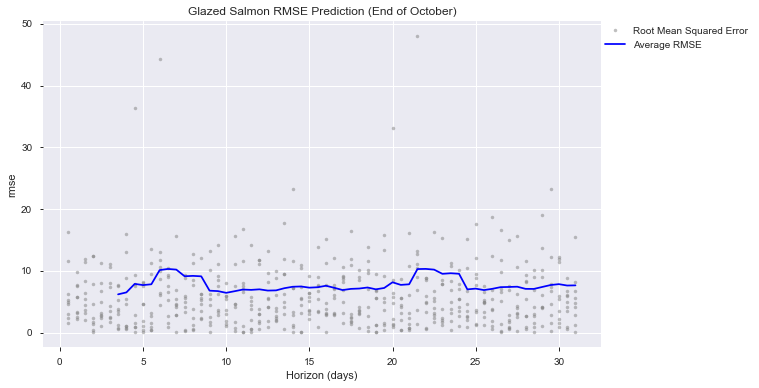

In [131]:
fig = plot_cross_validation_metric(glazed_salmon_cv, metric='rmse')
L = plt.legend(bbox_to_anchor=[1.28, 1.01])
plt.title('Glazed Salmon RMSE Prediction (End of October)')
L.get_texts()[0].set_text('Root Mean Squared Error')
L.get_texts()[1].set_text('Average RMSE');

### Let's add weather to the mix and see if there are any correlations!

In [132]:
glazed_salmon_weather = pd.merge(glazed_salmon, entree_weather, how='left')

In [133]:
glazed_salmon_weather.fillna(value=0, inplace=True)

In [134]:
len(glazed_salmon_weather)

395

In [135]:
glazed_salmon_weather.rename(columns={'Qty 6': 'Glazed Salmon'}, inplace=True)

In [136]:
glazed_salmon_weather.corr()

Glazed Salmon      Rain      Snow
Glazed Salmon       1.000000  0.012297  0.001023
Rain                0.012297  1.000000  0.249830
Snow                0.001023  0.249830  1.000000

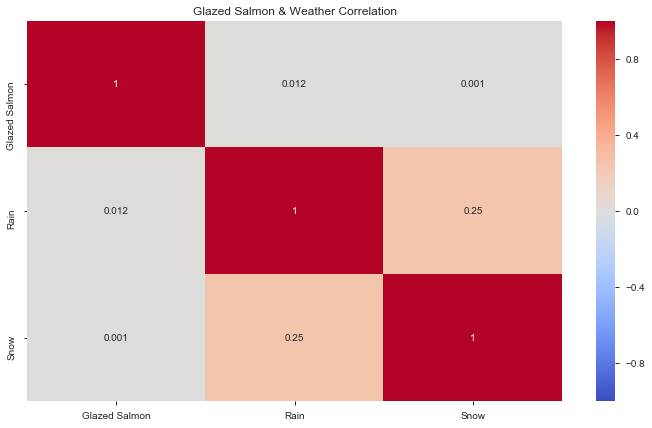

In [137]:
plt.figure(figsize=(12,7))
sns.heatmap(glazed_salmon_weather.corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True
           )
plt.title('Glazed Salmon & Weather Correlation');

## Entree 7 - Pork Chops

### First, let's plot the entree

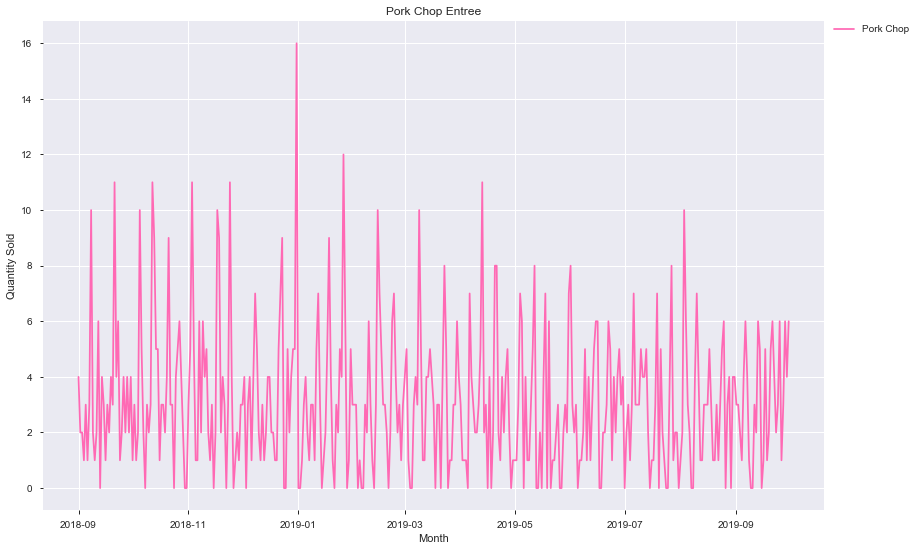

In [138]:
plt.figure(figsize=(14,9))
plt.plot(pork_chop.Date, pork_chop['Qty 7'], color='hotpink')
plt.title('Pork Chop Entree')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.12, 1.01])
L.get_texts()[0].set_text('Pork Chop')

### Rename the columns

In [139]:
pork_chop_forecast = pork_chop.rename(columns={'Date': 'ds',
                                               'Qty 7': 'y'})
pork_chop_forecast.tail()

ds  y
391 2019-09-26  1
392 2019-09-27  3
393 2019-09-28  6
394 2019-09-29  4
395 2019-09-30  6

In [140]:
Model_pork_chop = proph(interval_width=.75, weekly_seasonality=True, changepoint_prior_scale=1)
Model_pork_chop.add_seasonality(name='monthly', period=30.5, fourier_order=35)
Model_pork_chop.add_country_holidays(country_name='US')

In [141]:
Model_pork_chop.fit(pork_chop_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### Make future dates with a period of 31 so that we can predict to the end of October.

In [142]:
future_dates_pork_chop = Model_pork_chop.make_future_dataframe(periods=31, freq='D')

In [143]:
future_dates_pork_chop.tail()

ds
421 2019-10-27
422 2019-10-28
423 2019-10-29
424 2019-10-30
425 2019-10-31

In [144]:
forecast_pork_chop = Model_pork_chop.predict(future_dates_pork_chop)

In [145]:
forecast_pork_chop[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
421 2019-10-27  4.845190    2.755226    7.064942
422 2019-10-28  2.004086   -0.162769    4.150305
423 2019-10-29  0.318156   -1.873552    2.346950
424 2019-10-30  2.208664    0.194573    4.390450
425 2019-10-31  1.109618   -0.897330    3.229904

### Plot the forecast.

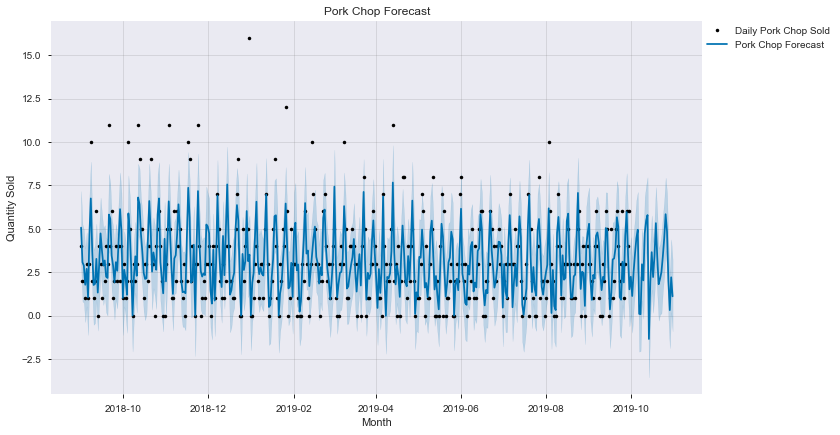

In [146]:
Model_pork_chop.plot(forecast_pork_chop, uncertainty=True)
L = plt.legend(bbox_to_anchor=[1.21, 1.01])
plt.title('Pork Chop Forecast')
L.get_texts()[0].set_text('Daily Pork Chop Sold')
L.get_texts()[1].set_text('Pork Chop Forecast')
plt.xlabel('Month')
plt.ylabel('Quantity Sold');

### Plot the Pork Chop Sold and Pork Chop Predictions

<Figure size 1440x1080 with 0 Axes>

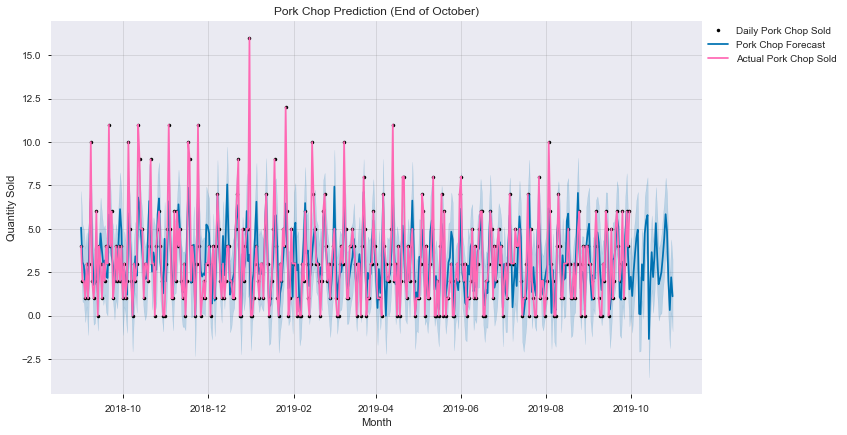

In [147]:
plt.figure(figsize=(20,15))
Model_pork_chop.plot(forecast_pork_chop, uncertainty=True)
plt.plot(pork_chop.Date, pork_chop['Qty 7'], color='hotpink')
plt.title('Pork Chop Prediction (End of October)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.22, 1.01])
L.get_texts()[0].set_text('Daily Pork Chop Sold')
L.get_texts()[1].set_text('Pork Chop Forecast')
L.get_texts()[2].set_text('Actual Pork Chop Sold');

### Plot the trends

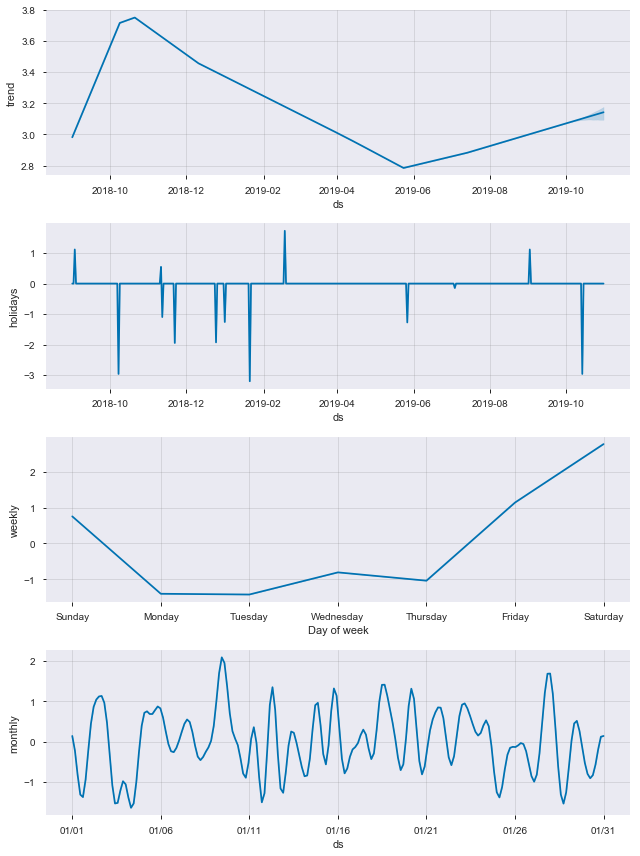

In [148]:
Model_pork_chop.plot_components(forecast_pork_chop);

### Let's include performance metrics

In [149]:
pork_chop_cv = cross_validation(Model_pork_chop, horizon='31 Days')
pork_chop_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2018-12-09 12:00:00 and 2019-08-30 00:00:00
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds       yhat  yhat_lower  yhat_upper   y              cutoff
0   2018-12-10  -1.152581   -2.261065   -0.041566   2 2018-12-09 12:00:00
1   2018-12-11   2.416238    1.306608    3.572304   1 2018-12-09 12:00:00
2   2018-12-12   7.245783    6.139334    8.379236   3 2018-12-09 12:00:00
3   2018-12-13   4.364641    3.272541    5.441828   1 2018-12-09 12:00:00
4   2018-12-14   4.866435    3.796444    6.069849   2 2018-12-09 12:00:00
5   2018-12-15   9.462570    8.294250   10.594253   4 2018-12-09 12:00:00
6   2018-12-16   3.248662    2.105242    4.384489   4 2018-12-09 12:00:00
7   2018-12-17  -0.354733   -1.415678    0.720196   2 2018-12-09 12:00:00
8   2018-12-18   2.214286    1.077843    3.313051   2 2018-12-09 12:00:00
9   2018-12-19  -1.955578   -3.032061   -0.797957   1 2018-12-09 12:00:00
10  2018-12-20  -0.836324   -2.035127    0.267255   1 2018-12-09 12:00:00
11  2018-12-21   8.665832    7.486399    9.698502   5 2018-12-09 12:00:00
12  2018-12-22   7.262282    6.210817    8.411969   7 2018-12-09 12:00:00
13  2018-12-23   5.052117    3.918796    6.222414   9 2018-12-09 12:00:00
14  2018-12-24  -3.547556   -4.782437   -2.317744   0 2018-12-09 12:00:00
15  2018-12-25   3.025206    1.933070    4.256157   0 2018-12-09 12:00:00
16  2018-12-26   0.864698   -0.344727    2.073654   5 2018-12-09 12:00:00
17  2018-12-27   0.993389   -0.067344    2.063886   2 2018-12-09 12:00:00
18  2018-12-28   3.504981    2.349549    4.687501   4 2018-12-09 12:00:00
19  2018-12-29   6.119064    5.061679    7.206438   5 2018-12-09 12:00:00
20  2018-12-30   1.922827    0.865086    3.159064   5 2018-12-09 12:00:00
21  2018-12-31  -3.663191   -4.761984   -2.489308  16 2018-12-09 12:00:00
22  2019-01-01   1.303529    0.125156    2.487598   0 2018-12-09 12:00:00
23  2019-01-02   0.390083   -0.713177    1.571650   0 2018-12-09 12:00:00
24  2019-01-03   5.954059    4.806802    7.073037   1 2018-12-09 12:00:00
25  2019-01-04   4.713716    3.552943    5.800702   3 2018-12-09 12:00:00
26  2019-01-05   5.514094    4.470340    6.722478   4 2018-12-09 12:00:00
27  2019-01-06   3.590877    2.457125    4.779612   2 2018-12-09 12:00:00
28  2019-01-07  -0.092054   -1.313940    1.111908   1 2018-12-09 12:00:00
29  2019-01-08   3.542788    2.315378    4.659093   3 2018-12-09 12:00:00
30  2019-01-09   0.629342   -0.542205    1.796260   3 2018-12-09 12:00:00
31  2018-12-26   1.247242   -0.063916    2.549391   5 2018-12-25 00:00:00
32  2018-12-27   1.365130    0.051872    2.681172   2 2018-12-25 00:00:00
33  2018-12-28   3.336176    2.073853    4.743283   4 2018-12-25 00:00:00
34  2018-12-29   5.855126    4.544789    7.080797   5 2018-12-25 00:00:00
35  2018-12-30   3.361460    2.049404    4.722560   5 2018-12-25 00:00:00
36  2018-12-31  -1.559369   -2.946396   -0.276104  16 2018-12-25 00:00:00
37  2019-01-01   1.987401    0.709781    3.281518   0 2018-12-25 00:00:00
38  2019-01-02   0.855048   -0.509797    2.092892   0 2018-12-25 00:00:00
39  2019-01-03   6.664864    5.428311    8.006121   1 2018-12-25 00:00:00
40  2019-01-04   5.326368    3.981437    6.595162   3 2018-12-25 00:00:00
41  2019-01-05   6.320686    4.934938    7.602009   4 2018-12-25 00:00:00
42  2019-01-06   5.341937    4.035886    6.581218   2 2018-12-25 00:00:00
43  2019-01-07   2.327590    1.052235    3.649778   1 2018-12-25 00:00:00
44  2019-01-08   4.476064    3.179873    5.791079   3 2018-12-25 00:00:00
45  2019-01-09   1.343252    0.010735    2.660448   3 2018-12-25 00:00:00
46  2019-01-10   1.155084   -0.162720    2.469217   1 2018-12-25 00:00:00
47  2019-01-11   6.702011    5.476060    8.026585   5 2018-12-25 00:00:00
48  2019-01-12  10.168374    9.039854   11.471575   7 2018-12-25 00:00:00
49  2019-01-13   4.826255    3.487756    6.098922   3 2018-12-25 00:00:00
50  2019-01-14   1.311925   -0.056544    2.602977   0 2018-12-25 00:00:00
51  2019-01-15  -0.038919   -1.396396    1.192232   1 2018-12-25 00:00:00
52  2019-01-16  -1.171883   -2.519329    0.143043   2 2018-12-25 00:00:00
53  2019-01-17  

In [150]:
pork_chop_p = performance_metrics(pork_chop_cv)
pork_chop_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon        mse      rmse       mae  coverage
0   3 days 12:00:00   5.207353  2.281963  1.808556  0.612121
1   4 days 00:00:00   5.209346  2.282399  1.859952  0.577778
2   4 days 12:00:00   6.270968  2.504190  1.990237  0.573737
3   5 days 00:00:00   6.992769  2.644384  2.110612  0.557576
4   5 days 12:00:00   9.315028  3.052053  2.359132  0.535354
5   6 days 00:00:00  15.664103  3.957790  2.809644  0.466667
6   6 days 12:00:00  15.299233  3.911423  2.748338  0.482828
7   7 days 00:00:00  14.435719  3.799437  2.596245  0.537374
8   7 days 12:00:00  13.464610  3.669415  2.483245  0.573737
9   8 days 00:00:00  12.350380  3.514311  2.320176  0.610101
10  8 days 12:00:00  10.420419  3.228067  2.108921  0.642424
11  9 days 00:00:00   5.616889  2.369998  1.839223  0.676768
12  9 days 12:00:00   5.291618  2.300352  1.853093  0.648485
13 10 days 00:00:00   5.688693  2.385098  1.939579  0.579798
14 10 days 12:00:00   6.326640  2.515281  2.058831  0.523232
15 11 days 00:00:00   6.657035  2.580123  2.140360  0.486869
16 11 days 12:00:00   6.996356  2.645062  2.188829  0.482828
17 12 days 00:00:00   6.117726  2.473404  2.042581  0.498990
18 12 days 12:00:00   6.149112  2.479740  1.977869  0.535354
19 13 days 00:00:00   5.699217  2.387303  1.809705  0.589899
20 13 days 12:00:00   5.705211  2.388558  1.810223  0.608081
21 14 days 00:00:00   5.733401  2.394452  1.785181  0.610101
22 14 days 12:00:00   4.863374  2.205306  1.645251  0.664646
23 15 days 00:00:00   4.503313  2.122101  1.595504  0.682828
24 15 days 12:00:00   3.917900  1.979369  1.534180  0.703030
25 16 days 00:00:00   4.440596  2.107272  1.699147  0.650505
26 16 days 12:00:00   4.467655  2.113683  1.665788  0.682828
27 17 days 00:00:00   4.130451  2.032351  1.627889  0.701010
28 17 days 12:00:00   4.332435  2.081450  1.646042  0.688889
29 18 days 00:00:00   4.952077  2.225326  1.787110  0.648485
30 18 days 12:00:00   5.011030  2.238533  1.826771  0.614141
31 19 days 00:00:00   4.906526  2.215068  1.829404  0.608081
32 19 days 12:00:00   5.012723  2.238911  1.880506  0.559596
33 20 days 00:00:00   5.995098  2.448489  1.975487  0.557576
34 20 days 12:00:00   6.795602  2.606838  2.098252  0.523232
35 21 days 00:00:00   8.185457  2.861024  2.206583  0.553535
36 21 days 12:00:00  15.779130  3.972295  2.665948  0.519192
37 22 days 00:00:00  15.564686  3.945211  2.617310  0.571717
38 22 days 12:00:00  14.648550  3.827342  2.432792  0.608081
39 23 days 00:00:00  13.808128  3.715929  2.314665  0.648485
40 23 days 12:00:00  12.861112  3.586239  2.192383  0.664646
41 24 days 00:00:00  11.695069  3.419805  2.085532  0.648485
42 24 days 12:00:00   5.943543  2.437938  1.846105  0.642424
43 25 days 00:00:00   5.557605  2.357457  1.880459  0.614141
44 25 days 12:00:00   6.278325  2.505659  2.043846  0.575758
45 26 days 00:00:00   7.219995  2.687005  2.210789  0.507071
46 26 days 12:00:00   7.327890  2.707007  2.226995  0.484848
47 27 days 00:00:00   7.308935  2.703504  2.195710  0.501010
48 27 days 12:00:00   6.335791  2.517100  1.999660  0.533333
49 28 days 00:00:00   6.264015  2.502801  1.964885  0.555556
50 28 days 12:00:00   5.419898  2.328068  1.728078  0.626263
51 29 days 00:00:00   4.902761  2.214218  1.650580  0.626263
52 29 days 12:00:00   4.939644  2.222531  1.630320  0.646465
53 30 days 00:00:00   4.172833  2.042751  1.490200  0.666667
54 30 days 12:00:00   3.892331  1.972899  1.469371  0.682828
55 31 days 00:00:00   3.686731  1.920086  1.411152  0.721212

### Plot RMSE for future prediction

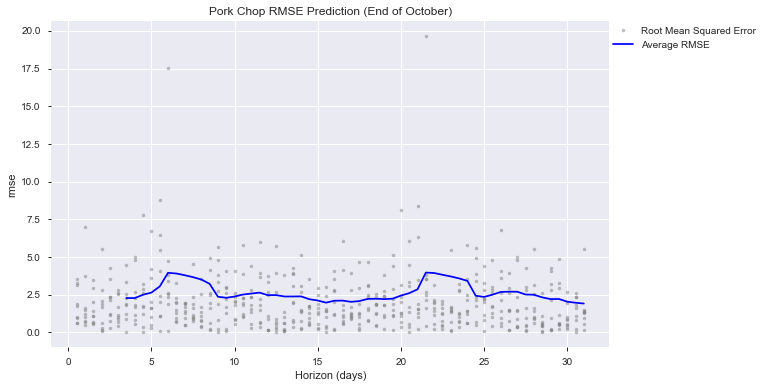

In [151]:
fig = plot_cross_validation_metric(pork_chop_cv, metric='rmse')
L = plt.legend(bbox_to_anchor=[1.28, 1.01])
plt.title('Pork Chop RMSE Prediction (End of October)')
L.get_texts()[0].set_text('Root Mean Squared Error')
L.get_texts()[1].set_text('Average RMSE');

### Let's add weather to the mix and see if there are any correlations!

In [152]:
pork_chop_weather = pd.merge(pork_chop, entree_weather, how='left')

In [153]:
pork_chop_weather.fillna(value=0, inplace=True)

In [154]:
len(pork_chop_weather)

395

In [155]:
pork_chop_weather.rename(columns={'Qty 7': 'Pork Chop'}, inplace=True)

In [156]:
pork_chop_weather.corr()

Pork Chop      Rain      Snow
Pork Chop   1.000000  0.046152 -0.054946
Rain        0.046152  1.000000  0.249830
Snow       -0.054946  0.249830  1.000000

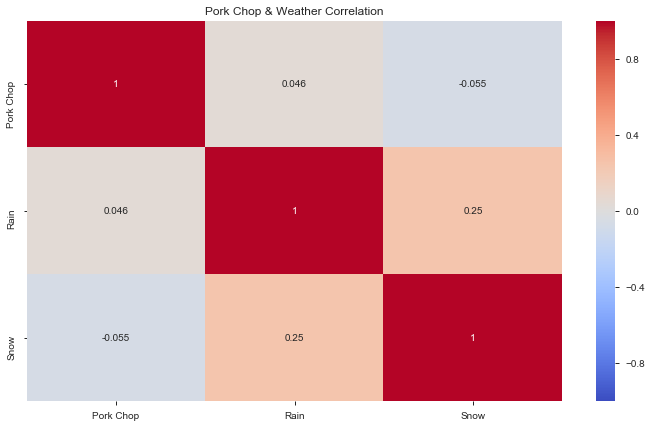

In [157]:
plt.figure(figsize=(12,7))
sns.heatmap(pork_chop_weather.corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True
           )
plt.title('Pork Chop & Weather Correlation');

## Entree 8 - Seafood Risotto

### First, let's plot the entree

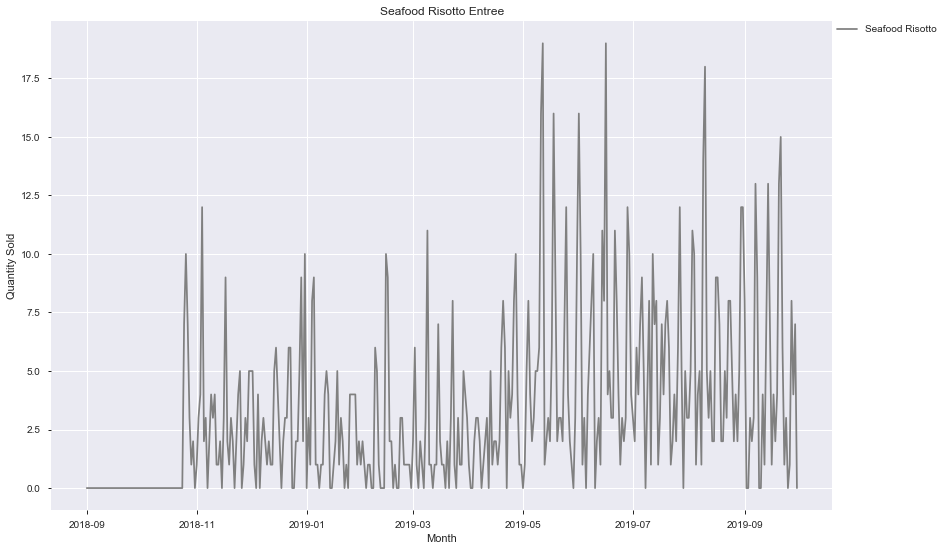

In [158]:
# Note this entree didn't appear on their menu until late october
plt.figure(figsize=(14,9))
plt.plot(seafood_risotto.Date, seafood_risotto['Qty 8'], color='gray')
plt.title('Seafood Risotto Entree')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.145, 1.01])
L.get_texts()[0].set_text('Seafood Risotto')

### Rename the columns

In [159]:
seafood_risotto_forecast = seafood_risotto.rename(columns={'Date': 'ds',
                                                           'Qty 8': 'y'})
seafood_risotto_forecast.tail()

ds  y
391 2019-09-26  1
392 2019-09-27  8
393 2019-09-28  4
394 2019-09-29  7
395 2019-09-30  0

In [160]:
Model_seafood_risotto = proph(interval_width=.75, weekly_seasonality=True, changepoint_prior_scale=1.5)
Model_seafood_risotto.add_seasonality(name='monthly', period=30.5, fourier_order=35)
Model_seafood_risotto.add_country_holidays(country_name='US')

In [161]:
Model_seafood_risotto.fit(seafood_risotto_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### Make future dates with a period of 31 so that we can predict to the end of October.

In [162]:
future_dates_seafood_risotto = Model_seafood_risotto.make_future_dataframe(periods=31, freq='D')

In [163]:
future_dates_seafood_risotto.tail()

ds
421 2019-10-27
422 2019-10-28
423 2019-10-29
424 2019-10-30
425 2019-10-31

In [164]:
forecast_seafood_risotto = Model_seafood_risotto.predict(future_dates_seafood_risotto)

In [165]:
forecast_seafood_risotto[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
421 2019-10-27  7.531894    5.172180   10.169380
422 2019-10-28  3.187173    0.471292    5.757850
423 2019-10-29  3.388844    0.677628    6.086245
424 2019-10-30  4.154281    1.544347    6.672548
425 2019-10-31  2.923765    0.626176    5.656800

### Plot the forecast.

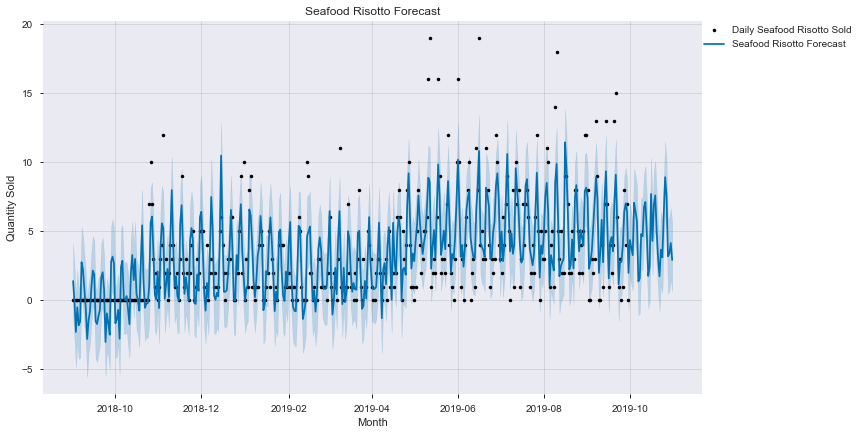

In [166]:
Model_seafood_risotto.plot(forecast_seafood_risotto, uncertainty=True)
L = plt.legend(bbox_to_anchor=[1.24, 1.01])
plt.title('Seafood Risotto Forecast')
L.get_texts()[0].set_text('Daily Seafood Risotto Sold')
L.get_texts()[1].set_text('Seafood Risotto Forecast')
plt.xlabel('Month')
plt.ylabel('Quantity Sold');

### Plot the Seafood Risotto Sold and Seafood Risotto Predictions

<Figure size 1440x1080 with 0 Axes>

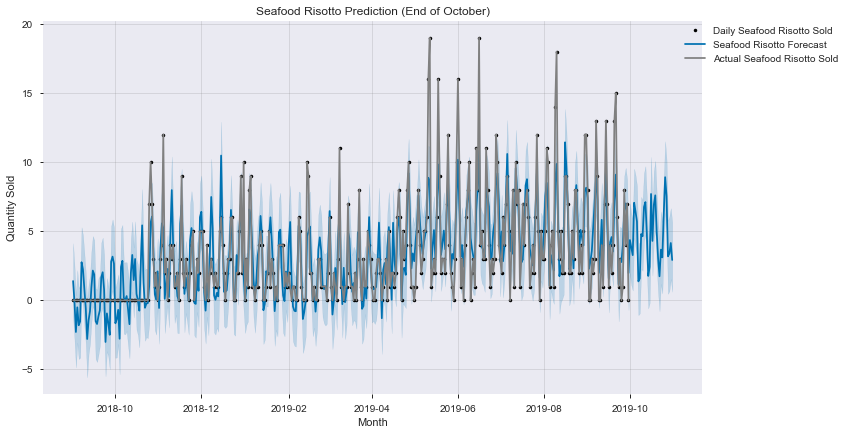

In [167]:
plt.figure(figsize=(20,15))
Model_seafood_risotto.plot(forecast_seafood_risotto, uncertainty=True)
plt.plot(seafood_risotto.Date, seafood_risotto['Qty 8'], color='gray')
plt.title('Seafood Risotto Prediction (End of October)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.22, 1.01])
L.get_texts()[0].set_text('Daily Seafood Risotto Sold')
L.get_texts()[1].set_text('Seafood Risotto Forecast')
L.get_texts()[2].set_text('Actual Seafood Risotto Sold');

### Plot the trends

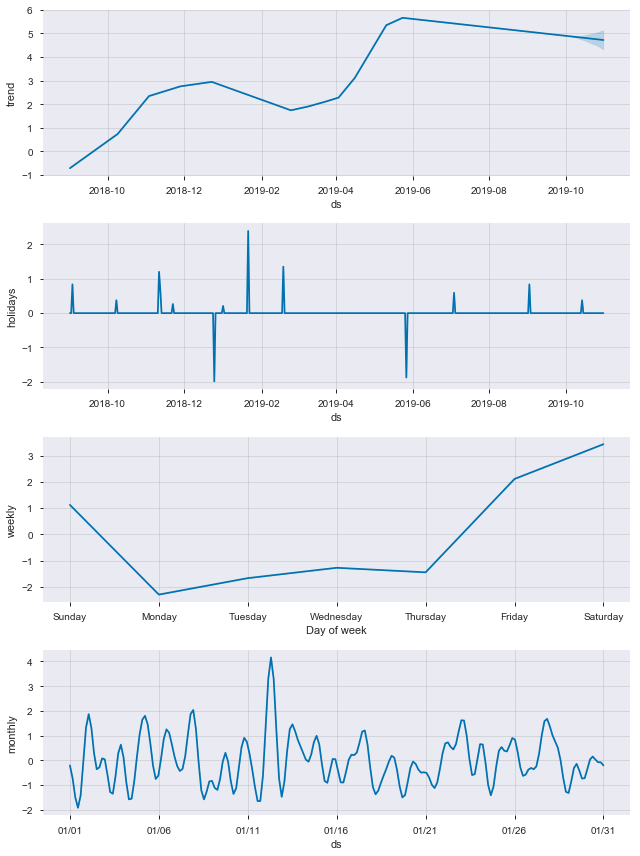

In [168]:
Model_seafood_risotto.plot_components(forecast_seafood_risotto);

### Let's include performance metrics

In [169]:
seafood_risotto_cv = cross_validation(Model_seafood_risotto, horizon='31 Days')
seafood_risotto_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2018-12-09 12:00:00 and 2019-08-30 00:00:00
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds       yhat  yhat_lower  yhat_upper   y              cutoff
0   2018-12-10  -0.864234   -1.616884   -0.124139   1 2018-12-09 12:00:00
1   2018-12-11  -0.305429   -1.123775    0.458737   2 2018-12-09 12:00:00
2   2018-12-12   0.178979   -0.658513    0.974447   1 2018-12-09 12:00:00
3   2018-12-13  -1.431017   -2.201214   -0.630396   1 2018-12-09 12:00:00
4   2018-12-14   0.650821   -0.188452    1.450561   5 2018-12-09 12:00:00
5   2018-12-15   2.673289    1.849321    3.453959   6 2018-12-09 12:00:00
6   2018-12-16   2.412871    1.611958    3.240763   4 2018-12-09 12:00:00
7   2018-12-17  -2.258904   -3.092390   -1.466706   2 2018-12-09 12:00:00
8   2018-12-18  -1.699942   -2.646583   -0.867431   0 2018-12-09 12:00:00
9   2018-12-19  -1.215501   -2.078157   -0.210707   2 2018-12-09 12:00:00
10  2018-12-20  -2.825511   -3.795617   -1.898996   3 2018-12-09 12:00:00
11  2018-12-21  -0.743703   -1.666509    0.260838   3 2018-12-09 12:00:00
12  2018-12-22   1.278743    0.212744    2.239790   6 2018-12-09 12:00:00
13  2018-12-23   1.018304   -0.227331    2.097845   6 2018-12-09 12:00:00
14  2018-12-24  -3.653492   -4.884090   -2.563223   0 2018-12-09 12:00:00
15  2018-12-25   3.905436    2.692706    5.084605   0 2018-12-09 12:00:00
16  2018-12-26   7.389882    6.054625    8.610556   2 2018-12-09 12:00:00
17  2018-12-27   2.779892    1.527621    4.071958   2 2018-12-09 12:00:00
18  2018-12-28   0.861728   -0.582079    2.242861   5 2018-12-09 12:00:00
19  2018-12-29   0.884176   -0.571188    2.311450   9 2018-12-09 12:00:00
20  2018-12-30   1.623676    0.035077    3.122043   2 2018-12-09 12:00:00
21  2018-12-31  -5.048276   -6.868360   -3.496929  10 2018-12-09 12:00:00
22  2019-01-01  -2.900624   -4.730165   -1.134708   0 2018-12-09 12:00:00
23  2019-01-02  -0.234906   -2.146887    1.573998   3 2018-12-09 12:00:00
24  2019-01-03  -1.617021   -3.506400    0.286415   1 2018-12-09 12:00:00
25  2019-01-04   5.997960    4.015845    8.091960   8 2018-12-09 12:00:00
26  2019-01-05   0.859178   -1.239464    2.871967   9 2018-12-09 12:00:00
27  2019-01-06   1.552997   -0.593449    3.809583   1 2018-12-09 12:00:00
28  2019-01-07  -4.201904   -6.549531   -1.925001   1 2018-12-09 12:00:00
29  2019-01-08  -3.273479   -5.611138   -0.815618   0 2018-12-09 12:00:00
30  2019-01-09  -0.573323   -3.125171    1.918932   1 2018-12-09 12:00:00
31  2018-12-26  12.342371   11.554969   13.190377   2 2018-12-25 00:00:00
32  2018-12-27   8.471370    7.705102    9.303794   2 2018-12-25 00:00:00
33  2018-12-28   6.657150    5.871280    7.467543   5 2018-12-25 00:00:00
34  2018-12-29   6.939213    6.042022    7.690543   9 2018-12-25 00:00:00
35  2018-12-30   7.534498    6.713389    8.339845   2 2018-12-25 00:00:00
36  2018-12-31   1.430843    0.642568    2.265235  10 2018-12-25 00:00:00
37  2019-01-01   3.643245    2.781347    4.548282   0 2018-12-25 00:00:00
38  2019-01-02   6.284591    5.459341    7.111946   3 2018-12-25 00:00:00
39  2019-01-03   5.698309    4.837568    6.594046   1 2018-12-25 00:00:00
40  2019-01-04  12.899338   12.079846   13.710325   8 2018-12-25 00:00:00
41  2019-01-05   8.060058    7.203632    8.926292   9 2018-12-25 00:00:00
42  2019-01-06   8.337279    7.495928    9.204163   1 2018-12-25 00:00:00
43  2019-01-07   2.964532    2.106451    3.792678   1 2018-12-25 00:00:00
44  2019-01-08   3.970687    3.167778    4.866467   0 2018-12-25 00:00:00
45  2019-01-09   6.603853    5.741431    7.481783   1 2018-12-25 00:00:00
46  2019-01-10   6.296299    5.433341    7.194490   1 2018-12-25 00:00:00
47  2019-01-11   9.293524    8.395463   10.142256   4 2018-12-25 00:00:00
48  2019-01-12   7.315586    6.500788    8.198472   5 2018-12-25 00:00:00
49  2019-01-13   7.172463    6.320040    8.119331   4 2018-12-25 00:00:00
50  2019-01-14   3.824050    2.934941    4.718573   0 2018-12-25 00:00:00
51  2019-01-15   2.854558    2.007375    3.705615   0 2018-12-25 00:00:00
52  2019-01-16   6.012089    5.211341    6.880155   1 2018-12-25 00:00:00
53  2019-01-17  

In [170]:
seafood_risotto_p = performance_metrics(seafood_risotto_cv)
seafood_risotto_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon        mse      rmse       mae  coverage
0   3 days 12:00:00  11.138497  3.337439  2.527377  0.406061
1   4 days 00:00:00  10.198588  3.193523  2.487426  0.406061
2   4 days 12:00:00  12.207151  3.493873  2.747787  0.393939
3   5 days 00:00:00  12.183127  3.490434  2.745475  0.391919
4   5 days 12:00:00  10.670829  3.266624  2.584953  0.442424
5   6 days 00:00:00   9.492271  3.080953  2.302661  0.563636
6   6 days 12:00:00   9.436163  3.071834  2.303294  0.537374
7   7 days 00:00:00   8.990248  2.998374  2.240028  0.551515
8   7 days 12:00:00   7.435318  2.726778  2.081196  0.555556
9   8 days 00:00:00   7.722503  2.778939  2.183388  0.519192
10  8 days 12:00:00   7.399656  2.720231  2.124490  0.503030
11  9 days 00:00:00   7.262346  2.694874  2.184901  0.468687
12  9 days 12:00:00   7.636010  2.763333  2.234744  0.496970
13 10 days 00:00:00   8.543419  2.922913  2.348682  0.462626
14 10 days 12:00:00   9.214563  3.035550  2.443836  0.464646
15 11 days 00:00:00  11.112494  3.333541  2.529970  0.460606
16 11 days 12:00:00  11.400237  3.376424  2.623350  0.446465
17 12 days 00:00:00  13.921339  3.731131  2.911627  0.391919
18 12 days 12:00:00  14.584367  3.818948  3.062587  0.337374
19 13 days 00:00:00  14.679725  3.831413  3.024380  0.367677
20 13 days 12:00:00  14.814377  3.848945  3.049302  0.337374
21 14 days 00:00:00  16.414307  4.051457  3.113742  0.351515
22 14 days 12:00:00  17.363472  4.166950  3.208400  0.317172
23 15 days 00:00:00  15.396976  3.923898  3.012089  0.331313
24 15 days 12:00:00  15.022125  3.875839  2.894797  0.385859
25 16 days 00:00:00  14.762752  3.842233  2.903063  0.389899
26 16 days 12:00:00  14.541303  3.813306  2.901928  0.387879
27 17 days 00:00:00  10.789349  3.284714  2.633653  0.426263
28 17 days 12:00:00   8.930044  2.988318  2.427922  0.458586
29 18 days 00:00:00   9.755037  3.123305  2.483422  0.460606
30 18 days 12:00:00  11.495626  3.390520  2.780763  0.391919
31 19 days 00:00:00  10.595973  3.255146  2.681420  0.389899
32 19 days 12:00:00  11.487399  3.389307  2.774394  0.369697
33 20 days 00:00:00  14.612899  3.822682  2.997684  0.339394
34 20 days 12:00:00  15.052850  3.879800  3.068269  0.317172
35 21 days 00:00:00  15.134966  3.890368  3.096483  0.351515
36 21 days 12:00:00  16.620139  4.076780  2.943999  0.420202
37 22 days 00:00:00  17.476040  4.180435  3.044653  0.408081
38 22 days 12:00:00  16.717208  4.088668  2.959063  0.422222
39 23 days 00:00:00  15.039423  3.878069  2.872206  0.426263
40 23 days 12:00:00  15.199192  3.898614  2.967195  0.387879
41 24 days 00:00:00  14.063191  3.750092  2.821814  0.391919
42 24 days 12:00:00  11.323062  3.364976  2.680690  0.410101
43 25 days 00:00:00  10.642488  3.262283  2.573779  0.442424
44 25 days 12:00:00  11.031204  3.321326  2.621458  0.442424
45 26 days 00:00:00  11.597115  3.405454  2.768054  0.389899
46 26 days 12:00:00  14.508168  3.808959  3.003035  0.402020
47 27 days 00:00:00  14.650968  3.827658  3.056998  0.391919
48 27 days 12:00:00  16.055989  4.006992  3.279708  0.321212
49 28 days 00:00:00  15.728421  3.965907  3.275033  0.319192
50 28 days 12:00:00  17.046588  4.128751  3.370620  0.315152
51 29 days 00:00:00  16.676565  4.083695  3.356908  0.292929
52 29 days 12:00:00  18.305258  4.278465  3.349587  0.313131
53 30 days 00:00:00  18.858614  4.342651  3.424608  0.298990
54 30 days 12:00:00  16.934392  4.115142  3.203510  0.349495
55 31 days 00:00:00  17.067763  4.131315  3.209601  0.355556

### Plot RMSE for future prediction

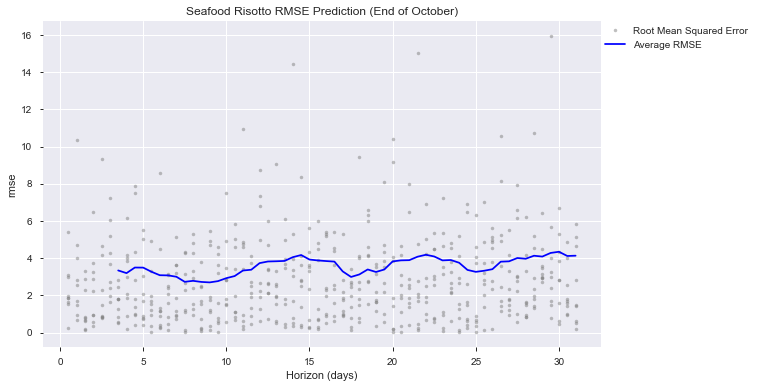

In [171]:
fig = plot_cross_validation_metric(seafood_risotto_cv, metric='rmse')
L = plt.legend(bbox_to_anchor=[1.28, 1.01])
plt.title('Seafood Risotto RMSE Prediction (End of October)')
L.get_texts()[0].set_text('Root Mean Squared Error')
L.get_texts()[1].set_text('Average RMSE');

### Let's add weather to the mix and see if there are any correlations!

In [172]:
seafood_risotto_weather = pd.merge(seafood_risotto, entree_weather, how='left')

In [173]:
seafood_risotto_weather.fillna(value=0, inplace=True)

In [174]:
len(seafood_risotto_weather)

395

In [175]:
seafood_risotto_weather.rename(columns={'Qty 8': 'Seafood Risotto'}, inplace=True)

In [176]:
seafood_risotto_weather.corr()

Seafood Risotto      Rain      Snow
Seafood Risotto         1.000000 -0.024403 -0.041892
Rain                   -0.024403  1.000000  0.249830
Snow                   -0.041892  0.249830  1.000000

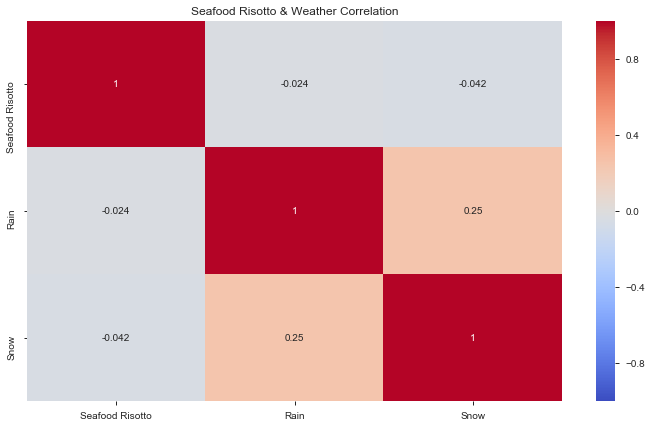

In [177]:
plt.figure(figsize=(12,7))
sns.heatmap(seafood_risotto_weather.corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True
           )
plt.title('Seafood Risotto & Weather Correlation');

## Entree 9 - Thai Veggies

### First, let's plot the entree

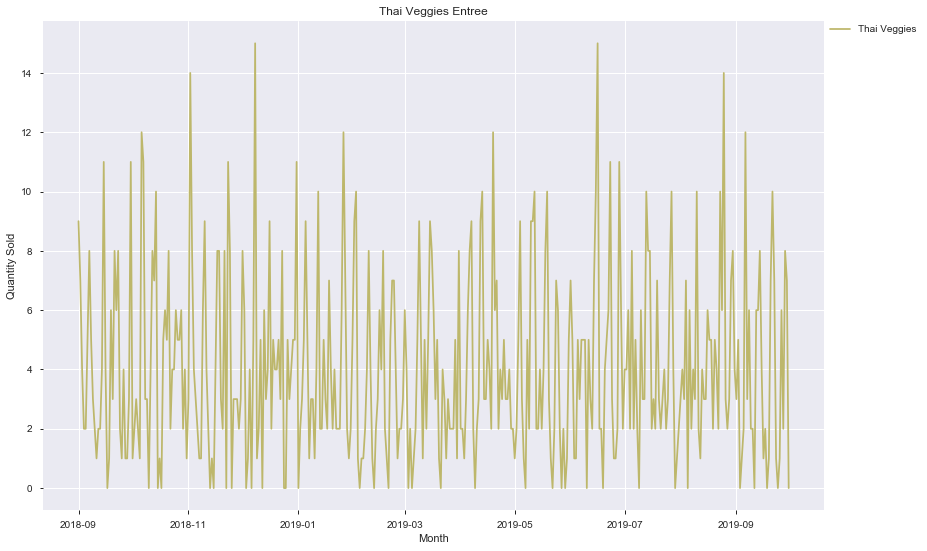

In [178]:
plt.figure(figsize=(14,9))
plt.plot(thai_veg.Date, thai_veg['Qty 9'], color='darkkhaki')
plt.title('Thai Veggies Entree')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.13, 1.01])
L.get_texts()[0].set_text('Thai Veggies')

### Rename the columns

In [179]:
thai_veg_forecast = thai_veg.rename(columns={'Date': 'ds',
                                             'Qty 9': 'y'})
thai_veg_forecast.tail()

ds  y
391 2019-09-26  6
392 2019-09-27  2
393 2019-09-28  8
394 2019-09-29  7
395 2019-09-30  0

In [180]:
Model_thai_veg = proph(interval_width=.75, weekly_seasonality=True, changepoint_prior_scale=1.5)
Model_thai_veg.add_seasonality(name='monthly', period=30.5, fourier_order=35)
Model_thai_veg.add_country_holidays(country_name='US')

In [181]:
Model_thai_veg.fit(thai_veg_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### Make future dates with a period of 31 so that we can predict to the end of October.

In [182]:
future_dates_thai_veg = Model_thai_veg.make_future_dataframe(periods=31, freq='D')

In [183]:
future_dates_thai_veg.tail()

ds
421 2019-10-27
422 2019-10-28
423 2019-10-29
424 2019-10-30
425 2019-10-31

In [184]:
forecast_thai_veg = Model_thai_veg.predict(future_dates_thai_veg)

In [185]:
forecast_thai_veg[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
421 2019-10-27  4.930525    2.452901    7.497803
422 2019-10-28  2.234231   -0.516783    4.816870
423 2019-10-29  2.361910   -0.074224    4.872117
424 2019-10-30  1.674622   -0.807716    4.408468
425 2019-10-31  2.586999    0.144810    5.106941

### Plot the forecast.

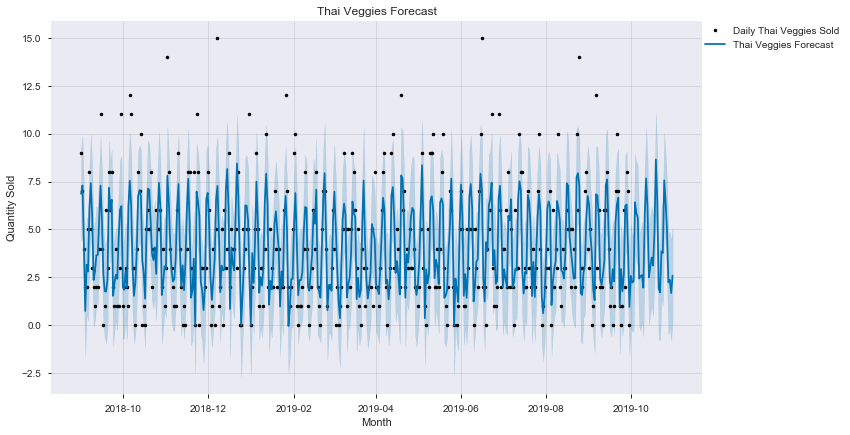

In [186]:
Model_thai_veg.plot(forecast_thai_veg, uncertainty=True)
L = plt.legend(bbox_to_anchor=[1.225, 1.01])
plt.title('Thai Veggies Forecast')
L.get_texts()[0].set_text('Daily Thai Veggies Sold')
L.get_texts()[1].set_text('Thai Veggies Forecast')
plt.xlabel('Month')
plt.ylabel('Quantity Sold');

### Plot the Thai Veggies Sold and Thai Veggies Predictions

<Figure size 1440x1080 with 0 Axes>

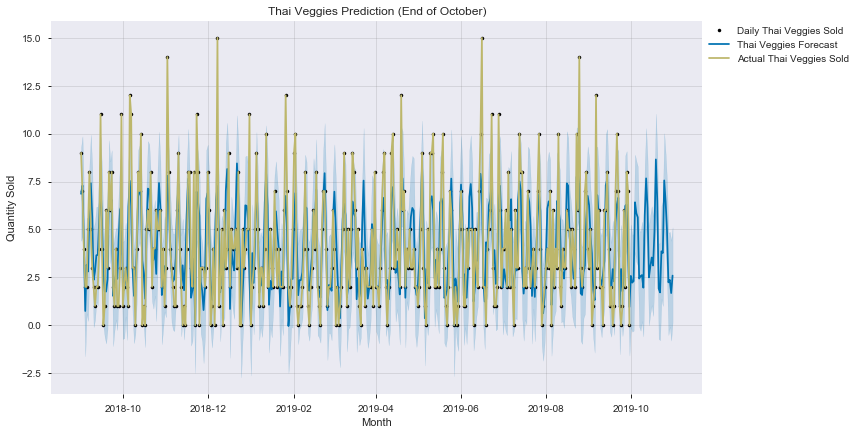

In [187]:
plt.figure(figsize=(20,15))
Model_thai_veg.plot(forecast_thai_veg, uncertainty=True)
plt.plot(thai_veg.Date, thai_veg['Qty 9'], color='darkkhaki')
plt.title('Thai Veggies Prediction (End of October)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.24, 1.01])
L.get_texts()[0].set_text('Daily Thai Veggies Sold')
L.get_texts()[1].set_text('Thai Veggies Forecast')
L.get_texts()[2].set_text('Actual Thai Veggies Sold');

### Plot the trends

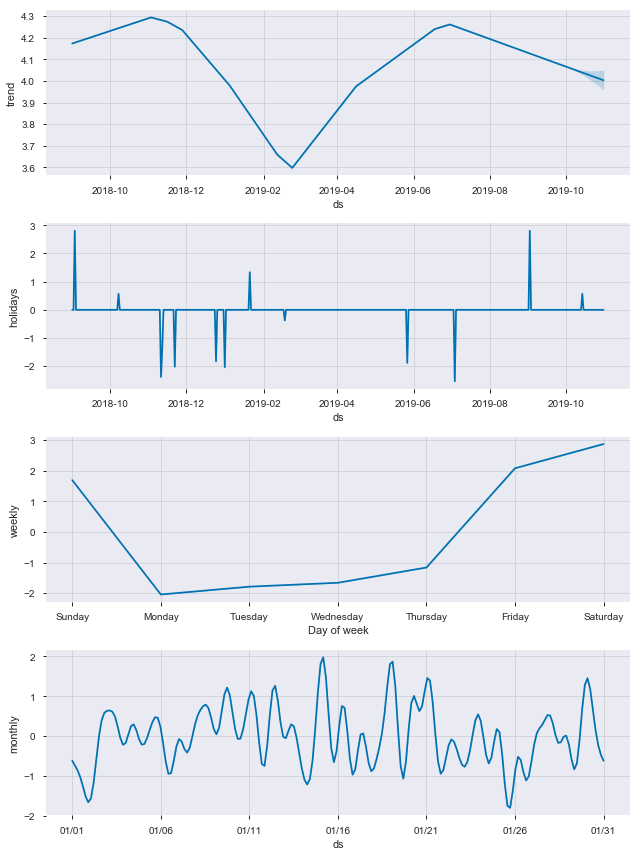

In [188]:
Model_thai_veg.plot_components(forecast_thai_veg);

### Let's include performance metrics

In [189]:
thai_veg_cv = cross_validation(Model_thai_veg, horizon='31 Days')
thai_veg_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2018-12-09 12:00:00 and 2019-08-30 00:00:00
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds       yhat  yhat_lower  yhat_upper   y              cutoff
0   2018-12-10  -4.703858   -6.256926   -3.195638   2 2018-12-09 12:00:00
1   2018-12-11  -0.350750   -1.921801    1.203513   5 2018-12-09 12:00:00
2   2018-12-12   3.478500    1.984064    5.002127   0 2018-12-09 12:00:00
3   2018-12-13  -3.841584   -5.400882   -2.404528   6 2018-12-09 12:00:00
4   2018-12-14   5.589093    4.042426    7.150173   3 2018-12-09 12:00:00
5   2018-12-15   2.375998    0.799050    3.781807   4 2018-12-09 12:00:00
6   2018-12-16  -1.484875   -2.863185    0.189151   9 2018-12-09 12:00:00
7   2018-12-17  -6.767766   -8.328561   -5.229528   2 2018-12-09 12:00:00
8   2018-12-18  -1.402999   -2.865541    0.170110   5 2018-12-09 12:00:00
9   2018-12-19  -0.539806   -2.122437    1.050459   4 2018-12-09 12:00:00
10  2018-12-20  -7.826264   -9.424503   -6.202242   4 2018-12-09 12:00:00
11  2018-12-21   1.638044   -0.075250    3.209666   5 2018-12-09 12:00:00
12  2018-12-22   2.458568    0.867021    4.196207   3 2018-12-09 12:00:00
13  2018-12-23  -0.343210   -2.072911    1.398458   8 2018-12-09 12:00:00
14  2018-12-24  -4.567003   -6.242914   -2.841272   0 2018-12-09 12:00:00
15  2018-12-25  -2.143128   -3.851252   -0.307869   0 2018-12-09 12:00:00
16  2018-12-26  -3.195198   -4.929246   -1.239301   5 2018-12-09 12:00:00
17  2018-12-27  -9.396941  -11.277743   -7.480112   3 2018-12-09 12:00:00
18  2018-12-28  -1.847912   -3.830309    0.145455   4 2018-12-09 12:00:00
19  2018-12-29   1.116157   -0.923464    3.179459   5 2018-12-09 12:00:00
20  2018-12-30  -1.578871   -3.809576    0.633968   5 2018-12-09 12:00:00
21  2018-12-31  -8.695842  -10.960818   -6.434941  11 2018-12-09 12:00:00
22  2019-01-01  -5.655438   -7.954411   -3.346923   0 2018-12-09 12:00:00
23  2019-01-02   2.174169   -0.243681    4.445526   2 2018-12-09 12:00:00
24  2019-01-03  -7.091740   -9.513159   -4.577526   3 2018-12-09 12:00:00
25  2019-01-04  -3.688663   -6.241991   -1.130760   5 2018-12-09 12:00:00
26  2019-01-05   0.735790   -1.916106    3.327289   9 2018-12-09 12:00:00
27  2019-01-06  -2.675432   -5.556861   -0.034011   5 2018-12-09 12:00:00
28  2019-01-07  -5.770344   -8.740892   -2.975041   1 2018-12-09 12:00:00
29  2019-01-08  -9.720232  -12.714775   -6.782081   3 2018-12-09 12:00:00
30  2019-01-09  -4.818040   -7.907107   -1.748604   3 2018-12-09 12:00:00
31  2018-12-26   2.384222    0.613970    4.287219   5 2018-12-25 00:00:00
32  2018-12-27  -0.707646   -2.363729    1.349176   3 2018-12-25 00:00:00
33  2018-12-28   4.078346    2.171537    5.977448   4 2018-12-25 00:00:00
34  2018-12-29   7.043661    5.174734    8.893441   5 2018-12-25 00:00:00
35  2018-12-30   6.709601    4.962301    8.710278   5 2018-12-25 00:00:00
36  2018-12-31  -0.265484   -1.986721    1.720921  11 2018-12-25 00:00:00
37  2019-01-01   2.760474    0.897705    4.643038   0 2018-12-25 00:00:00
38  2019-01-02   7.589302    5.674100    9.471587   2 2018-12-25 00:00:00
39  2019-01-03   2.259053    0.392948    4.227539   3 2018-12-25 00:00:00
40  2019-01-04   3.059268    1.240103    4.849449   5 2018-12-25 00:00:00
41  2019-01-05   7.517080    5.679230    9.349547   9 2018-12-25 00:00:00
42  2019-01-06   6.247623    4.280316    8.203309   5 2018-12-25 00:00:00
43  2019-01-07   2.480147    0.576987    4.445532   1 2018-12-25 00:00:00
44  2019-01-08  -0.416316   -2.468145    1.608283   3 2018-12-25 00:00:00
45  2019-01-09   1.415140   -0.387925    3.131213   3 2018-12-25 00:00:00
46  2019-01-10   2.789389    0.948734    4.724846   1 2018-12-25 00:00:00
47  2019-01-11   2.750073    1.069463    4.620265   4 2018-12-25 00:00:00
48  2019-01-12   6.704065    4.767708    8.589525  10 2018-12-25 00:00:00
49  2019-01-13   3.586053    1.782381    5.558836   2 2018-12-25 00:00:00
50  2019-01-14   0.323273   -1.428400    2.148782   2 2018-12-25 00:00:00
51  2019-01-15   1.931477    0.077472    3.717774   5 2018-12-25 00:00:00
52  2019-01-16   0.764983   -1.112514    2.560419   3 2018-12-25 00:00:00
53  2019-01-17  

In [190]:
thai_veg_p = performance_metrics(thai_veg_cv)
thai_veg_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon        mse      rmse       mae  coverage
0   3 days 12:00:00  10.699809  3.271056  2.373024  0.567677
1   4 days 00:00:00  11.082324  3.329013  2.438625  0.555556
2   4 days 12:00:00  10.626071  3.259765  2.350476  0.557576
3   5 days 00:00:00  10.753289  3.279221  2.332782  0.591919
4   5 days 12:00:00   8.829816  2.971501  2.202482  0.589899
5   6 days 00:00:00  10.664766  3.265695  2.384168  0.577778
6   6 days 12:00:00  11.401844  3.376662  2.500122  0.571717
7   7 days 00:00:00  12.070507  3.474264  2.656282  0.517172
8   7 days 12:00:00  13.038777  3.610925  2.700013  0.557576
9   8 days 00:00:00  13.490467  3.672937  2.814045  0.523232
10  8 days 12:00:00  13.291274  3.645720  2.776901  0.553535
11  9 days 00:00:00  11.045687  3.323505  2.565790  0.557576
12  9 days 12:00:00  10.015032  3.164654  2.468244  0.553535
13 10 days 00:00:00   8.937784  2.989613  2.311586  0.602020
14 10 days 12:00:00  12.643619  3.555787  2.700867  0.543434
15 11 days 00:00:00  11.856596  3.443341  2.595250  0.555556
16 11 days 12:00:00  11.883784  3.447286  2.628608  0.539394
17 12 days 00:00:00  12.759108  3.571989  2.779449  0.503030
18 12 days 12:00:00  11.578483  3.402717  2.581855  0.553535
19 13 days 00:00:00  12.746997  3.570294  2.729954  0.517172
20 13 days 12:00:00  10.039645  3.168540  2.475037  0.535354
21 14 days 00:00:00   9.503659  3.082800  2.431426  0.539394
22 14 days 12:00:00  11.017633  3.319282  2.666165  0.482828
23 15 days 00:00:00  10.098581  3.177826  2.481311  0.517172
24 15 days 12:00:00  10.312994  3.211385  2.584622  0.468687
25 16 days 00:00:00   9.558378  3.091663  2.512821  0.494949
26 16 days 12:00:00   8.964171  2.994023  2.408377  0.501010
27 17 days 00:00:00   8.493658  2.914388  2.344601  0.539394
28 17 days 12:00:00   9.481987  3.079283  2.237065  0.585859
29 18 days 00:00:00  12.205954  3.493702  2.513643  0.557576
30 18 days 12:00:00  13.004858  3.606225  2.598111  0.589899
31 19 days 00:00:00  12.672241  3.559809  2.516968  0.626263
32 19 days 12:00:00  12.732423  3.568252  2.596157  0.610101
33 20 days 00:00:00  12.725800  3.567324  2.611063  0.597980
34 20 days 12:00:00  11.697962  3.420228  2.577594  0.610101
35 21 days 00:00:00   9.797809  3.130145  2.485091  0.608081
36 21 days 12:00:00  15.930406  3.991291  2.716691  0.593939
37 22 days 00:00:00  16.234596  4.029218  2.789899  0.557576
38 22 days 12:00:00  17.206709  4.148097  2.970959  0.517172
39 23 days 00:00:00  16.677668  4.083830  2.818103  0.559596
40 23 days 12:00:00  15.723625  3.965303  2.712020  0.539394
41 24 days 00:00:00  14.670097  3.830156  2.552128  0.571717
42 24 days 12:00:00   9.919313  3.149494  2.354999  0.555556
43 25 days 00:00:00   9.357704  3.059036  2.337733  0.553535
44 25 days 12:00:00   9.715056  3.116898  2.310956  0.567677
45 26 days 00:00:00  12.159889  3.487103  2.665371  0.490909
46 26 days 12:00:00  13.515656  3.676365  2.840442  0.464646
47 27 days 00:00:00  13.877155  3.725205  2.887738  0.466667
48 27 days 12:00:00  14.045661  3.747754  3.020438  0.444444
49 28 days 00:00:00  13.696648  3.700898  2.956049  0.444444
50 28 days 12:00:00  14.371246  3.790943  3.033974  0.442424
51 29 days 00:00:00  12.189339  3.491323  2.743410  0.480808
52 29 days 12:00:00  13.563077  3.682808  2.798326  0.517172
53 30 days 00:00:00  14.566574  3.816618  2.981019  0.448485
54 30 days 12:00:00  13.955875  3.735756  2.825236  0.496970
55 31 days 00:00:00  13.527706  3.678003  2.785904  0.517172

### Plot RMSE for future prediction

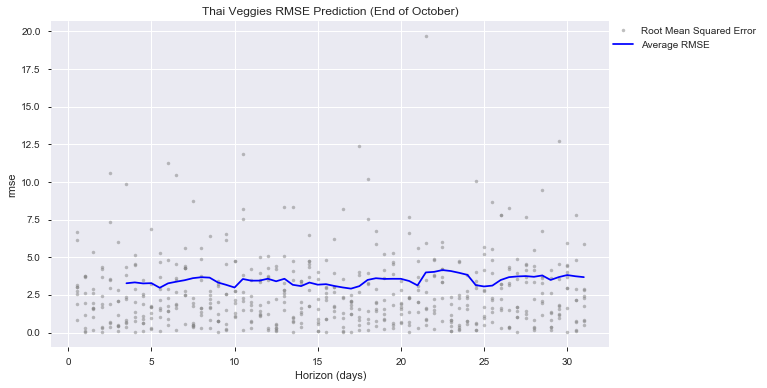

In [191]:
fig = plot_cross_validation_metric(thai_veg_cv, metric='rmse')
L = plt.legend(bbox_to_anchor=[1.28, 1.01])
plt.title('Thai Veggies RMSE Prediction (End of October)')
L.get_texts()[0].set_text('Root Mean Squared Error')
L.get_texts()[1].set_text('Average RMSE');

### Let's add weather to the mix and see if there are any correlations!

In [192]:
thai_veg_weather = pd.merge(thai_veg, entree_weather, how='left')

In [193]:
thai_veg_weather.fillna(value=0, inplace=True)

In [194]:
len(thai_veg_weather)

395

In [195]:
thai_veg_weather.rename(columns={'Qty 9': 'Thai Veggies'}, inplace=True)

In [196]:
thai_veg_weather.corr()

Thai Veggies      Rain      Snow
Thai Veggies      1.000000 -0.042927 -0.030498
Rain             -0.042927  1.000000  0.249830
Snow             -0.030498  0.249830  1.000000

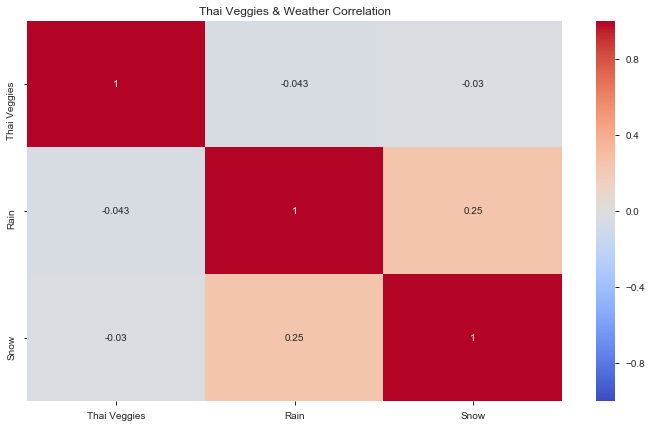

In [197]:
plt.figure(figsize=(12,7))
sns.heatmap(thai_veg_weather.corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True
           )
plt.title('Thai Veggies & Weather Correlation');

## Entree 10 - Crab Cakes

### First, let's plot the entree

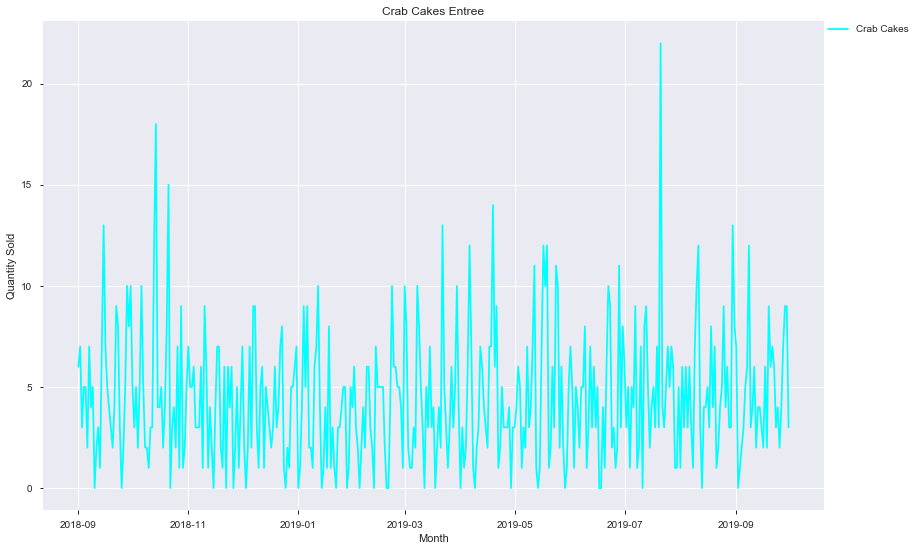

In [198]:
plt.figure(figsize=(14,9))
plt.plot(crab_cakes.Date, crab_cakes['Qty 10'], color='cyan')
plt.title('Crab Cakes Entree')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.12, 1.01])
L.get_texts()[0].set_text('Crab Cakes')

### Rename the columns

In [199]:
crab_cakes_forecast = crab_cakes.rename(columns={'Date': 'ds',
                                                 'Qty 10': 'y'})
crab_cakes_forecast.tail()

ds  y
391 2019-09-26  4
392 2019-09-27  7
393 2019-09-28  9
394 2019-09-29  9
395 2019-09-30  3

In [200]:
Model_crab_cakes = proph(interval_width=.75, weekly_seasonality=True, changepoint_prior_scale=1.5)
Model_crab_cakes.add_seasonality(name='monthly', period=30.5, fourier_order=35)
Model_crab_cakes.add_country_holidays(country_name='US')

In [201]:
Model_crab_cakes.fit(crab_cakes_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### Make future dates with a period of 31 so that we can predict to the end of October.

In [202]:
future_dates_crab_cakes = Model_crab_cakes.make_future_dataframe(periods=31, freq='D')

In [203]:
future_dates_crab_cakes.tail()

ds
421 2019-10-27
422 2019-10-28
423 2019-10-29
424 2019-10-30
425 2019-10-31

In [204]:
forecast_crab_cakes = Model_crab_cakes.predict(future_dates_crab_cakes)

In [205]:
forecast_crab_cakes[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
421 2019-10-27  7.538108    4.755803   10.127554
422 2019-10-28  1.874679   -0.849068    4.469060
423 2019-10-29  2.359696   -0.287294    5.070335
424 2019-10-30  5.140023    2.513199    7.771945
425 2019-10-31  4.710140    2.048455    7.301813

### Plot the forecast.

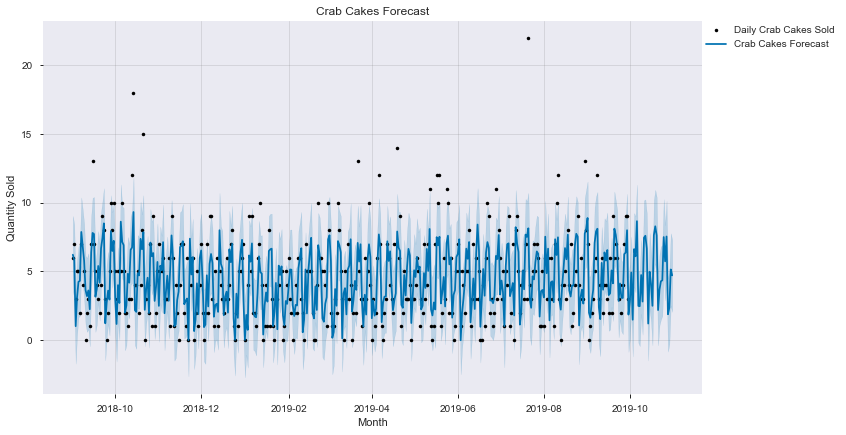

In [206]:
Model_crab_cakes.plot(forecast_crab_cakes, uncertainty=True)
L = plt.legend(bbox_to_anchor=[1.215, 1.01])
plt.title('Crab Cakes Forecast')
L.get_texts()[0].set_text('Daily Crab Cakes Sold')
L.get_texts()[1].set_text('Crab Cakes Forecast')
plt.xlabel('Month')
plt.ylabel('Quantity Sold');

### Plot the Crab Cakes Sold and Crab Cakes Predictions

<Figure size 1440x1080 with 0 Axes>

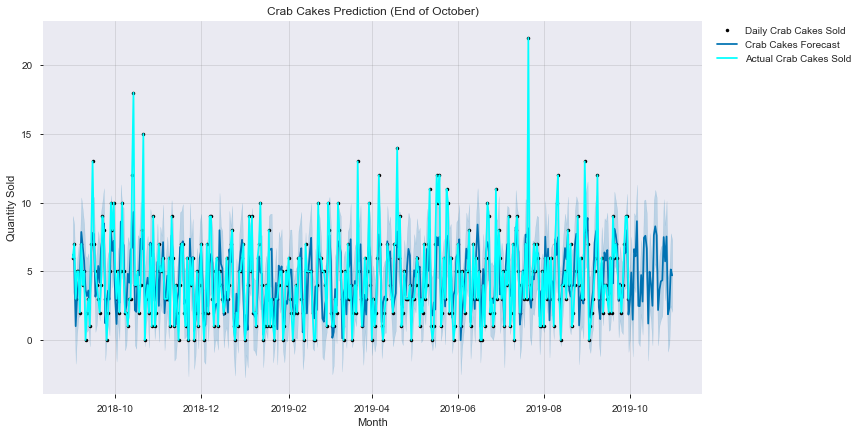

In [207]:
plt.figure(figsize=(20,15))
Model_crab_cakes.plot(forecast_crab_cakes, uncertainty=True)
plt.plot(crab_cakes.Date, crab_cakes['Qty 10'], color='cyan')
plt.title('Crab Cakes Prediction (End of October)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.24, 1.01])
L.get_texts()[0].set_text('Daily Crab Cakes Sold')
L.get_texts()[1].set_text('Crab Cakes Forecast')
L.get_texts()[2].set_text('Actual Crab Cakes Sold');

### Plot the trends

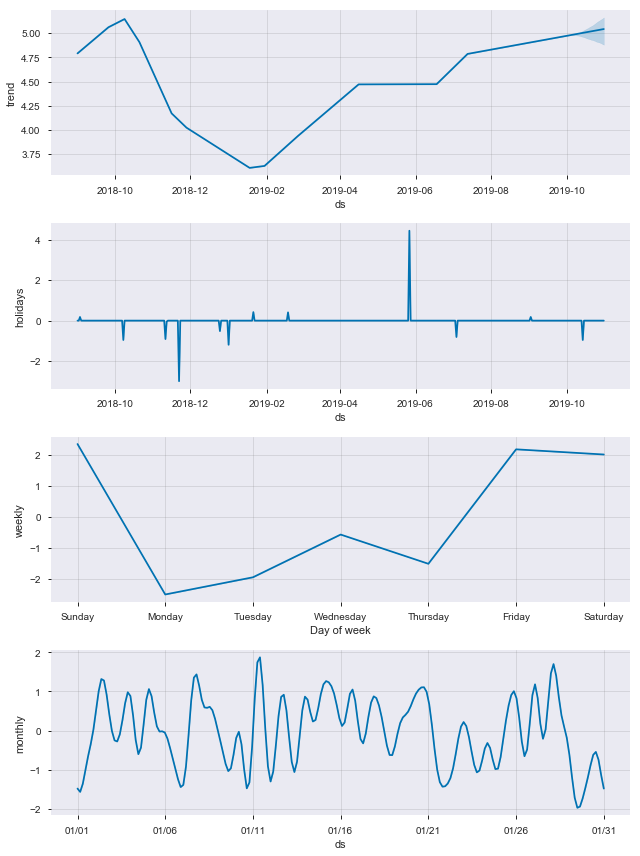

In [208]:
Model_crab_cakes.plot_components(forecast_crab_cakes);

### Let's include performance metrics

In [209]:
crab_cakes_cv = cross_validation(Model_crab_cakes, horizon='31 Days')
crab_cakes_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2018-12-09 12:00:00 and 2019-08-30 00:00:00
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds       yhat  yhat_lower  yhat_upper   y              cutoff
0   2018-12-10  -0.867435   -2.407926    0.535443   1 2018-12-09 12:00:00
1   2018-12-11   3.795669    2.350524    5.306418   5 2018-12-09 12:00:00
2   2018-12-12   2.002841    0.399660    3.439357   6 2018-12-09 12:00:00
3   2018-12-13   7.594467    5.941106    9.040496   1 2018-12-09 12:00:00
4   2018-12-14  16.815630   15.346572   18.320500   5 2018-12-09 12:00:00
5   2018-12-15   9.155478    7.633848   10.694212   4 2018-12-09 12:00:00
6   2018-12-16   7.411642    6.060125    8.836496   3 2018-12-09 12:00:00
7   2018-12-17   4.193385    2.733714    5.727557   2 2018-12-09 12:00:00
8   2018-12-18   3.856503    2.432751    5.318345   3 2018-12-09 12:00:00
9   2018-12-19   4.063673    2.520365    5.519064   6 2018-12-09 12:00:00
10  2018-12-20   4.655308    3.242364    6.153543   3 2018-12-09 12:00:00
11  2018-12-21  14.876456   13.271337   16.431019   4 2018-12-09 12:00:00
12  2018-12-22   6.216289    4.695352    7.722599   7 2018-12-09 12:00:00
13  2018-12-23   7.472442    5.922088    8.932209   8 2018-12-09 12:00:00
14  2018-12-24   4.254191    2.751476    5.816733   1 2018-12-09 12:00:00
15  2018-12-25   4.917320    3.420872    6.357300   0 2018-12-09 12:00:00
16  2018-12-26   8.124489    6.636434    9.630064   2 2018-12-09 12:00:00
17  2018-12-27  -1.283861   -2.837605    0.175591   1 2018-12-09 12:00:00
18  2018-12-28   9.937265    8.363907   11.540515   5 2018-12-09 12:00:00
19  2018-12-29   8.277059    6.793213    9.877516   5 2018-12-09 12:00:00
20  2018-12-30   7.533214    5.923794    9.106076   6 2018-12-09 12:00:00
21  2018-12-31   6.314973    4.607057    7.906969   7 2018-12-09 12:00:00
22  2019-01-01   8.964543    7.241361   10.657115   0 2018-12-09 12:00:00
23  2019-01-02   8.104795    6.315042    9.803140   1 2018-12-09 12:00:00
24  2019-01-03   3.783971    1.971798    5.455726   4 2018-12-09 12:00:00
25  2019-01-04   9.358920    7.649362   11.122689   9 2018-12-09 12:00:00
26  2019-01-05  11.910391   10.194726   13.776177   5 2018-12-09 12:00:00
27  2019-01-06   9.818897    8.040296   11.489702   9 2018-12-09 12:00:00
28  2019-01-07   7.023809    5.253225    8.728336   2 2018-12-09 12:00:00
29  2019-01-08   7.802476    5.892811    9.685858   2 2018-12-09 12:00:00
30  2019-01-09   5.440055    3.779539    7.308686   1 2018-12-09 12:00:00
31  2018-12-26   6.637026    4.943157    8.388494   2 2018-12-25 00:00:00
32  2018-12-27  -4.798994   -6.635704   -3.028004   1 2018-12-25 00:00:00
33  2018-12-28   4.662897    2.818454    6.548915   5 2018-12-25 00:00:00
34  2018-12-29   5.174625    3.313528    6.887311   5 2018-12-25 00:00:00
35  2018-12-30   4.657910    2.855233    6.527579   6 2018-12-25 00:00:00
36  2018-12-31   3.478535    1.808434    5.219660   7 2018-12-25 00:00:00
37  2019-01-01   6.039245    4.180243    7.751632   0 2018-12-25 00:00:00
38  2019-01-02   5.123745    3.378490    7.078623   1 2018-12-25 00:00:00
39  2019-01-03  -0.190875   -1.921492    1.640775   4 2018-12-25 00:00:00
40  2019-01-04   3.868361    2.050161    5.717799   9 2018-12-25 00:00:00
41  2019-01-05   8.651723    6.950602   10.391439   5 2018-12-25 00:00:00
42  2019-01-06   6.886509    5.084051    8.676796   9 2018-12-25 00:00:00
43  2019-01-07   4.564450    2.600186    6.497606   2 2018-12-25 00:00:00
44  2019-01-08   4.487239    2.580681    6.248742   2 2018-12-25 00:00:00
45  2019-01-09   2.071736    0.263618    3.894800   1 2018-12-25 00:00:00
46  2019-01-10   2.252379    0.457816    4.011361   6 2018-12-25 00:00:00
47  2019-01-11   1.744685   -0.144028    3.510315   7 2018-12-25 00:00:00
48  2019-01-12   6.798501    4.878413    8.647120  10 2018-12-25 00:00:00
49  2019-01-13   6.847808    5.031358    8.648483   4 2018-12-25 00:00:00
50  2019-01-14   4.036299    2.039854    5.816756   0 2018-12-25 00:00:00
51  2019-01-15   5.969628    4.077710    8.076957   1 2018-12-25 00:00:00
52  2019-01-16   4.564667    2.583637    6.356765   4 2018-12-25 00:00:00
53  2019-01-17  

In [210]:
crab_cakes_p = performance_metrics(crab_cakes_cv)
crab_cakes_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon        mse      rmse       mae  coverage
0   3 days 12:00:00  10.923634  3.305092  2.736303  0.501010
1   4 days 00:00:00  10.214353  3.195990  2.626743  0.535354
2   4 days 12:00:00  12.179558  3.489922  2.788680  0.482828
3   5 days 00:00:00  10.926910  3.305588  2.539939  0.571717
4   5 days 12:00:00  11.768209  3.430482  2.669706  0.551515
5   6 days 00:00:00  11.840925  3.441065  2.678718  0.539394
6   6 days 12:00:00  17.253834  4.153773  2.966824  0.537374
7   7 days 00:00:00  18.003873  4.243097  3.072260  0.503030
8   7 days 12:00:00  15.030052  3.876861  2.779701  0.567677
9   8 days 00:00:00  15.384211  3.922271  2.910398  0.527273
10  8 days 12:00:00  13.648577  3.694398  2.642349  0.585859
11  9 days 00:00:00  13.697834  3.701059  2.705301  0.555556
12  9 days 12:00:00   9.825649  3.134589  2.566471  0.501010
13 10 days 00:00:00   8.051234  2.837470  2.339644  0.535354
14 10 days 12:00:00   9.345099  3.056975  2.510335  0.484848
15 11 days 00:00:00   9.799997  3.130495  2.595518  0.448485
16 11 days 12:00:00  12.160921  3.487251  2.819818  0.393939
17 12 days 00:00:00  11.732257  3.425238  2.666388  0.424242
18 12 days 12:00:00  10.919126  3.304410  2.581524  0.458586
19 13 days 00:00:00  10.375332  3.221076  2.529690  0.484848
20 13 days 12:00:00   9.257383  3.042595  2.363615  0.533333
21 14 days 00:00:00   9.438828  3.072268  2.411747  0.498990
22 14 days 12:00:00   8.017445  2.831509  2.264156  0.533333
23 15 days 00:00:00   7.287650  2.699565  2.188448  0.555556
24 15 days 12:00:00   7.609592  2.758549  2.273100  0.553535
25 16 days 00:00:00   8.229009  2.868625  2.394375  0.523232
26 16 days 12:00:00   9.673206  3.110178  2.586374  0.503030
27 17 days 00:00:00  10.643437  3.262428  2.657455  0.531313
28 17 days 12:00:00   9.946464  3.153801  2.583960  0.537374
29 18 days 00:00:00  11.158890  3.340492  2.817206  0.484848
30 18 days 12:00:00  11.506219  3.392082  2.816110  0.498990
31 19 days 00:00:00  11.484421  3.388867  2.795078  0.501010
32 19 days 12:00:00  11.081615  3.328906  2.781984  0.482828
33 20 days 00:00:00  10.492742  3.239250  2.759532  0.444444
34 20 days 12:00:00   9.599217  3.098260  2.571537  0.519192
35 21 days 00:00:00  10.187648  3.191810  2.683800  0.496970
36 21 days 12:00:00   9.231862  3.038398  2.567503  0.519192
37 22 days 00:00:00  14.806628  3.847938  2.842368  0.501010
38 22 days 12:00:00  16.067648  4.008447  2.945302  0.480808
39 23 days 00:00:00  14.745737  3.840018  2.733152  0.585859
40 23 days 12:00:00  16.090255  4.011266  2.960570  0.545455
41 24 days 00:00:00  14.757757  3.841583  2.703716  0.622222
42 24 days 12:00:00  15.066674  3.881581  2.750257  0.593939
43 25 days 00:00:00  11.697801  3.420205  2.647143  0.589899
44 25 days 12:00:00   8.956687  2.992773  2.259333  0.678788
45 26 days 00:00:00  10.019849  3.165414  2.432445  0.634343
46 26 days 12:00:00  11.078486  3.328436  2.620836  0.575758
47 27 days 00:00:00  11.335303  3.366794  2.691729  0.505051
48 27 days 12:00:00  11.176848  3.343179  2.654665  0.517172
49 28 days 00:00:00  10.110967  3.179775  2.571030  0.535354
50 28 days 12:00:00  10.386188  3.222761  2.690936  0.525253
51 29 days 00:00:00   9.649712  3.106399  2.595598  0.537374
52 29 days 12:00:00   9.090602  3.015062  2.522945  0.533333
53 30 days 00:00:00   9.209945  3.034789  2.475358  0.587879
54 30 days 12:00:00   8.655603  2.942041  2.385800  0.591919
55 31 days 00:00:00   8.751962  2.958372  2.433882  0.573737

### Plot RMSE for future prediction

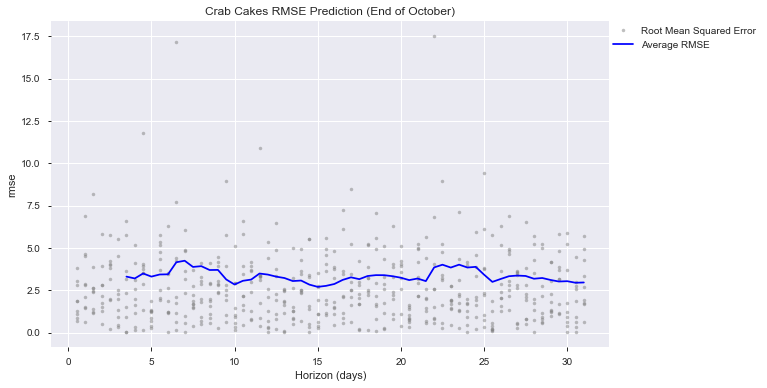

In [211]:
fig = plot_cross_validation_metric(crab_cakes_cv, metric='rmse')
L = plt.legend(bbox_to_anchor=[1.28, 1.01])
plt.title('Crab Cakes RMSE Prediction (End of October)')
L.get_texts()[0].set_text('Root Mean Squared Error')
L.get_texts()[1].set_text('Average RMSE');

### Let's add weather to the mix and see if there are any correlations!

In [212]:
crab_cakes_weather = pd.merge(crab_cakes, entree_weather, how='left')

In [213]:
crab_cakes_weather.fillna(value=0, inplace=True)

In [214]:
len(crab_cakes_weather)

395

In [215]:
crab_cakes_weather.rename(columns={'Qty 10': 'Crab Cakes'}, inplace=True)

In [216]:
crab_cakes_weather.corr()

Crab Cakes      Rain      Snow
Crab Cakes    1.000000 -0.054121 -0.033178
Rain         -0.054121  1.000000  0.249830
Snow         -0.033178  0.249830  1.000000

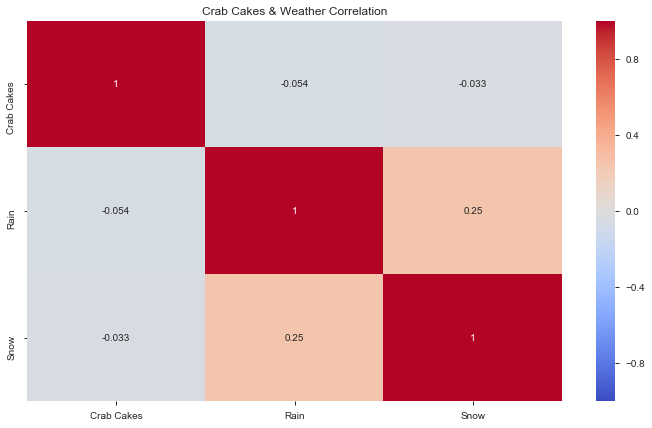

In [217]:
plt.figure(figsize=(12,7))
sns.heatmap(crab_cakes_weather.corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True
           )
plt.title('Crab Cakes & Weather Correlation');

## Entree 11 - Seared Scallops

### First, let's plot the entree

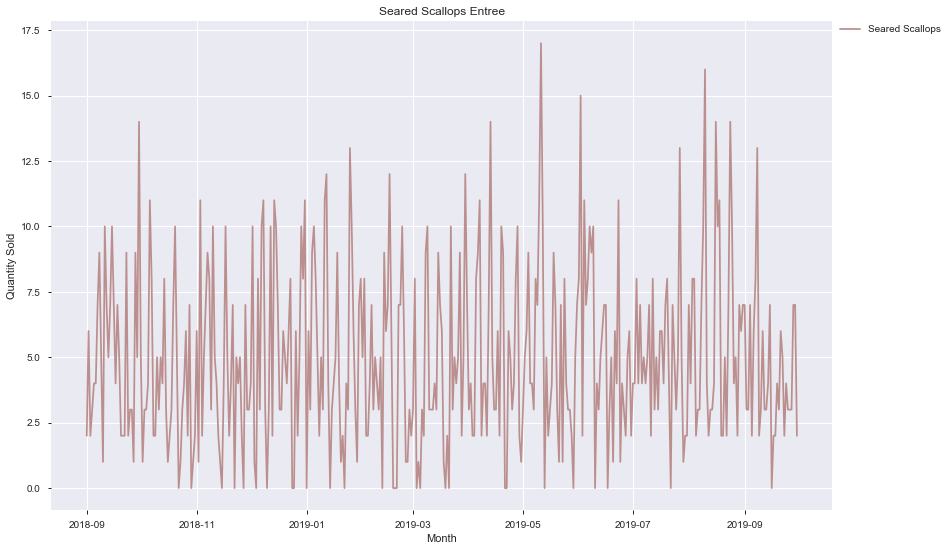

In [218]:
plt.figure(figsize=(14,9))
plt.plot(seared_scallops.Date, seared_scallops['Qty 11'], color='rosybrown')
plt.title('Seared Scallops Entree')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.15, 1.01])
L.get_texts()[0].set_text('Seared Scallops')

### Rename the columns

In [219]:
seared_scallops_forecast = seared_scallops.rename(columns={'Date': 'ds',
                                                           'Qty 11': 'y'})
seared_scallops_forecast.tail()

ds  y
391 2019-09-26  3
392 2019-09-27  3
393 2019-09-28  7
394 2019-09-29  7
395 2019-09-30  2

In [220]:
Model_seared_scallops = proph(interval_width=.75, weekly_seasonality=True, changepoint_prior_scale=1.5)
Model_seared_scallops.add_seasonality(name='monthly', period=30.5, fourier_order=35)
Model_seared_scallops.add_country_holidays(country_name='US')

In [221]:
Model_seared_scallops.fit(seared_scallops_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### Make future dates with a period of 31 so that we can predict to the end of October.

In [222]:
future_dates_seared_scallops = Model_seared_scallops.make_future_dataframe(periods=31, freq='D')

In [223]:
future_dates_seared_scallops.tail()

ds
421 2019-10-27
422 2019-10-28
423 2019-10-29
424 2019-10-30
425 2019-10-31

In [224]:
forecast_seared_scallops = Model_seared_scallops.predict(future_dates_seared_scallops)

In [225]:
forecast_seared_scallops[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
421 2019-10-27  6.381679    3.823207    8.963615
422 2019-10-28  0.372007   -2.405891    3.048947
423 2019-10-29  2.781658    0.055508    5.368919
424 2019-10-30  3.272102    0.829684    5.796038
425 2019-10-31  2.600366    0.026829    5.116737

### Plot the forecast.

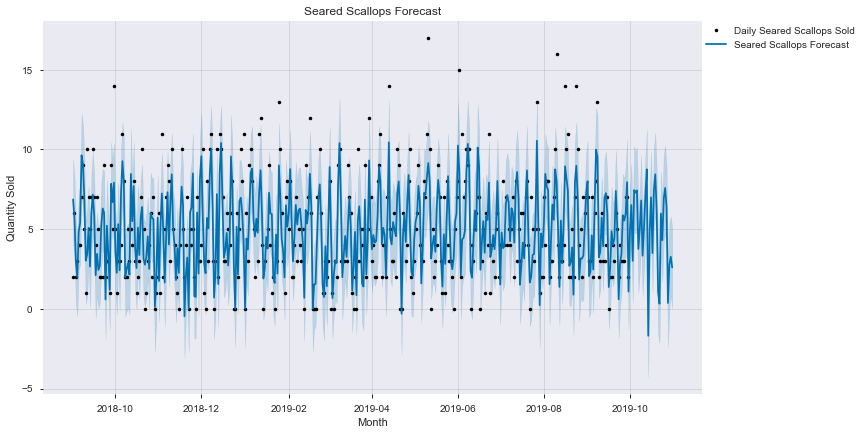

In [256]:
Model_seared_scallops.plot(forecast_seared_scallops, uncertainty=True)
L = plt.legend(bbox_to_anchor=[1.245, 1.01])
plt.title('Seared Scallops Forecast')
L.get_texts()[0].set_text('Daily Seared Scallops Sold')
L.get_texts()[1].set_text('Seared Scallops Forecast')
plt.xlabel('Month')
plt.ylabel('Quantity Sold');

### Plot the Seared Scallops Sold and Seared Scallops Predictions

<Figure size 1440x1080 with 0 Axes>

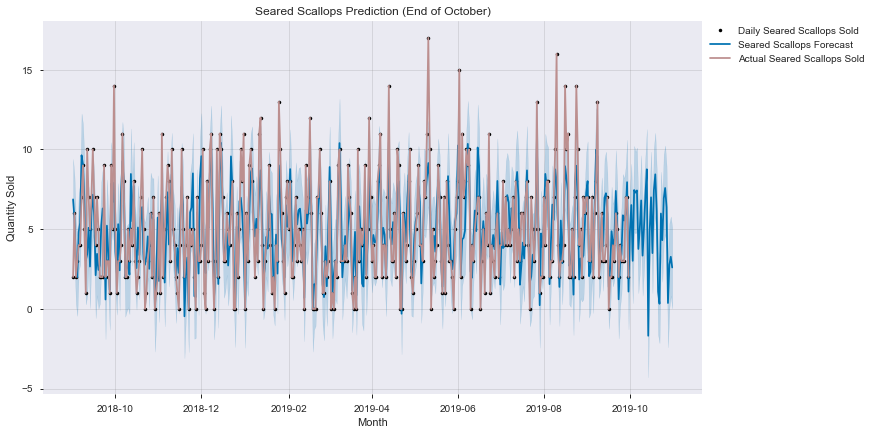

In [227]:
plt.figure(figsize=(20,15))
Model_seared_scallops.plot(forecast_seared_scallops, uncertainty=True)
plt.plot(seared_scallops.Date, seared_scallops['Qty 11'], color='rosybrown')
plt.title('Seared Scallops Prediction (End of October)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
L = plt.legend(bbox_to_anchor=[1.26, 1.01])
L.get_texts()[0].set_text('Daily Seared Scallops Sold')
L.get_texts()[1].set_text('Seared Scallops Forecast')
L.get_texts()[2].set_text('Actual Seared Scallops Sold');

### Plot the trends

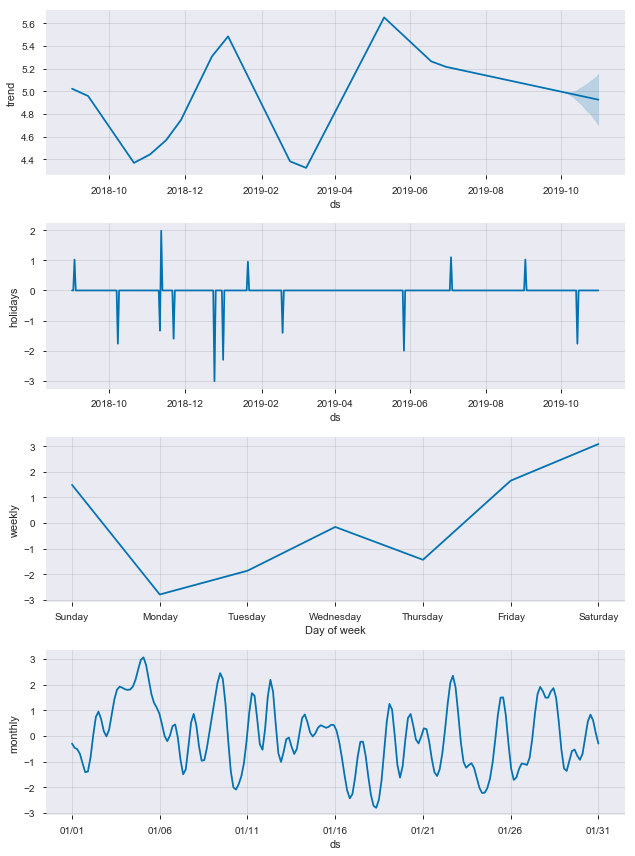

In [228]:
Model_seared_scallops.plot_components(forecast_seared_scallops);

### Let's include performance metrics

In [229]:
seared_scallops_cv = cross_validation(Model_seared_scallops, horizon='31 Days')
seared_scallops_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2018-12-09 12:00:00 and 2019-08-30 00:00:00
/Users/Taylor/anaconda3/envs/learn-env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds       yhat  yhat_lower  yhat_upper   y              cutoff
0   2018-12-10   4.244809    2.643483    5.845292   0 2018-12-09 12:00:00
1   2018-12-11   3.359931    1.665568    5.104316   3 2018-12-09 12:00:00
2   2018-12-12   6.541014    4.861677    8.336595  10 2018-12-09 12:00:00
3   2018-12-13   0.908589   -0.791396    2.522153   2 2018-12-09 12:00:00
4   2018-12-14   4.857379    3.191290    6.557454  11 2018-12-09 12:00:00
5   2018-12-15   8.474420    6.728349   10.133860  10 2018-12-09 12:00:00
6   2018-12-16   3.787438    2.110473    5.572847   7 2018-12-09 12:00:00
7   2018-12-17   1.945873    0.361589    3.479246   3 2018-12-09 12:00:00
8   2018-12-18   4.060982    2.296286    5.761040   3 2018-12-09 12:00:00
9   2018-12-19   9.242052    7.582545   10.910766   6 2018-12-09 12:00:00
10  2018-12-20   7.609602    5.984039    9.417879   5 2018-12-09 12:00:00
11  2018-12-21   2.558421    0.919596    4.290772   4 2018-12-09 12:00:00
12  2018-12-22   6.175477    4.375321    7.886399   6 2018-12-09 12:00:00
13  2018-12-23   4.488548    2.931749    6.349038   8 2018-12-09 12:00:00
14  2018-12-24   3.647040    1.992899    5.375130   0 2018-12-09 12:00:00
15  2018-12-25   5.762189    3.978191    7.520470   0 2018-12-09 12:00:00
16  2018-12-26   8.943273    7.277331   10.635499   6 2018-12-09 12:00:00
17  2018-12-27   0.310849   -1.421194    2.106531   2 2018-12-09 12:00:00
18  2018-12-28   5.259643    3.430950    7.164661   5 2018-12-09 12:00:00
19  2018-12-29   6.876738    5.047719    8.756395  10 2018-12-09 12:00:00
20  2018-12-30   5.189831    3.368702    6.972780   8 2018-12-09 12:00:00
21  2018-12-31   3.348354    1.462122    5.128066  11 2018-12-09 12:00:00
22  2019-01-01   6.036740    4.188657    7.858157   0 2018-12-09 12:00:00
23  2019-01-02   6.486983    4.451701    8.390326   6 2018-12-09 12:00:00
24  2019-01-03   9.992262    8.204964   11.846308   3 2018-12-09 12:00:00
25  2019-01-04   3.357731    1.320943    5.344686   9 2018-12-09 12:00:00
26  2019-01-05  12.348515   10.337434   14.288597  10 2018-12-09 12:00:00
27  2019-01-06  11.013558    8.979365   13.006003   8 2018-12-09 12:00:00
28  2019-01-07  11.057642    8.997858   13.255739   5 2018-12-09 12:00:00
29  2019-01-08  10.151496    7.904653   12.385909   2 2018-12-09 12:00:00
30  2019-01-09   6.601743    4.574823    8.584628   5 2018-12-09 12:00:00
31  2018-12-26   9.201485    7.572217   10.818383   6 2018-12-25 00:00:00
32  2018-12-27   0.456641   -1.319186    2.169356   2 2018-12-25 00:00:00
33  2018-12-28   6.574961    4.795116    8.324730   5 2018-12-25 00:00:00
34  2018-12-29   7.357327    5.562556    9.139867  10 2018-12-25 00:00:00
35  2018-12-30   6.493850    4.854675    8.212330   8 2018-12-25 00:00:00
36  2018-12-31   2.712228    1.028884    4.291817  11 2018-12-25 00:00:00
37  2019-01-01   5.684300    3.873483    7.460009   0 2018-12-25 00:00:00
38  2019-01-02   6.977351    5.220145    8.729091   6 2018-12-25 00:00:00
39  2019-01-03  10.250397    8.539408   11.886424   3 2018-12-25 00:00:00
40  2019-01-04   4.975328    3.343537    6.698090   9 2018-12-25 00:00:00
41  2019-01-05  12.199831   10.510083   14.003450  10 2018-12-25 00:00:00
42  2019-01-06  12.109826   10.383224   13.862418   8 2018-12-25 00:00:00
43  2019-01-07  10.362153    8.605363   12.176484   5 2018-12-25 00:00:00
44  2019-01-08  10.204252    8.532858   12.163966   2 2018-12-25 00:00:00
45  2019-01-09   7.497278    5.776902    9.288195   5 2018-12-25 00:00:00
46  2019-01-10   7.976284    6.205077    9.812548   3 2018-12-25 00:00:00
47  2019-01-11  13.831268   11.997806   15.734809  11 2018-12-25 00:00:00
48  2019-01-12  13.494569   11.644467   15.408434  12 2018-12-25 00:00:00
49  2019-01-13  10.132568    8.283074   11.864447   4 2018-12-25 00:00:00
50  2019-01-14   6.366894    4.429817    8.305245   0 2018-12-25 00:00:00
51  2019-01-15   6.690970    4.824140    8.547788   3 2018-12-25 00:00:00
52  2019-01-16   8.965959    7.124334   10.871362   4 2018-12-25 00:00:00
53  2019-01-17  

In [230]:
seared_scallops_p = performance_metrics(seared_scallops_cv)
seared_scallops_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon        mse      rmse       mae  coverage
0   3 days 12:00:00   8.235651  2.869782  2.472954  0.575758
1   4 days 00:00:00   9.331391  3.054733  2.547381  0.573737
2   4 days 12:00:00   8.272570  2.876208  2.374600  0.608081
3   5 days 00:00:00   7.727578  2.779852  2.238609  0.632323
4   5 days 12:00:00   6.921460  2.630867  2.084999  0.664646
5   6 days 00:00:00   9.455930  3.075050  2.304949  0.646465
6   6 days 12:00:00   9.875985  3.142608  2.341160  0.628283
7   7 days 00:00:00   9.365832  3.060365  2.324823  0.628283
8   7 days 12:00:00   8.595608  2.931827  2.227450  0.666667
9   8 days 00:00:00   9.747583  3.122112  2.453917  0.597980
10  8 days 12:00:00  11.865414  3.444621  2.730223  0.541414
11  9 days 00:00:00   9.816959  3.133203  2.524265  0.571717
12  9 days 12:00:00  10.879562  3.298418  2.666296  0.535354
13 10 days 00:00:00  10.840711  3.292524  2.664568  0.537374
14 10 days 12:00:00  11.879810  3.446710  2.909978  0.416162
15 11 days 00:00:00  12.730733  3.568015  2.876759  0.426263
16 11 days 12:00:00  12.596342  3.549133  2.817716  0.444444
17 12 days 00:00:00  11.777172  3.431788  2.729421  0.466667
18 12 days 12:00:00  10.633201  3.260859  2.610422  0.494949
19 13 days 00:00:00  11.908908  3.450929  2.748379  0.482828
20 13 days 12:00:00  12.428258  3.525373  2.777919  0.511111
21 14 days 00:00:00  13.249242  3.639951  2.913943  0.519192
22 14 days 12:00:00  12.179420  3.489903  2.882519  0.501010
23 15 days 00:00:00  13.390733  3.659335  3.043350  0.432323
24 15 days 12:00:00  15.880384  3.985020  3.243278  0.426263
25 16 days 00:00:00  15.114770  3.887772  3.132296  0.444444
26 16 days 12:00:00  14.533546  3.812289  3.054254  0.442424
27 17 days 00:00:00  14.178785  3.765473  3.120346  0.373737
28 17 days 12:00:00  13.549263  3.680932  3.005471  0.408081
29 18 days 00:00:00  12.316764  3.509525  2.839249  0.460606
30 18 days 12:00:00   9.954203  3.155028  2.625688  0.480808
31 19 days 00:00:00   9.669697  3.109614  2.605515  0.464646
32 19 days 12:00:00   9.455200  3.074931  2.572738  0.496970
33 20 days 00:00:00   7.766435  2.786832  2.191489  0.620202
34 20 days 12:00:00   7.250670  2.692707  2.113125  0.648485
35 21 days 00:00:00   7.041670  2.653614  2.069905  0.666667
36 21 days 12:00:00   9.011113  3.001852  2.237298  0.664646
37 22 days 00:00:00   9.338197  3.055846  2.336936  0.644444
38 22 days 12:00:00   9.372983  3.061533  2.288742  0.664646
39 23 days 00:00:00   9.481905  3.079270  2.366990  0.652525
40 23 days 12:00:00  10.574595  3.251860  2.536838  0.614141
41 24 days 00:00:00  12.039866  3.469851  2.720002  0.577778
42 24 days 12:00:00  10.639314  3.261796  2.579435  0.591919
43 25 days 00:00:00  11.909788  3.451056  2.680296  0.587879
44 25 days 12:00:00  12.185692  3.490801  2.746910  0.575758
45 26 days 00:00:00  14.418648  3.797190  3.054214  0.505051
46 26 days 12:00:00  15.697867  3.962053  3.049191  0.501010
47 27 days 00:00:00  16.263264  4.032774  3.166644  0.464646
48 27 days 12:00:00  15.454386  3.931207  3.085764  0.430303
49 28 days 00:00:00  13.210821  3.634669  2.830437  0.460606
50 28 days 12:00:00  13.558927  3.682245  2.838724  0.446465
51 29 days 00:00:00  12.097262  3.478112  2.660230  0.478788
52 29 days 12:00:00  13.123478  3.622634  2.901022  0.428283
53 30 days 00:00:00  11.414881  3.378592  2.675477  0.478788
54 30 days 12:00:00  12.854316  3.585292  2.884588  0.480808
55 31 days 00:00:00  14.827726  3.850679  3.124706  0.446465

### Plot RMSE for future prediction

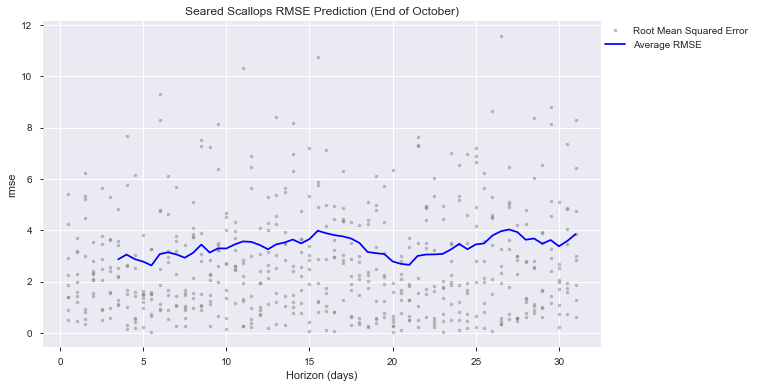

In [231]:
fig = plot_cross_validation_metric(seared_scallops_cv, metric='rmse')
L = plt.legend(bbox_to_anchor=[1.28, 1.01])
plt.title('Seared Scallops RMSE Prediction (End of October)')
L.get_texts()[0].set_text('Root Mean Squared Error')
L.get_texts()[1].set_text('Average RMSE');

### Let's add weather to the mix and see if there are any correlations!

In [232]:
seared_scallops_weather = pd.merge(seared_scallops, entree_weather, how='left')

In [233]:
seared_scallops_weather.fillna(value=0, inplace=True)

In [234]:
len(seared_scallops_weather)

395

In [235]:
seared_scallops_weather.rename(columns={'Qty 11': 'Seared Scallops'}, inplace=True)

In [236]:
seared_scallops_weather.corr()

Seared Scallops      Rain      Snow
Seared Scallops         1.000000  0.058505 -0.057006
Rain                    0.058505  1.000000  0.249830
Snow                   -0.057006  0.249830  1.000000

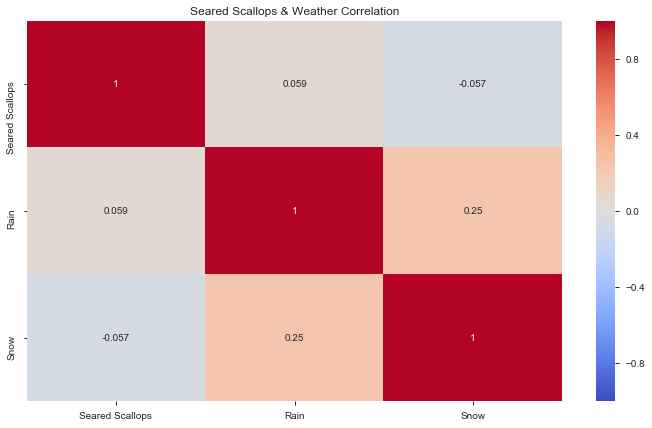

In [237]:
plt.figure(figsize=(12,7))
sns.heatmap(seared_scallops_weather.corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True
           )
plt.title('Seared Scallops & Weather Correlation');